# 目录:


1. 简介
2. 导入库
3. 评级分布
4. 地图绘制
    1. 全球视角
    2. 北美和欧洲地区
    3. 城市视角（拉斯维加斯，菲尼克斯，斯图加特，爱丁堡）
    4. 拉斯维加斯的评级
5. 评论深入分析
    1. 前10位评论用户
    2. 追踪顶级用户
    3. 用户汇总统计
6. 注册数据


## 简介

Yelp是一家提供本地企业的众包评论和在线预订服务的公司。它成立于2004年，由PayPal的前员工创办。Yelp允许用户在其平台上对不同类型的本地企业进行评级和评论，包括餐厅、咖啡馆、酒店、商店等。用户可以在Yelp上查找并了解其他用户对这些企业的评价和评论，从而帮助他们做出更加明智的消费决策。

Yelp评论数据集是从Yelp平台上收集到的一组包含了丰富评论信息的数据，包括评级、评论文本、用户信息、企业信息等。通过对这些数据进行分析，可以深入了解用户对不同类型企业的评价和评论，挖掘出有价值的信息，如用户偏好、企业优劣势等，从而对本地企业和用户提供有针对性的建议和推荐。

本项目旨在对Yelp评论数据集进行分析，探索其中的趋势、模式和关联，以从数据中挖掘有价值的信息，并通过可视化、统计和网络分析等方法呈现分析结果。通过这样的数据分析，我们可以更深入地了解Yelp评论数据集中的用户行为、企业情况和社交网络等方面的情况，为Yelp平台和用户提供更好的服务和建议。

## 导入模块

In [ ]:
%%writefile requirements.txt
basemap
googlemaps
gmaps
gmplot
datasets
nltk
skorch

Writing requirements.txt


In [ ]:
!pip install -r requirements.txt

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 620.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 942.4/942.4 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.7/164.7 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.9/228.9 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# 导入基本包
import numpy as np
import pandas as pd

# 导入杂项包
import gc  # 垃圾回收，用于管理内存
import time  # 时间模块，用于计时
import warnings  # 警告处理模块，用于过滤警告信息

# 导入数据可视化包
import matplotlib.pyplot as plt  # Matplotlib绘图库，用于绘制静态图形
import seaborn as sns  # Seaborn绘图库，用于绘制统计图形
import matplotlib.gridspec as gridspec  # Matplotlib网格布局库，用于创建复杂的图形布局
import plotly.offline as pyo  # Plotly离线绘图库，用于绘制交互式图形
from plotly.graph_objs import *  # Plotly绘图库，用于绘制交互式图形
import plotly.graph_objs as go  # Plotly绘图库，用于绘制交互式图形

# 导入地图相关包
import imageio  # 图像处理库，用于处理地图图像
import folium  # Folium地图库，用于创建交互式地图
import folium.plugins as plugins  # Folium插件库，用于添加地图插件
from mpl_toolkits.basemap import Basemap  # Basemap地图库，用于绘制地图

# 导入图网络相关包
import networkx as nx  # NetworkX图网络库，用于构建和分析图网络
import heapq  # 堆队列模块，用于获取列表、字典中的前n个元素

# 设置
start_time = time.time()  # 获取开始时间，用于计时
color = sns.color_palette()  # 设置颜色调色板
sns.set_style("darkgrid")  # 设置Seaborn的绘图风格
warnings.filterwarnings("ignore")  # 忽略警告信息
pyo.init_notebook_mode()  # 初始化Plotly的notebook模式，用于在Jupyter Notebook中显示交互式图形

Output hidden; open in https://colab.research.google.com to view.

## 数据介绍

### `yelp_tip.csv`

是一个包含了Yelp用户在商家页面上发布的小费（Tip）信息的数据集，通常包含以下字段：

1. `user_id`: 提交小费的用户ID
2. `business_id`: 接收小费的商家ID
3. `text`: 小费的文本内容
4. `date`: 小费提交的日期和时间
5. `compliment_count`: 小费收到的赞数
6. `type`: 数据条目的类型，通常为"tip"表示小费
7. `cool`: 用户对该小费投票的"酷"指数
8. `funny`: 用户对该小费投票的"有趣"指数
9. `useful`: 用户对该小费投票的"有用"指数

这些字段提供了关于Yelp用户在商家页面上发布的小费信息，包括用户ID、商家ID、小费文本内容、提交日期、小费的赞数以及用户投票的指数等。这些数据可以用于探索用户在Yelp上的行为和互动，了解用户对商家的评价和反馈，从而帮助商家和Yelp平台进行改进和优化。

###  `yelp_business.csv`

是一个包含了Yelp商家信息的数据集，包含以下字段：

1. `business_id`: 商家的唯一标识符
2. `name`: 商家的名称
3. `address`: 商家的地址
4. `city`: 商家所在城市
5. `state`: 商家所在州/省份
6. `postal_code`: 商家的邮政编码
7. `latitude`: 商家所在位置的纬度
8. `longitude`: 商家所在位置的经度
9. `stars`: 商家的评级（1到5之间的整数）
10. `review_count`: 商家的评论数量
11. `is_open`: 商家是否营业中（0表示关闭，1表示营业）
12. `categories`: 商家的类别，通常以逗号分隔
13. `attributes`: 商家的其他属性信息，通常以键值对的形式表示
14. `hours`: 商家的营业时间信息，通常以键值对的形式表示

这些字段提供了关于Yelp商家的基本信息，包括商家的名称、地址、位置信息、评级、评论数量、营业状态、类别、属性和营业时间等。这些数据可以用于分析商家在Yelp上的表现、探索商家之间的差异和相似性、进行地理位置分析等，从而帮助用户了解Yelp上的商家生态和消费者行为。

### `yelp_business_hours.csv`

是一个包含了Yelp商家营业时间信息的数据集，包含以下字段：

1. `business_id`: 商家的唯一标识符，与 `yelp_business.csv` 中的 `business_id` 字段相对应
2. `monday`: 商家周一的营业时间
3. `tuesday`: 商家周二的营业时间
4. `wednesday`: 商家周三的营业时间
5. `thursday`: 商家周四的营业时间
6. `friday`: 商家周五的营业时间
7. `saturday`: 商家周六的营业时间
8. `sunday`: 商家周日的营业时间

营业时间通常以小时为单位表示，例如 "9:00-17:00" 表示从上午9点到下午5点的营业时间段。商家未填写营业时间的字段通常为空值。

这些字段提供了关于Yelp商家每天的营业时间信息，可以用于分析商家的营业情况、比较不同商家的营业时间差异、进行时间段内的消费者活动分析等。这些数据可以与 `yelp_business.csv` 数据集中的其他商家信息结合使用，从而更全面地了解商家的运营情况。

### `yelp_checkin.csv`

是一个包含了Yelp用户注册信息的数据集，包含以下字段：

1. `business_id`: 商家的唯一标识符，与 `yelp_business.csv` 中的 `business_id` 字段相对应
2. `date`: 用户注册日期，格式为 "YYYY-MM-DD"
3. `time`: 用户注册时间，格式为 "HH:MM:SS"

该数据集记录了Yelp用户在商家处注册的日期和时间信息。这些数据可以用于分析用户注册活跃度、注册时间分布、不同商家的用户注册情况等，从而帮助商家更好地了解用户行为和优化运营策略。

这些数据可以与 `yelp_business.csv` 数据集中的其他商家信息结合使用，从而更全面地了解商家的用户注册情况，并帮助商家做出更具数据支持的经营决策。

### `yelp_user.csv`

是一个包含了Yelp用户信息的数据集，包含以下字段：

1. `user_id`: 用户的唯一标识符
2. `name`: 用户的昵称或用户名
3. `review_count`: 用户发布的评论数量
4. `yelping_since`: 用户加入Yelp的日期，格式为 "YYYY-MM-DD"
5. `friends`: 用户的好友列表，用逗号分隔的用户ID列表
6. `useful`: 用户被其他用户评为“有用”的次数
7. `funny`: 用户被其他用户评为“搞笑”的次数
8. `cool`: 用户被其他用户评为“酷”的次数
9. `fans`: 关注该用户的粉丝数量
10. `elite`: 用户的精英会员状态，表示用户是否曾经是Yelp的精英会员，并列出了具体的年份
11. `average_stars`: 用户的平均评分
12. `compliment_hot`: 用户收到的“热门”的称赞次数
13. `compliment_more`: 用户收到的“更多”的称赞次数
14. `compliment_profile`: 用户收到的“个人资料”的称赞次数
15. `compliment_cute`: 用户收到的“可爱”的称赞次数
16. `compliment_list`: 用户收到的“列表”的称赞次数
17. `compliment_note`: 用户收到的“留言”的称赞次数
18. `compliment_plain`: 用户收到的“普通”的称赞次数
19. `compliment_cool`: 用户收到的“酷”的称赞次数
20. `compliment_funny`: 用户收到的“搞笑”的称赞次数
21. `compliment_writer`: 用户收到的“写作”的称赞次数
22. `compliment_photos`: 用户收到的“照片”的称赞次数


In [ ]:
from google.colab import drive

# 连接到Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 导入必要的包
import pandas as pd  # 导入pandas用于数据处理


dataset_path = '/content/drive/My Drive/offerrealize/offerrealize-DS项目课/项目/yelp/data/'
# 导入yelp_business.csv数据集
business = pd.read_csv(dataset_path+"yelp_business.csv")  # 使用pd.read_csv()函数从CSV文件中读取数据
#business_attributes=pd.read_csv("../data/yelp_business_attributes.csv")  # 可以添加其他的数据集导入语句，例如yelp_business_attributes.csv

# 导入yelp_business_hours.csv数据集
business_hours = pd.read_csv(dataset_path+"yelp_business_hours.csv")

# 导入yelp_checkin.csv数据集
check_in = pd.read_csv(dataset_path+"yelp_checkin.csv")

# 导入yelp_review.csv数据集
reviews = pd.read_csv(dataset_path+"yelp_review.csv")

# 导入yelp_tip.csv数据集
tip = pd.read_csv(dataset_path+"yelp_tip.csv")

# 导入yelp_user.csv数据集
user = pd.read_csv(dataset_path+"yelp_user.csv")

# 计算导入数据集所花费的时间
end_time = time.time()  # 获取当前时间
print("Took", end_time - start_time, "s")  # 输出导入数据集所花费的时间

Took 193.04700541496277 s


In [ ]:
business

business_id                           name neighborhood  \
0       FYWN1wneV18bWNgQjJ2GNg             "Dental by Design"          NaN   
1       He-G7vWjzVUysIKrfNbPUQ          "Stephen Szabo Salon"          NaN   
2       KQPW8lFf1y5BT2MxiSZ3QA        "Western Motor Vehicle"          NaN   
3       8DShNS-LuFqpEWIp0HxijA             "Sports Authority"          NaN   
4       PfOCPjBrlQAnz__NXj9h_w     "Brick House Tavern + Tap"          NaN   
...                        ...                            ...          ...   
174562  ALV5R8NkZ1KGOZeuZl3u0A                "Whitby Toyota"          NaN   
174563  gRGalHVu6BcaUDIAGVW_xQ            "Village Auto Body"          NaN   
174564  XXvZBIHoJBU5d6-a-oyMWQ                          "AAM"          NaN   
174565  lNpPGgM96nPIYM1shxciHg  "Bronze Beauty Spray Tanning"          NaN   
174566  viKaP26BcHU6cLx8sf4gKg             "Phoenix Pharmacy"          NaN   

                                 address            city state postal_code  \
0             "4855 E Warner Rd, Ste B9"       Ahwatukee    AZ       85044   
1                   "3101 Washington Rd"        McMurray    PA       15317   
2               "6025 N 27th Ave, Ste 1"         Phoenix    AZ       85017   
3       "5000 Arizona Mills Cr, Ste 435"           Tempe    AZ       85282   
4                         "581 Howe Ave"  Cuyahoga Falls    OH       44221   
...                                  ...             ...   ...         ...   
174562            "1025 Dundas Street W"          Whitby    ON     L1P 1Z1   
174563             "3957 Brecksville Rd"       Richfield    OH       44286   
174564     "1600 W Broadway Rd, Ste 200"           Tempe    AZ       85282   
174565      "300 Camp Horne Rd, Ste 250"      Pittsburgh    PA       15202   
174566    "1701 East Thomas Rd, Ste 105"         Phoenix    AZ       85016   

         latitude   longitude  stars  review_count  is_open  \
0       33.330690 -111.978599    4.0            22        1   
1       40.291685  -80.104900    3.0            11        1   
2       33.524903 -112.115310    1.5            18        1   
3       33.383147 -111.964725    3.0             9        0   
4       41.119535  -81.475690    3.5           116        1   
...           ...         ...    ...           ...      ...   
174562  43.873460  -78.968033    4.0             4        1   
174563  41.243385  -81.636212    5.0             3        1   
174564  33.407914 -111.965098    1.5            19        1   
174565  40.517724  -80.091466    5.0            14        1   
174566  33.479861 -112.044689    5.0             4        1   

                                               categories  
0       Dentists;General Dentistry;Health & Medical;Or...  
1       Hair Stylists;Hair Salons;Men's Hair Salons;Bl...  
2       Departments of Motor Vehicles;Public Services ...  
3                                 Sporting Goods;Shopping  
4       American (New);Nightlife;Bars;Sandwiches;Ameri...  
...                                                   ...  
174562                             Car Dealers;Automotive  
174563                              Body Shops;Automotive  
174564      Home Services;Property Management;Real Estate  
174565                Spray Tanning;Tanning;Beauty & Spas  
174566               Drugstores;Shopping;Health & Medical  

[174567 rows x 13 columns]

## 评分分布探索

以下代码通过使用seaborn库的barplot()函数绘制了一个条形图，展示了不同星级评分的商家数量分布情况

In [ ]:
business['stars'].value_counts(normalize=True).sort_index()

stars
1.0    0.021699
1.5    0.024650
2.0    0.053389
2.5    0.092503
3.0    0.132568
3.5    0.183528
4.0    0.191858
4.5    0.142043
5.0    0.157762
Name: proportion, dtype: float64

In [ ]:
# 获取星级评分的分布
data = business['stars'].value_counts()  # 使用value_counts()函数获取星级评分的计数
data = data.sort_index()  # 对计数结果按照索引（星级评分）排序

# 绘制条形图
plt.figure(figsize=(12,5))  # 设置图像大小
ax = sns.barplot(x=data.index, y=data.values, alpha=0.4)  # 使用seaborn库的barplot函数绘制条形图
plt.title("Star Rating Distribution")  # 设置图标题
plt.ylabel('# of businesses', fontsize=12)  # 设置y轴标签
plt.xlabel('Star Ratings ', fontsize=12)  # 设置x轴标签

# 添加标签文本
rects = ax.patches  # 获取条形图的矩形对象
labels = data.values  # 获取计数值
for rect, label in zip(rects, labels):  # 遍历矩形对象和计数值
    height = rect.get_height()  # 获取矩形的高度
    ax.text(rect.get_x() + rect.get_width()/2, height*1.02, label, ha='center', va='bottom')  # 在矩形上方添加文本标签

plt.show()  # 显示图像

以下代码通过使用seaborn库的barplot()函数绘制了一个条形图，展示了 Yelp 上热门的业务类别及其数量分布情况。

In [ ]:
business['categories']

0         Dentists;General Dentistry;Health & Medical;Or...
1         Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2         Departments of Motor Vehicles;Public Services ...
3                                   Sporting Goods;Shopping
4         American (New);Nightlife;Bars;Sandwiches;Ameri...
                                ...                        
174562                               Car Dealers;Automotive
174563                                Body Shops;Automotive
174564        Home Services;Property Management;Real Estate
174565                  Spray Tanning;Tanning;Beauty & Spas
174566                 Drugstores;Shopping;Health & Medical
Name: categories, Length: 174567, dtype: object

In [ ]:
test = 'Dentists;General Dentistry;Health'
test.split(';')

['Dentists', 'General Dentistry', 'Health']

In [ ]:
business['categories'].str.split(';').explode().reset_index(drop=True).value_counts()[:10]

categories
Restaurants         54618
Shopping            27971
Food                24777
Beauty & Spas       17014
Home Services       16205
Health & Medical    14230
Nightlife           12154
Local Services      11232
Automotive          11052
Bars                10563
Name: count, dtype: int64

In [ ]:
business['categories'].str.split(';').explode().reset_index(drop=True).value_counts()[:10]

categories
Restaurants         54618
Shopping            27971
Food                24777
Beauty & Spas       17014
Home Services       16205
Health & Medical    14230
Nightlife           12154
Local Services      11232
Automotive          11052
Bars                10563
Name: count, dtype: int64

In [ ]:
# 获取所有商家的业务类别
business_cats = ' '.join(business['categories'])  # 将所有商家的业务类别连接成一个字符串

# 将业务类别拆分为单独的类别，并存储在DataFrame中
cats = pd.DataFrame(business_cats.split(';'), columns=['category'])  # 使用分号将业务类别拆分为单独的类别，并创建DataFrame
x = cats.category.value_counts()  # 使用value_counts()函数获取每个类别的计数
print("Yelp上共有", len(x), "种不同的业务类型/类别!")  # 输出不同业务类别的数量

# 准备绘制条形图的数据
x = x.sort_values(ascending=False)  # 按照计数值降序排序
x = x.iloc[0:20]  # 只取前20个类别用于绘制图表

# 绘制条形图
plt.figure(figsize=(16,4))  # 设置图像大小
ax = sns.barplot(x = x.index, y = x.values, alpha=0.8)  # 使用seaborn库的barplot函数绘制条形图
plt.title("What are the top categories?", fontsize=25)  # 设置图标题
locs, labels = plt.xticks()  # 获取x轴刻度位置和标签
plt.setp(labels, rotation=80)  # 设置x轴标签旋转角度
plt.ylabel('# businesses', fontsize=12)  # 设置y轴标签
plt.xlabel('Category', fontsize=12)  # 设置x轴标签

# 添加标签文本
rects = ax.patches  # 获取条形图的矩形对象
labels = x.values  # 获取计数值
for rect, label in zip(rects, labels):  # 遍历矩形对象和计数值
    height = rect.get_height()  # 获取矩形的高度
    ax.text(rect.get_x() + rect.get_width()/2, height*1.02, label, ha='center', va='bottom')  # 在矩形上方添加文本标签

plt.show()  # 显示图像


Yelp上共有 59106 种不同的业务类型/类别!


In [ ]:
# rating会和什么有关系呢？

In [ ]:
reviews

review_id                 user_id  \
0        vkVSCC7xljjrAI4UGfnKEQ  bv2nCi5Qv5vroFiqKGopiw   
1        n6QzIUObkYshz4dz2QRJTw  bv2nCi5Qv5vroFiqKGopiw   
2        MV3CcKScW05u5LVfF6ok0g  bv2nCi5Qv5vroFiqKGopiw   
3        IXvOzsEMYtiJI0CARmj77Q  bv2nCi5Qv5vroFiqKGopiw   
4        L_9BTb55X0GDtThi6GlZ6w  bv2nCi5Qv5vroFiqKGopiw   
...                         ...                     ...   
5261663  PoGSiNz1X5SUu0qEt-qM5w  mPjPyipaD0C_myqWqDipZg   
5261664  -CJNPrDWgIkorx4iEZJXIg  mPjPyipaD0C_myqWqDipZg   
5261665  W9eVvOcpBvG6lpJPoJOxuA  mPjPyipaD0C_myqWqDipZg   
5261666  hqQ1UTFKMN2P1ezUow48OQ  mPjPyipaD0C_myqWqDipZg   
5261667  ldsIs3sGXPJ7WM7VyAm4lQ  mPjPyipaD0C_myqWqDipZg   

                    business_id  stars        date  \
0        AEx2SYEUJmTxVVB18LlCwA      5  2016-05-28   
1        VR6GpWIda3SfvPC-lg9H3w      5  2016-05-28   
2        CKC0-MOWMqoeWf6s-szl8g      5  2016-05-28   
3        ACFtxLv8pGrrxMm6EgjreA      4  2016-05-28   
4        s2I_Ni76bjJNK9yG60iD-Q      4  2016-05-28   
...                         ...    ...         ...   
5261663  Ngk84Ax1tXgpoJFEGxot3w      1  2011-11-21   
5261664  pOEL97ld-FJMKO8Ki8JmYg      3  2016-04-30   
5261665  5ubokMNw8qfbX2WtxgJG1Q      4  2011-10-23   
5261666  EO3i5kTUG7_S2OIQ23sdSA      3  2011-11-07   
5261667  HloEEXm_QzEpycuwA_RtQA      3  2011-11-15   

                                                      text  useful  funny  \
0        Super simple place but amazing nonetheless. It...       0      0   
1        Small unassuming place that changes their menu...       0      0   
2        Lester's is located in a beautiful neighborhoo...       0      0   
3        Love coming here. Yes the place always needs t...       0      0   
4        Had their chocolate almond croissant and it wa...       0      0   
...                                                    ...     ...    ...   
5261663  Bought groupon $39 for 4 months from groupon, ...      36      3   
5261664  Spring rolls was pretty good, cod was a bit ra...       0      0   
5261665  Had a 8 dish set meal, was enough for 10 peopl...       3      0   
5261666  A small, cozy family run Authentic korean rest...       2      0   
5261667  Really nice atmosphere and settings and very c...       0      1   

         cool  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
5261663     3  
5261664     0  
5261665     1  
5261666     0  
5261667     1  

[5261668 rows x 9 columns]

In [ ]:
reviews['length'] = reviews['text'].apply(len)

In [ ]:
graph = sns.FacetGrid(data=reviews,col='stars')
graph.map(plt.hist,'length',bins=30)

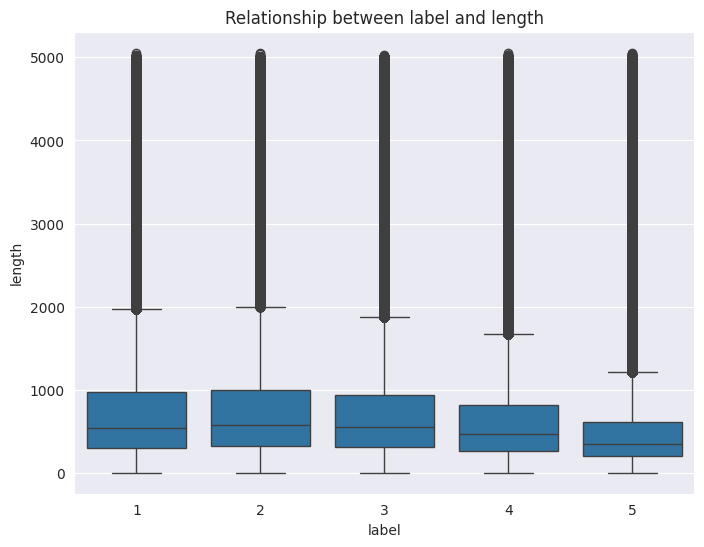

In [ ]:
# 箱线图展示不同label对应的length分布
plt.figure(figsize=(8, 6))
sns.boxplot(x='stars', y='length', data=reviews)
plt.title('Relationship between label and length')
plt.xlabel('label')
plt.ylabel('length')
plt.show()

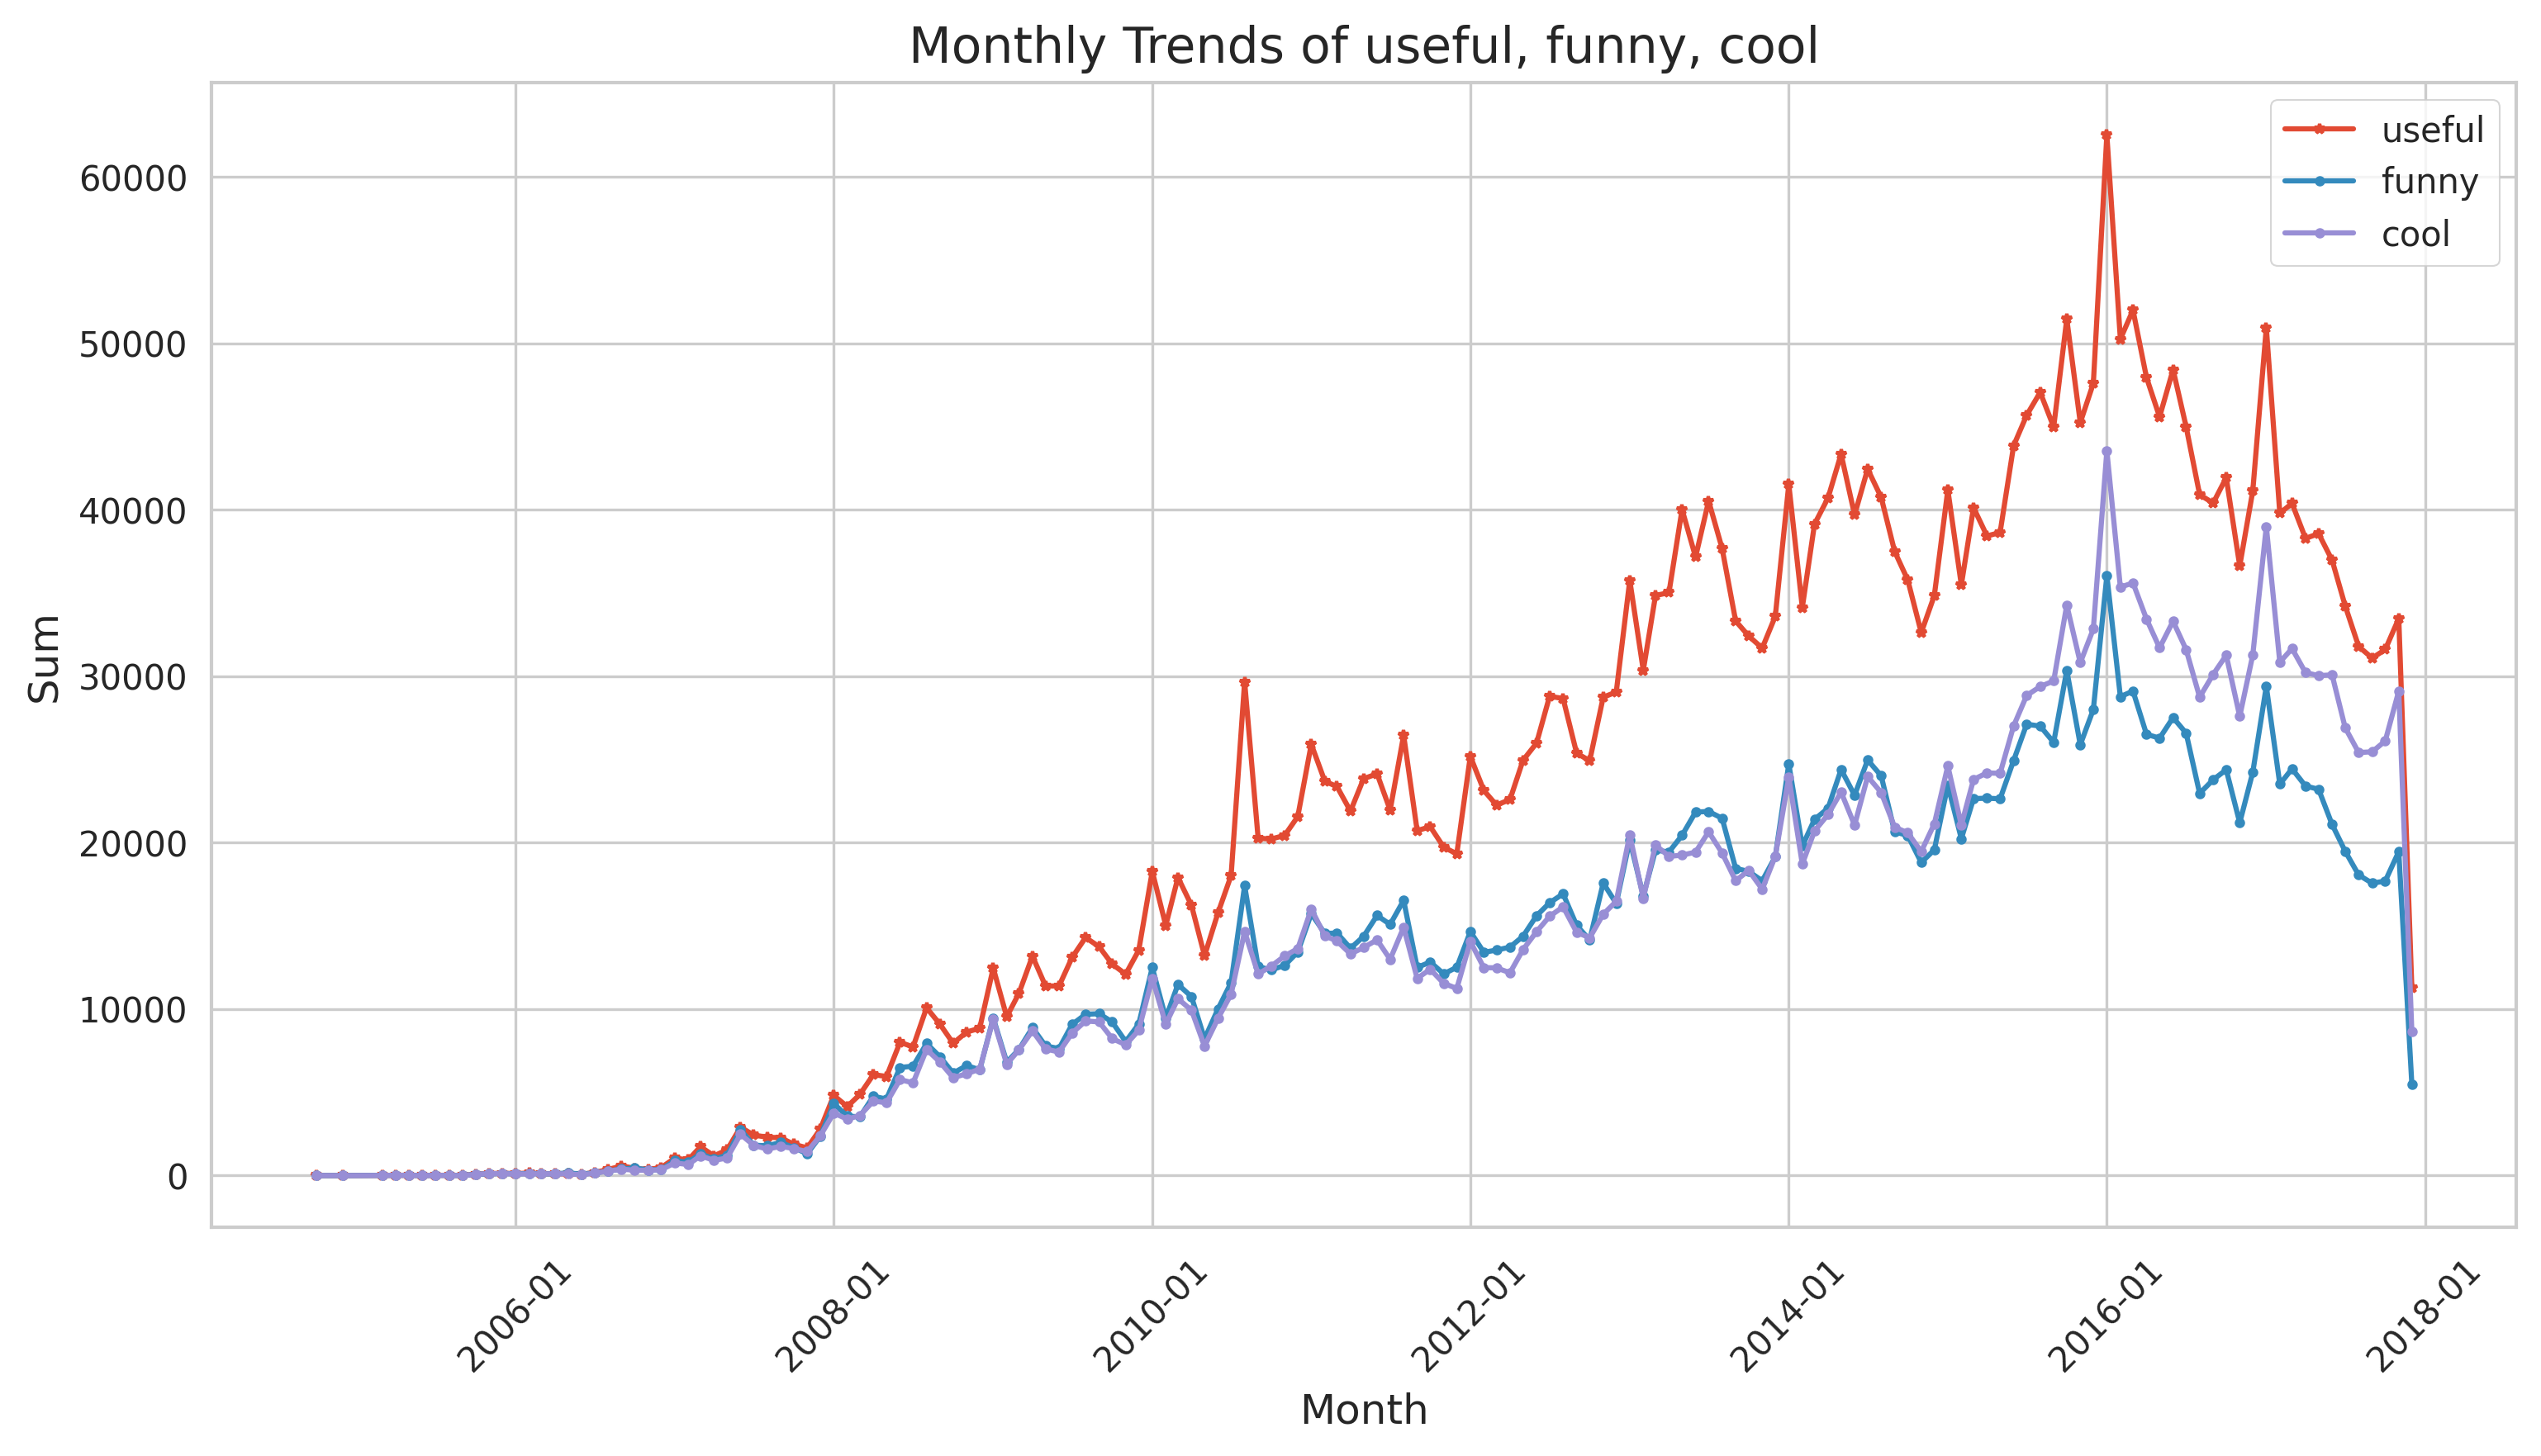

In [ ]:
# 各种类型的评论量趋势如何？

from matplotlib.dates import DateFormatter

reviews['datetime'] = pd.to_datetime(reviews['date'])
# 按月份进行分组，并计算 useful, funny, cool 的总和
monthly_summary = reviews.groupby(reviews['datetime'].dt.to_period('M')).agg({
    'useful':'sum',
    'funny':'sum',
    'cool':'sum'
}).reset_index()

# 将 period 类型转换回 datetime 类型，方便绘图
monthly_summary['datetime'] = monthly_summary['datetime'].dt.to_timestamp()

# 绘制折线图
plt.figure(figsize=(12, 6))
plt.plot(monthly_summary['datetime'], monthly_summary['useful'], label='useful', marker='*', markersize = 3)
plt.plot(monthly_summary['datetime'], monthly_summary['funny'], label='funny', marker='o', markersize = 2)
plt.plot(monthly_summary['datetime'], monthly_summary['cool'], label='cool', marker='o', markersize = 2)

# 设置 x 轴日期格式
date_form = DateFormatter("%Y-%m")
plt.gca().xaxis.set_major_formatter(date_form)
plt.xticks(rotation=45)

# 添加标题和标签
plt.title('Monthly Trends of useful, funny, cool')
plt.xlabel('Month')
plt.ylabel('Sum')
plt.legend()

# 显示图形
plt.show()

## 地图绘制

### 评论来源地点分析

在地图部分，我们分析各个`商家`的`地理位置`。

1. 首先，我们查看Yelp商家的`全球视图`
2. 然后，我们放大到两个`最集中的地区`（北美地区、欧洲地区）
3. 探索`评论最多的城市`
4. 可视化排名`前两位`的城市

### 全球视图


注释：在这段代码中，我们使用了Matplotlib和Basemap库来创建一个基础的世界地图。首先，我们导入了需要的库。然后，我们创建了一个指定大小的图像窗口。接着，我们使用正投影（ortho projection）来生成地球型版本的地图。我们通过指定的颜色代码来填充大陆和海洋的颜色。然后，我们绘制了国家的边界线，并使用散点图的方式在地图上标示出商家的经纬度位置。最后，我们为地图添加了一个标题并显示出来。

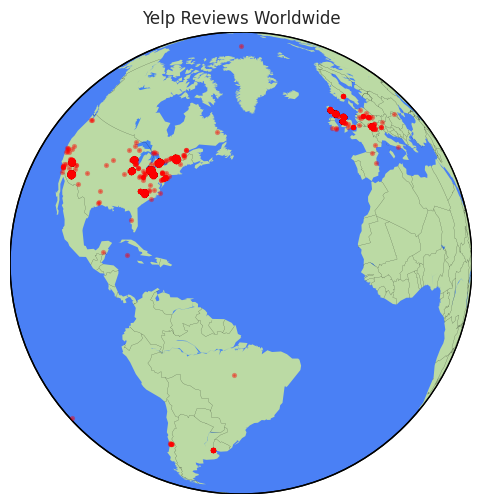

In [ ]:
# 导入必要的库
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# 创建一个指定大小的图像窗口
plt.figure(1, figsize=(15,6))

# 使用正投影（ortho projection）生成地球型版本的地图
m1 = Basemap(projection='ortho', lat_0=20, lon_0=-50)

# 使用指定的颜色代码填充大陆和海洋的颜色
m1.fillcontinents(color='#bbdaa4', lake_color='#4384f3')

# 添加指定颜色的海洋边界
m1.drawmapboundary(fill_color='#4a80f5')

# 绘制国家边界线，并设置线宽和颜色
m1.drawcountries(linewidth=0.1, color="black")

# 使用散点图在地图上标示商家的经纬度位置
mxy = m1(business["longitude"].tolist(), business["latitude"].tolist())
m1.scatter(mxy[0], mxy[1], s=3, c="red", lw=2, alpha=0.4, zorder=5)

# 为地图添加标题
plt.title("Yelp Reviews Worldwide")

# 显示地图
plt.show()

### 北美洲和欧洲地区

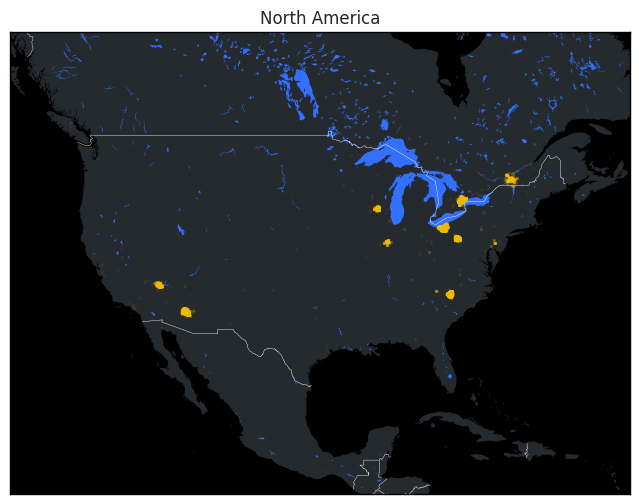

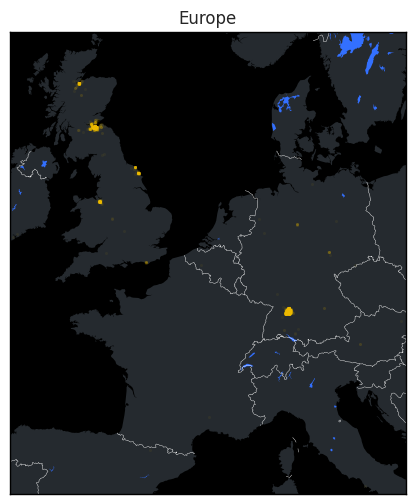

In [ ]:
# 将数据筛选为北美地区
lon_min, lon_max = -132.714844, -59.589844
lat_min, lat_max = 13.976715, 56.395664

# 创建选择器
idx_NA = (business["longitude"] > lon_min) & \
         (business["longitude"] < lon_max) & \
         (business["latitude"] > lat_min) & \
         (business["latitude"] < lat_max)
# 应用选择器进行子集筛选
NA_business = business[idx_NA]

# 初始化绘图
plt.figure(figsize=(12, 6))
m2 = Basemap(projection='merc',
             llcrnrlat=lat_min,
             urcrnrlat=lat_max,
             llcrnrlon=lon_min,
             urcrnrlon=lon_max,
             lat_ts=35,
             resolution='i')

m2.fillcontinents(color='#252a2f', lake_color='#3370ff')  # 深灰色陆地，蓝色湖泊
m2.drawmapboundary(fill_color='#000000')  # 黑色背景
m2.drawcountries(linewidth=0.3, color="w")  # 白色线条标示国界

# 绘制数据
mxy = m2(NA_business["longitude"].tolist(), NA_business["latitude"].tolist())
m2.scatter(mxy[0], mxy[1], s=5, c="#ffcc00", lw=0, alpha=0.05, zorder=5)

plt.title("North America")

# 将数据筛选为欧洲地区
lon_min, lon_max = -8.613281, 16.699219
lat_min, lat_max = 40.488737, 59.204064

# 创建选择器
idx_euro = (business["longitude"] > lon_min) & \
           (business["longitude"] < lon_max) & \
           (business["latitude"] > lat_min) & \
           (business["latitude"] < lat_max)
# 应用选择器进行子集筛选
euro_business = business[idx_euro]

# 初始化绘图
plt.figure(figsize=(12, 6))
m3 = Basemap(projection='merc',
             llcrnrlat=lat_min,
             urcrnrlat=lat_max,
             llcrnrlon=lon_min,
             urcrnrlon=lon_max,
             lat_ts=35,
             resolution='i')

m3.fillcontinents(color='#252a2f', lake_color='#3370ff')  # 深灰色陆地，蓝色湖泊
m3.drawmapboundary(fill_color='#000000')  # 黑色背景
m3.drawcountries(linewidth=0.3, color="w")  # 白色线条标示国界

# 绘制数据
mxy = m3(euro_business["longitude"].tolist(), euro_business["latitude"].tolist())
m3.scatter(mxy[0], mxy[1], s=5, c="#ffcc00", lw=0, alpha=0.05, zorder=5)

plt.title("Europe")
plt.show()


### 城市视角（拉斯维加斯，菲尼克斯，斯图加特，爱丁堡）

然后，我们通过绘制 4 个城市（Las Vegas、Pheonix、Stuttgart、Edinburgh）的经纬度图来了解它们的外观。

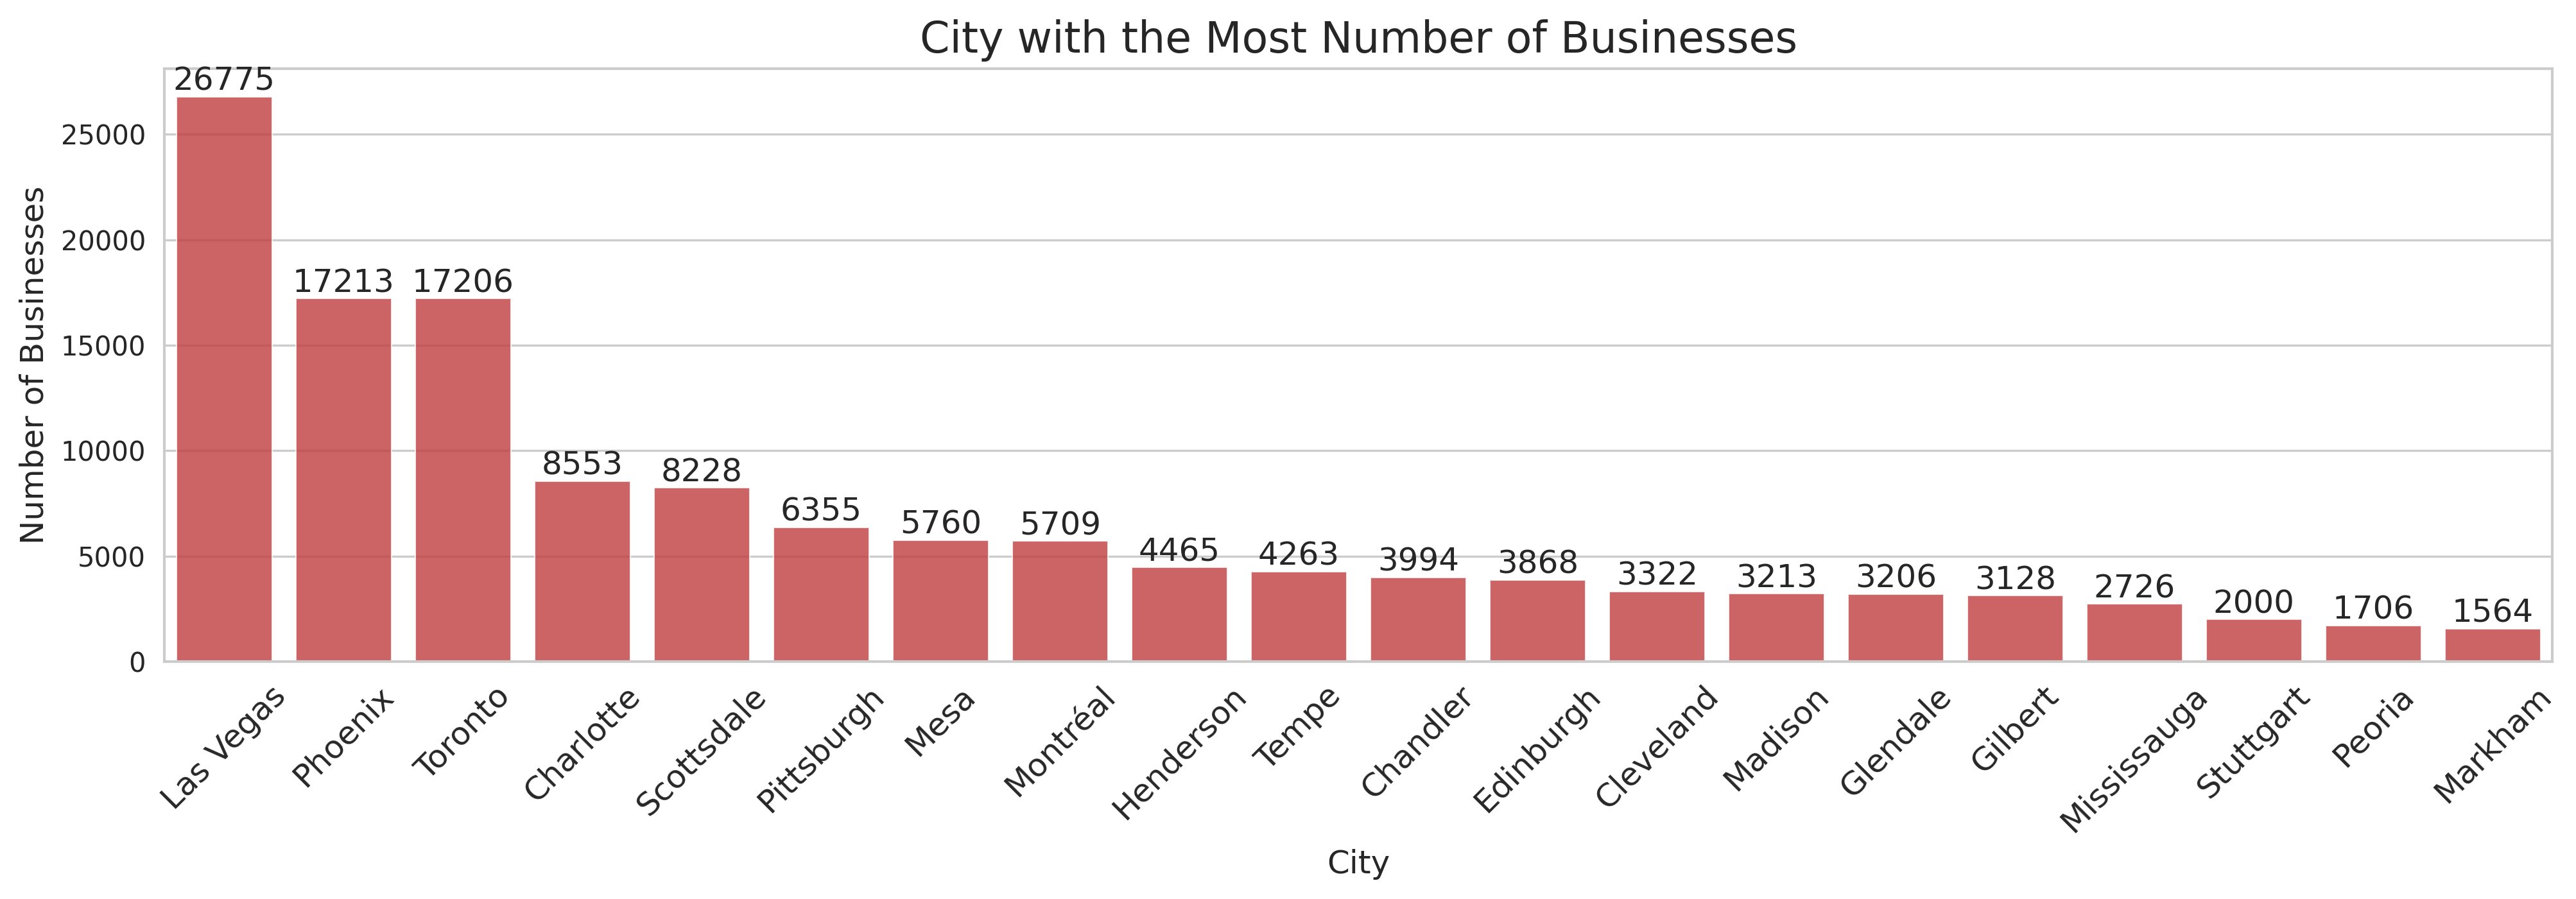

In [ ]:
# 获取城市的评级数量
x = business['city'].value_counts()
x = x.sort_values(ascending=False)
x = x.iloc[0:20]

# 绘制柱状图
plt.figure(figsize=(16,4))
ax = sns.barplot(x = x.index, y = x.values, alpha=0.8, color=color[3]) # 设置颜色为color[3]
plt.title("City with the Most Number of Businesses", fontsize=16) # 设置标题和字体大小
plt.xticks(rotation=45, fontsize=12) # 设置X轴标签的旋转角度和字体大小
plt.ylabel('Number of Businesses', fontsize=12) # 设置Y轴标签和字体大小
plt.xlabel('City', fontsize=12) # 设置X轴标签和字体大小

rects = ax.patches # 获取柱状图的每个矩形对象
labels = x.values # 获取柱状图上方的数字标签

# 在每个柱状图上方添加数字标签
for rect, label in zip(rects, labels):
    height = rect.get_height() # 获取柱状图的高度
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=12) # 添加数字标签，设置位置、对齐方式和字体大小

plt.show() # 显示柱状图

In [ ]:
# 获取所有的评分数据
rating_data = business[['latitude', 'longitude', 'stars', 'review_count']]
# 创建一个自定义列 'popularity'，计算方法为评分乘以评论数量
rating_data['popularity'] = rating_data['stars'] * rating_data['review_count']

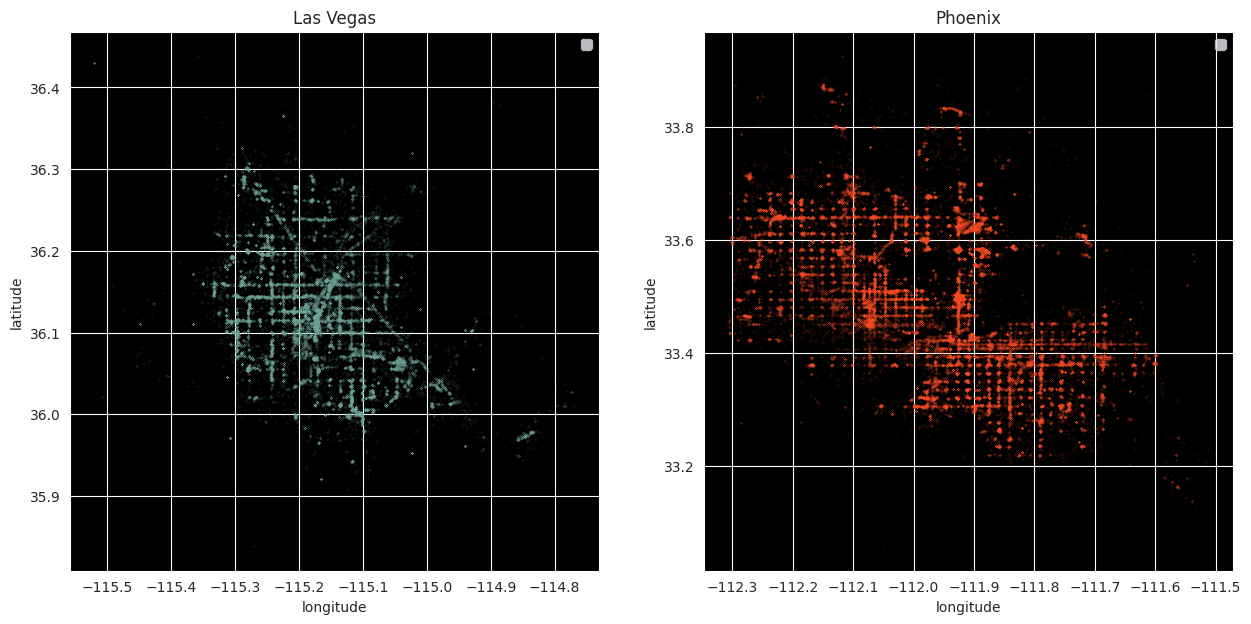

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))  # 创建一个包含两个子图的画布，设置画布大小为15x7

# 拉斯维加斯的随机点坐标
lat = 36.207430
lon = -115.268460
# 进行坐标调整，获取合适的图像
lon_min, lon_max = lon - 0.3, lon + 0.5
lat_min, lat_max = lat - 0.4, lat + 0.5
# 根据经纬度范围筛选出拉斯维加斯的数据
ratings_data_vegas = rating_data[(rating_data["longitude"] > lon_min) &
                                (rating_data["longitude"] < lon_max) &
                                (rating_data["latitude"] > lat_min) &
                                (rating_data["latitude"] < lat_max)]

# 绘制拉斯维加斯的散点图
ratings_data_vegas.plot(kind='scatter', x='longitude', y='latitude',
                       color='#74a89b',
                       s=.02, alpha=.6, subplots=True, ax=ax1)
ax1.set_title("Las Vegas")  # 设置子图1的标题
ax1.set_facecolor('black')  # 设置子图1的背景颜色为黑色

# 凤凰城的随机点坐标
lat = 33.435463
lon = -112.006989
# 进行坐标调整，获取合适的图像
lon_min, lon_max = lon - 0.3, lon + 0.5
lat_min, lat_max = lat - 0.4, lat + 0.5
# 根据经纬度范围筛选出凤凰城的数据
ratings_data_phoenix = rating_data[(rating_data["longitude"] > lon_min) &
                                  (rating_data["longitude"] < lon_max) &
                                  (rating_data["latitude"] > lat_min) &
                                  (rating_data["latitude"] < lat_max)]
# 绘制凤凰城的散点图
ratings_data_phoenix.plot(kind='scatter', x='longitude', y='latitude',
                         color='#fb4e29',
                         s=.02, alpha=.6, subplots=True, ax=ax2)
ax2.set_title("Phoenix")  # 设置子图2的标题
ax2.set_facecolor('black')  # 设置子图2的背景颜色为黑色

f.show()  # 显示画布

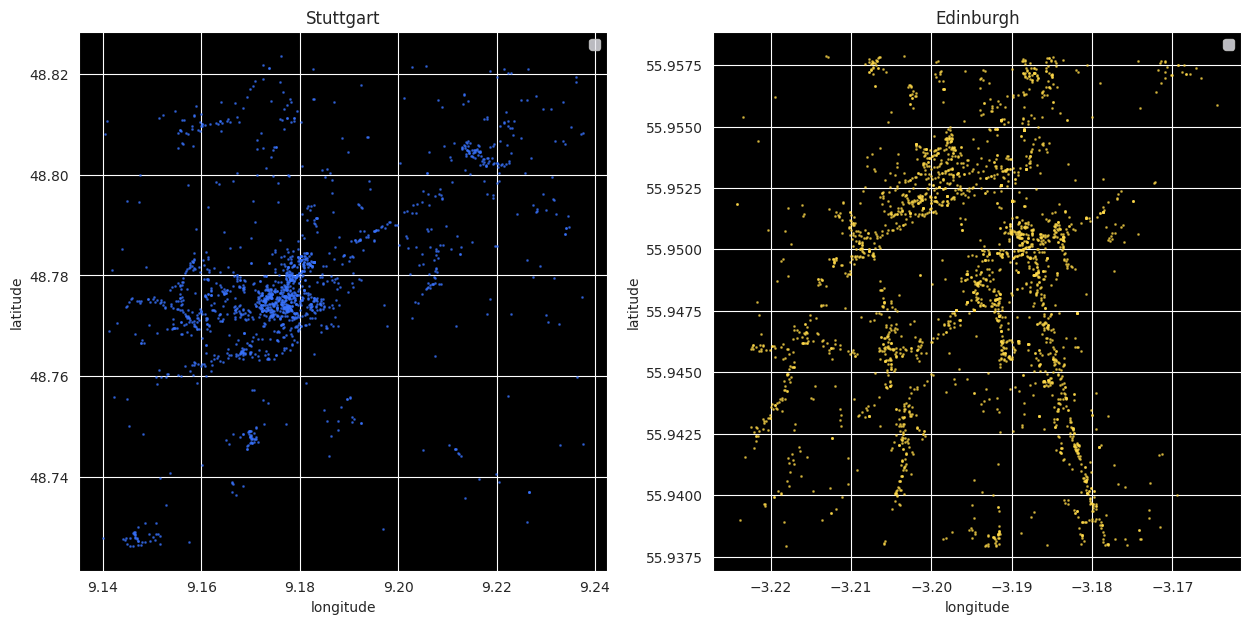

In [ ]:
# 导入必要的绘图库
import matplotlib.pyplot as plt

# 创建包含两个子图的图形窗口，大小为15x7
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))

# 在斯图加特市内随机选择一个点
lat = 48.7757200
lon = 9.187950
# 对经纬度进行微调，以获取合适的图片
lon_min, lon_max = lon-0.05,lon+0.05
lat_min, lat_max = lat-0.05,lat+0.05
# 在斯图加特市内筛选数据
ratings_data_stuttgart=rating_data[(rating_data["longitude"]>lon_min) &\
                    (rating_data["longitude"]<lon_max) &\
                    (rating_data["latitude"]>lat_min) &\
                    (rating_data["latitude"]<lat_max)]

# 绘制斯图加特市的散点图
ratings_data_stuttgart.plot(kind='scatter', x='longitude', y='latitude',
                color='#3973fe',
                s=1, alpha=.6, subplots=True, ax=ax1)
ax1.set_title("Stuttgart") # 设置子图标题
ax1.set_facecolor('black') # 设置子图背景色为黑色

# 在爱丁堡市内随机选择一个点
lat = 55.947871
lon = -3.194255
# 对经纬度进行微调，以获取合适的图片
lon_min, lon_max = lon-0.03,lon+0.03
lat_min, lat_max = lat-0.01,lat+0.01
# 在爱丁堡市内筛选数据
ratings_data_edinburgh=rating_data[(rating_data["longitude"]>lon_min) &\
                    (rating_data["longitude"]<lon_max) &\
                    (rating_data["latitude"]>lat_min) &\
                    (rating_data["latitude"]<lat_max)]

# 绘制爱丁堡市的散点图
ratings_data_edinburgh.plot(kind='scatter', x='longitude', y='latitude',
                color='#ffd949',
                s=1, alpha=.6, subplots=True, ax=ax2)
ax2.set_title("Edinburgh") # 设置子图标题
ax2.set_facecolor('black') # 设置子图背景色为黑色

# 显示图形窗口
f.show()

有趣的观察是，美国城市通常有着规整的街区或网格结构，而其他城市则可能呈现出更为流动和不规则的设计。通过将企业的位置信息在地图上可视化，我们可以更深入地了解不同城市区域的经济活动分布和企业聚集情况。这种方式能够以直观和吸引人的方式揭示城市区域内的空间模式和趋势，对于城市规划、政策制定和企业决策等方面都非常有价值。通过数据可视化，我们可以通过视觉方式深入探讨和理解城市区域内的复杂空间关系，从而更好地了解城市的发展和变化。

### 拉斯维加斯的评级

让我们来看看人们如何评价`维加斯的不同企业`。

以下是一个`交互式动画`，我们在其中使用了不起的 Folium 包来创建令人惊叹的 Leaflet 地图视觉效果。

在这里，在此动画中，我们根据星级评分显示突出显示的业务。

目的是查看是否有某些热点/集中地有很棒的餐厅。

事实证明，**好商户和坏商户相当均匀地散布在城市各处。**

`folium` 是一个用于在 Python 中创建交互式地图的库，它基于 Leaflet JavaScript 库。`folium` 提供了简单的接口，可以在地图上添加标记、热力图、多边形、圆形等各种地图元素，并支持在地图上显示数据、添加弹出窗口等功能。

以下是使用 `folium` 创建一个简单地图的示例代码：

```python
import folium

# 创建地图对象
m = folium.Map(location=[36.127430, -115.138460], zoom_start=11) # 指定初始中心坐标和缩放级别

# 在地图上添加标记
folium.Marker(location=[36.127430, -115.138460], popup='Las Vegas').add_to(m) # 添加标记，并设置弹出窗口内容

# 显示地图
m
```

In [ ]:
data=[]
# 重新排列数据以适应folium所需的格式
stars_list=list(rating_data['stars'].unique()) # 获取唯一的评分值列表
for star in stars_list: # 遍历评分值列表
    subset=ratings_data_vegas[ratings_data_vegas['stars']==star] # 根据评分值筛选数据子集
    data.append(subset[['latitude','longitude']].values.tolist()) # 将经纬度数据转换为列表并添加到data列表中
# 初始化地图的中心坐标和缩放级别
lat = 36.127430
lon = -115.138460
zoom_start=11
print("Vegas Review heatmap Animation ") # 打印标题

# 创建一个基本的folium地图
m = folium.Map(location=[lat, lon], tiles="OpenStreetMap", zoom_start=zoom_start)
# 使用HeatMapWithTime插件来创建带有时间动态变化的热力图
hm = plugins.HeatMapWithTime(data,max_opacity=0.3,auto_play=True,display_index=True,radius=7)
hm.add_to(m) # 将热力图添加到地图中
m # 显示地图


Vegas Review heatmap Animation 


In [ ]:
end_time=time.time()
print("Took",end_time-start_time,"s")

Took 255.88111925125122 s


## 评论挖掘

让我们根据他们给出的评论数量来查看排名靠前的用户。

In [ ]:
# 数据量太大，有100多万个用户，所以抽样100000条数据，你可以用全量数据
user_agg=reviews.sample(100000).groupby('user_id').agg(
            {'review_id':['count'],
             'date':['min','max'],
             'useful':['sum'],
             'funny':['sum'],
             'cool':['sum'],
             'stars':['mean']})

这段代码使用了 Pandas 库对名为 reviews 的数据框按照 'user_id' 列进行分组聚合，并计算了多个聚合函数的结果。

具体而言，使用了 `groupby` 方法将数据框 `reviews` 按照 'user_id' 列进行分组。然后，使用 `agg` 方法对每个分组应用了多个聚合函数，包括 'count'、'min'、'max'、'sum'、'mean' 等，计算了以下指标：

- 'review_id': 'count'，计算每个用户的评论数量；
- 'date': 'min' 和 'max'，分别计算每个用户的评论日期的最小值和最大值；
- 'useful': 'sum'，计算每个用户的评论中 'useful' 列的总和；
- 'funny': 'sum'，计算每个用户的评论中 'funny' 列的总和；
- 'cool': 'sum'，计算每个用户的评论中 'cool' 列的总和；
- 'stars': 'mean'，计算每个用户的评论中 'stars' 列的平均值。

聚合的结果将保存在名为 `user_agg` 的新数据框中，包含了各个聚合函数计算的结果。这样可以对每个用户的评论数据进行汇总和统计分析，便于进一步的数据分析和可视化。

In [ ]:
user_agg=user_agg.sort_values([('review_id','count')],ascending=False)
print("          Top 10 Users in Yelp")
user_agg.head(10)

          Top 10 Users in Yelp


review_id        date             useful funny cool  \
                           count         min         max    sum   sum  sum   
user_id                                                                      
CxDOIDnH8gp9KXzpBHJYXw        76  2009-11-14  2017-10-28    241   113  132   
bLbSNkLggFnqwNNzzq-Ijw        48  2013-06-30  2017-12-11    619   303  381   
PKEzKWv_FktMm2mGPjwd0Q        32  2010-07-21  2016-04-17    170    71  109   
QJI9OSEn6ujRCtrX06vs1w        26  2010-05-30  2013-10-16    210   394  116   
gwIqbXEXijQNgdESVc07hg        24  2011-08-02  2017-11-19     30     9   18   
N3oNEwh0qgPqPP3Em6wJXw        24  2011-06-21  2014-08-22     65    28   46   
U4INQZOPSUaj8hMjLlZ3KA        22  2009-11-11  2017-08-12    132    65  103   
DK57YibC5ShBmqQl97CKog        21  2006-09-03  2017-03-17    112    53   85   
cMEtAiW60I5wE_vLfTxoJQ        21  2011-01-31  2017-12-07     41    14   34   
62GNFh5FySkA3MbrQmnqvg        21  2008-12-03  2017-07-20     37     6   12   

                           stars  
                            mean  
user_id                           
CxDOIDnH8gp9KXzpBHJYXw  3.184211  
bLbSNkLggFnqwNNzzq-Ijw  3.145833  
PKEzKWv_FktMm2mGPjwd0Q  3.687500  
QJI9OSEn6ujRCtrX06vs1w  3.653846  
gwIqbXEXijQNgdESVc07hg  3.125000  
N3oNEwh0qgPqPP3Em6wJXw  3.666667  
U4INQZOPSUaj8hMjLlZ3KA  3.818182  
DK57YibC5ShBmqQl97CKog  4.000000  
cMEtAiW60I5wE_vLfTxoJQ  4.047619  
62GNFh5FySkA3MbrQmnqvg  3.380952

评论可能是从所有评论中随机抽取的数据

### 追踪高价值用户

让我们从评论数据集中跟踪排名靠前的用户

为此，我们创建了一张他按时间顺序查看过的所有地点的地图，然后从中创建了热图动画。

In [ ]:
# 追踪顶级用户:
top_user_reviews = reviews[reviews['user_id'] == 'CxDOIDnH8gp9KXzpBHJYXw']
# 获取顶级用户评论的地点信息
top_user_locs = pd.merge(top_user_reviews, business, on='business_id')
# 获取顶级用户评论的唯一日期列表
date_list = list(top_user_locs['date'].unique())
# 重新组织数据以符合 Folium 库所需的格式
data = []
for date in date_list:
    subset = top_user_locs[top_user_locs['date'] == date]
    df = subset[['latitude', 'longitude', 'date']]
    data.append(subset[['latitude', 'longitude']].values.tolist())

In [ ]:
# 初始化地图，设置初始位置为加拿大安大略省，经纬度分别为43.860397和-79.303184，初始缩放级别为9
lat = 43.860397
lon = -79.303184
zoom_start = 9
print("                     Stalking the top User    ")
# 创建基础地图对象，使用 Cartodb Positron 瓦片样式，设置初始位置和缩放级别
m = folium.Map(location=[lat, lon], tiles="Cartodb Positron", zoom_start=zoom_start)

# 创建带有时间轴的热力图对象，传入数据和其他参数
hm = plugins.HeatMapWithTime(data, max_opacity=0.3, auto_play=True, display_index=True)
hm.add_to(m) # 将热力图对象添加到地图中
m # 显示地图


                     Stalking the top User    


"Highest Rating with increasing Useful"：

该回归图展示了随着评论中有用标记数量增加，最高评分（stars）的变化趋势。

x轴表示有用标记的阈值（thresholds），从100到1000，间隔为20；

y轴表示对应阈值下的最高评分的值。图表可以帮助我们了解有用标记数量与最高评分之间的关系。

In [ ]:
reviews[(reviews['useful']>0) & (reviews['funny']>0) & (reviews['cool']>0)]

review_id                 user_id  \
13       lsoSqIrrDbQvWpMvsSj2xw  u0LXt3Uea_GidxRW1xcsfg   
19       WYDFJOBOl7cycd7gN-c_xA  u0LXt3Uea_GidxRW1xcsfg   
25       Ia-w-nR1FrlzsiuEiqqlbg  u0LXt3Uea_GidxRW1xcsfg   
27       _ku1sDwkmQo2wIgWAaluZw  u0LXt3Uea_GidxRW1xcsfg   
44       Q0j8DFqW_zWNa-H1QuuPgg  u0LXt3Uea_GidxRW1xcsfg   
...                         ...                     ...   
5261637  _HubomG7kARyUVuemJbZbQ  vPCYOCTMTixFXn1_60UjJQ   
5261639  K1fnP4pi9qXl2pw6G4gITQ  CPIGdVV2ByLA_nqP1F4S-Q   
5261645  CIMhrYaTrldYxWqYlYPN-A  mPjPyipaD0C_myqWqDipZg   
5261661  ZU2UF0YBkhQFctXH5Mry3A  mPjPyipaD0C_myqWqDipZg   
5261663  PoGSiNz1X5SUu0qEt-qM5w  mPjPyipaD0C_myqWqDipZg   

                    business_id  stars        date  \
13       RtUvSWO_UZ8V3Wpj0n077w      3  2012-12-03   
19       zgQHtqX0gqMw1nlBZl2VnQ      1  2012-10-30   
25       Eox_Qq74oaFZ-YjthpHhBw      3  2011-07-18   
27       tOhRQqiupLyJdBJVQMGOEQ      5  2012-09-23   
44       TrOgTZ0DfmQxvpTehiNibQ      1  2011-05-10   
...                         ...    ...         ...   
5261637  LBAkHJJfCoDj9aa5sc0Mxw      1  2013-12-13   
5261639  UicG-oyX4bjmcQbmXn7hGw      5  2012-12-29   
5261645  6y-z_jGX7PCUubMPFDbxVA      4  2011-10-18   
5261661  CMkayuNDHPcd1dxO32kJyA      1  2012-05-24   
5261663  Ngk84Ax1tXgpoJFEGxot3w      1  2011-11-21   

                                                      text  useful  funny  \
13       Wanted to check out this place due to all the ...       2      1   
19       really excited to hear of this restaurant comi...       9      2   
25       Service is really slow here. I waited for over...       1      1   
27       OMG - Definitely worth going if you are in Mon...       1      1   
44       worse customer service ever. \nManager on duty...      11      5   
...                                                    ...     ...    ...   
5261637  For anyone that is actually from Illinois to d...       2      1   
5261639  I go there with my friends in a group to race ...       1      1   
5261645  Went there on a tuesday nite in a group of 13 ...       1      2   
5261661  This place is retarded!!!  Called on a thursda...       4      4   
5261663  Bought groupon $39 for 4 months from groupon, ...      36      3   

         cool  length   datetime  
13          1     597 2012-12-03  
19          1    1040 2012-10-30  
25          1     236 2011-07-18  
27          1     145 2012-09-23  
44          5     217 2011-05-10  
...       ...     ...        ...  
5261637     1     920 2013-12-13  
5261639     1     289 2012-12-29  
5261645     2     708 2011-10-18  
5261661     1     431 2012-05-24  
5261663     3    1034 2011-11-21  

[714832 rows x 11 columns]

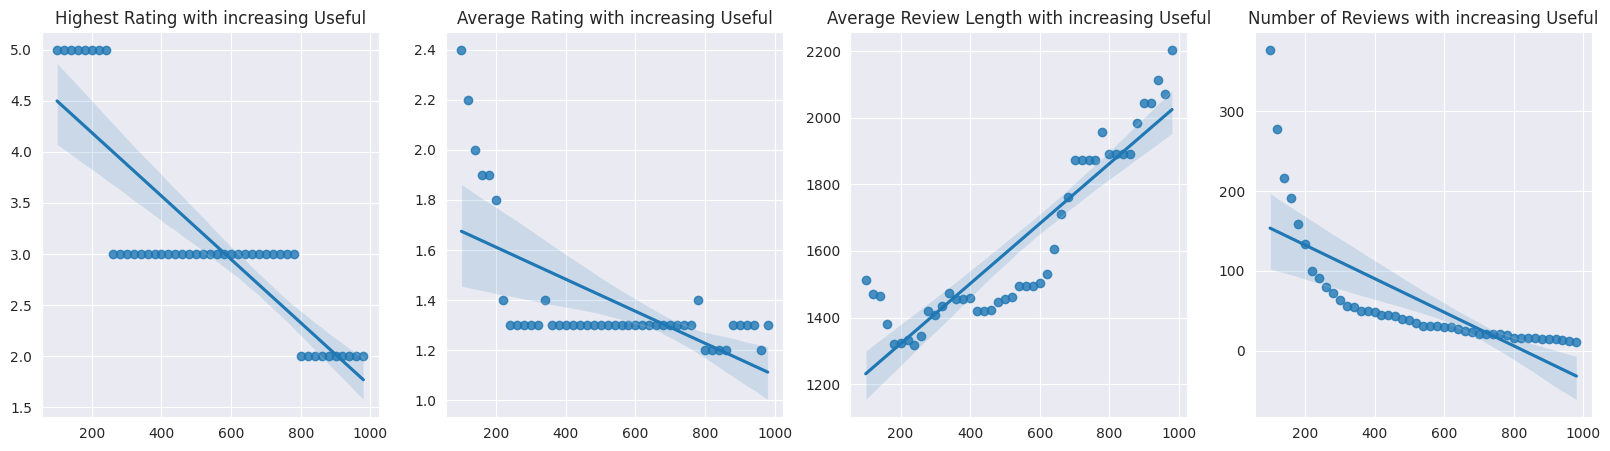

In [ ]:
reviews = reviews.query('useful>0 and funny>0 and cool>0')

thresholds = [x for x in range(100,1000,20)]
max_star = [round(reviews.query('useful>@thres').stars.max(),1) for thres in thresholds]
avg_star = [round(reviews.query('useful>@thres').stars.mean(),1) for thres in thresholds]
avg_review_len = [reviews.query('useful>@thres')['text'].agg(lambda x: len(x)).agg('mean') for thres in thresholds]
n_review = [reviews.query('useful>@thres').stars.count() for thres in thresholds]

fig, axes = plt.subplots(1, 4, figsize = [20,5])
sns.regplot(x=thresholds, y=max_star,ax = axes[0])
axes[0].title.set_text('Highest Rating with increasing Useful')

sns.regplot(x=thresholds, y=avg_star,ax = axes[1])
axes[1].title.set_text('Average Rating with increasing Useful')

sns.regplot(x=thresholds, y=avg_review_len,ax = axes[2])
axes[2].title.set_text('Average Review Length with increasing Useful')

sns.regplot(x=thresholds, y=n_review,ax = axes[3])
axes[3].title.set_text('Number of Reviews with increasing Useful')

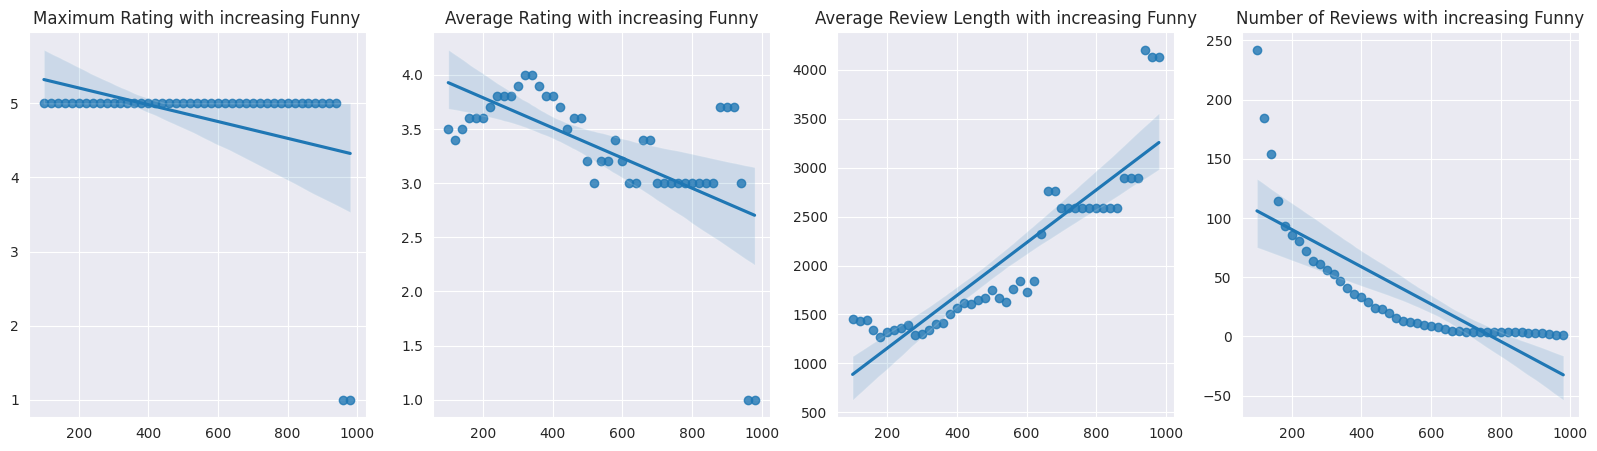

In [ ]:
thresholds = [x for x in range(100,1000,20)]
max_star = [round(reviews.query('funny>@thres').stars.max(),1) for thres in thresholds]
avg_star = [round(reviews.query('funny>@thres').stars.mean(),1) for thres in thresholds]
avg_review_len = [reviews.query('funny>@thres')['text'].agg(lambda x: len(x)).agg('mean') for thres in thresholds]
n_review = [reviews.query('funny>@thres').stars.count() for thres in thresholds]

fig, axes = plt.subplots(1, 4, figsize = [20,5])
sns.regplot(x=thresholds, y=max_star,ax = axes[0])
axes[0].title.set_text('Maximum Rating with increasing Funny')

sns.regplot(x=thresholds, y=avg_star,ax = axes[1])
axes[1].title.set_text('Average Rating with increasing Funny')

sns.regplot(x=thresholds, y=avg_review_len,ax = axes[2])
axes[2].title.set_text('Average Review Length with increasing Funny')

sns.regplot(x=thresholds, y=n_review,ax = axes[3])
axes[3].title.set_text('Number of Reviews with increasing Funny')

### 情感分析

In [ ]:
from textblob import TextBlob

以下是一个简单的 TextBlob 实现示例，演示了如何使用 TextBlob 进行基本的文本处理和情感分析：

```python
from textblob import TextBlob

# 创建 TextBlob 对象
text = "I love this product! It's amazing."
blob = TextBlob(text)

# 分词
words = blob.words
print("分词结果：", words)

# 词性标注
tags = blob.tags
print("词性标注结果：", tags)

# 名词短语提取
noun_phrases = blob.noun_phrases
print("名词短语提取结果：", noun_phrases)

# 情感分析
sentiment = blob.sentiment
polarity = sentiment.polarity
subjectivity = sentiment.subjectivity
print("情感分析结果：")
print("极性（-1 到 1 之间，负面到正面）：", polarity)
print("主观性（0 到 1 之间，客观到主观）：", subjectivity)
```

这段代码首先导入了 TextBlob 库，并创建了一个 TextBlob 对象 blob，表示待处理的文本。然后，通过调用 TextBlob 对象的方法，如 words、tags、noun_phrases 和 sentiment，进行文本处理和情感分析。

在这个示例中，输入文本是 "I love this product! It's amazing."，TextBlob 对象 blob 分别执行了分词、词性标注、名词短语提取和情感分析这几个任务，并输出了相应的结果。

In [ ]:
%%time
elite_review_sentiment_score_2012 = reviews.merge(user[user['elite'].isnull()]['user_id'])\
.query("date.str.startswith('2012')", engine='python')['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

regular_review_sentiment_score_2012 = reviews.merge(user[user['elite'].notnull()]['user_id'])\
.query("date.str.startswith('2012')", engine='python')['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

CPU times: user 1min 33s, sys: 387 ms, total: 1min 34s
Wall time: 1min 35s


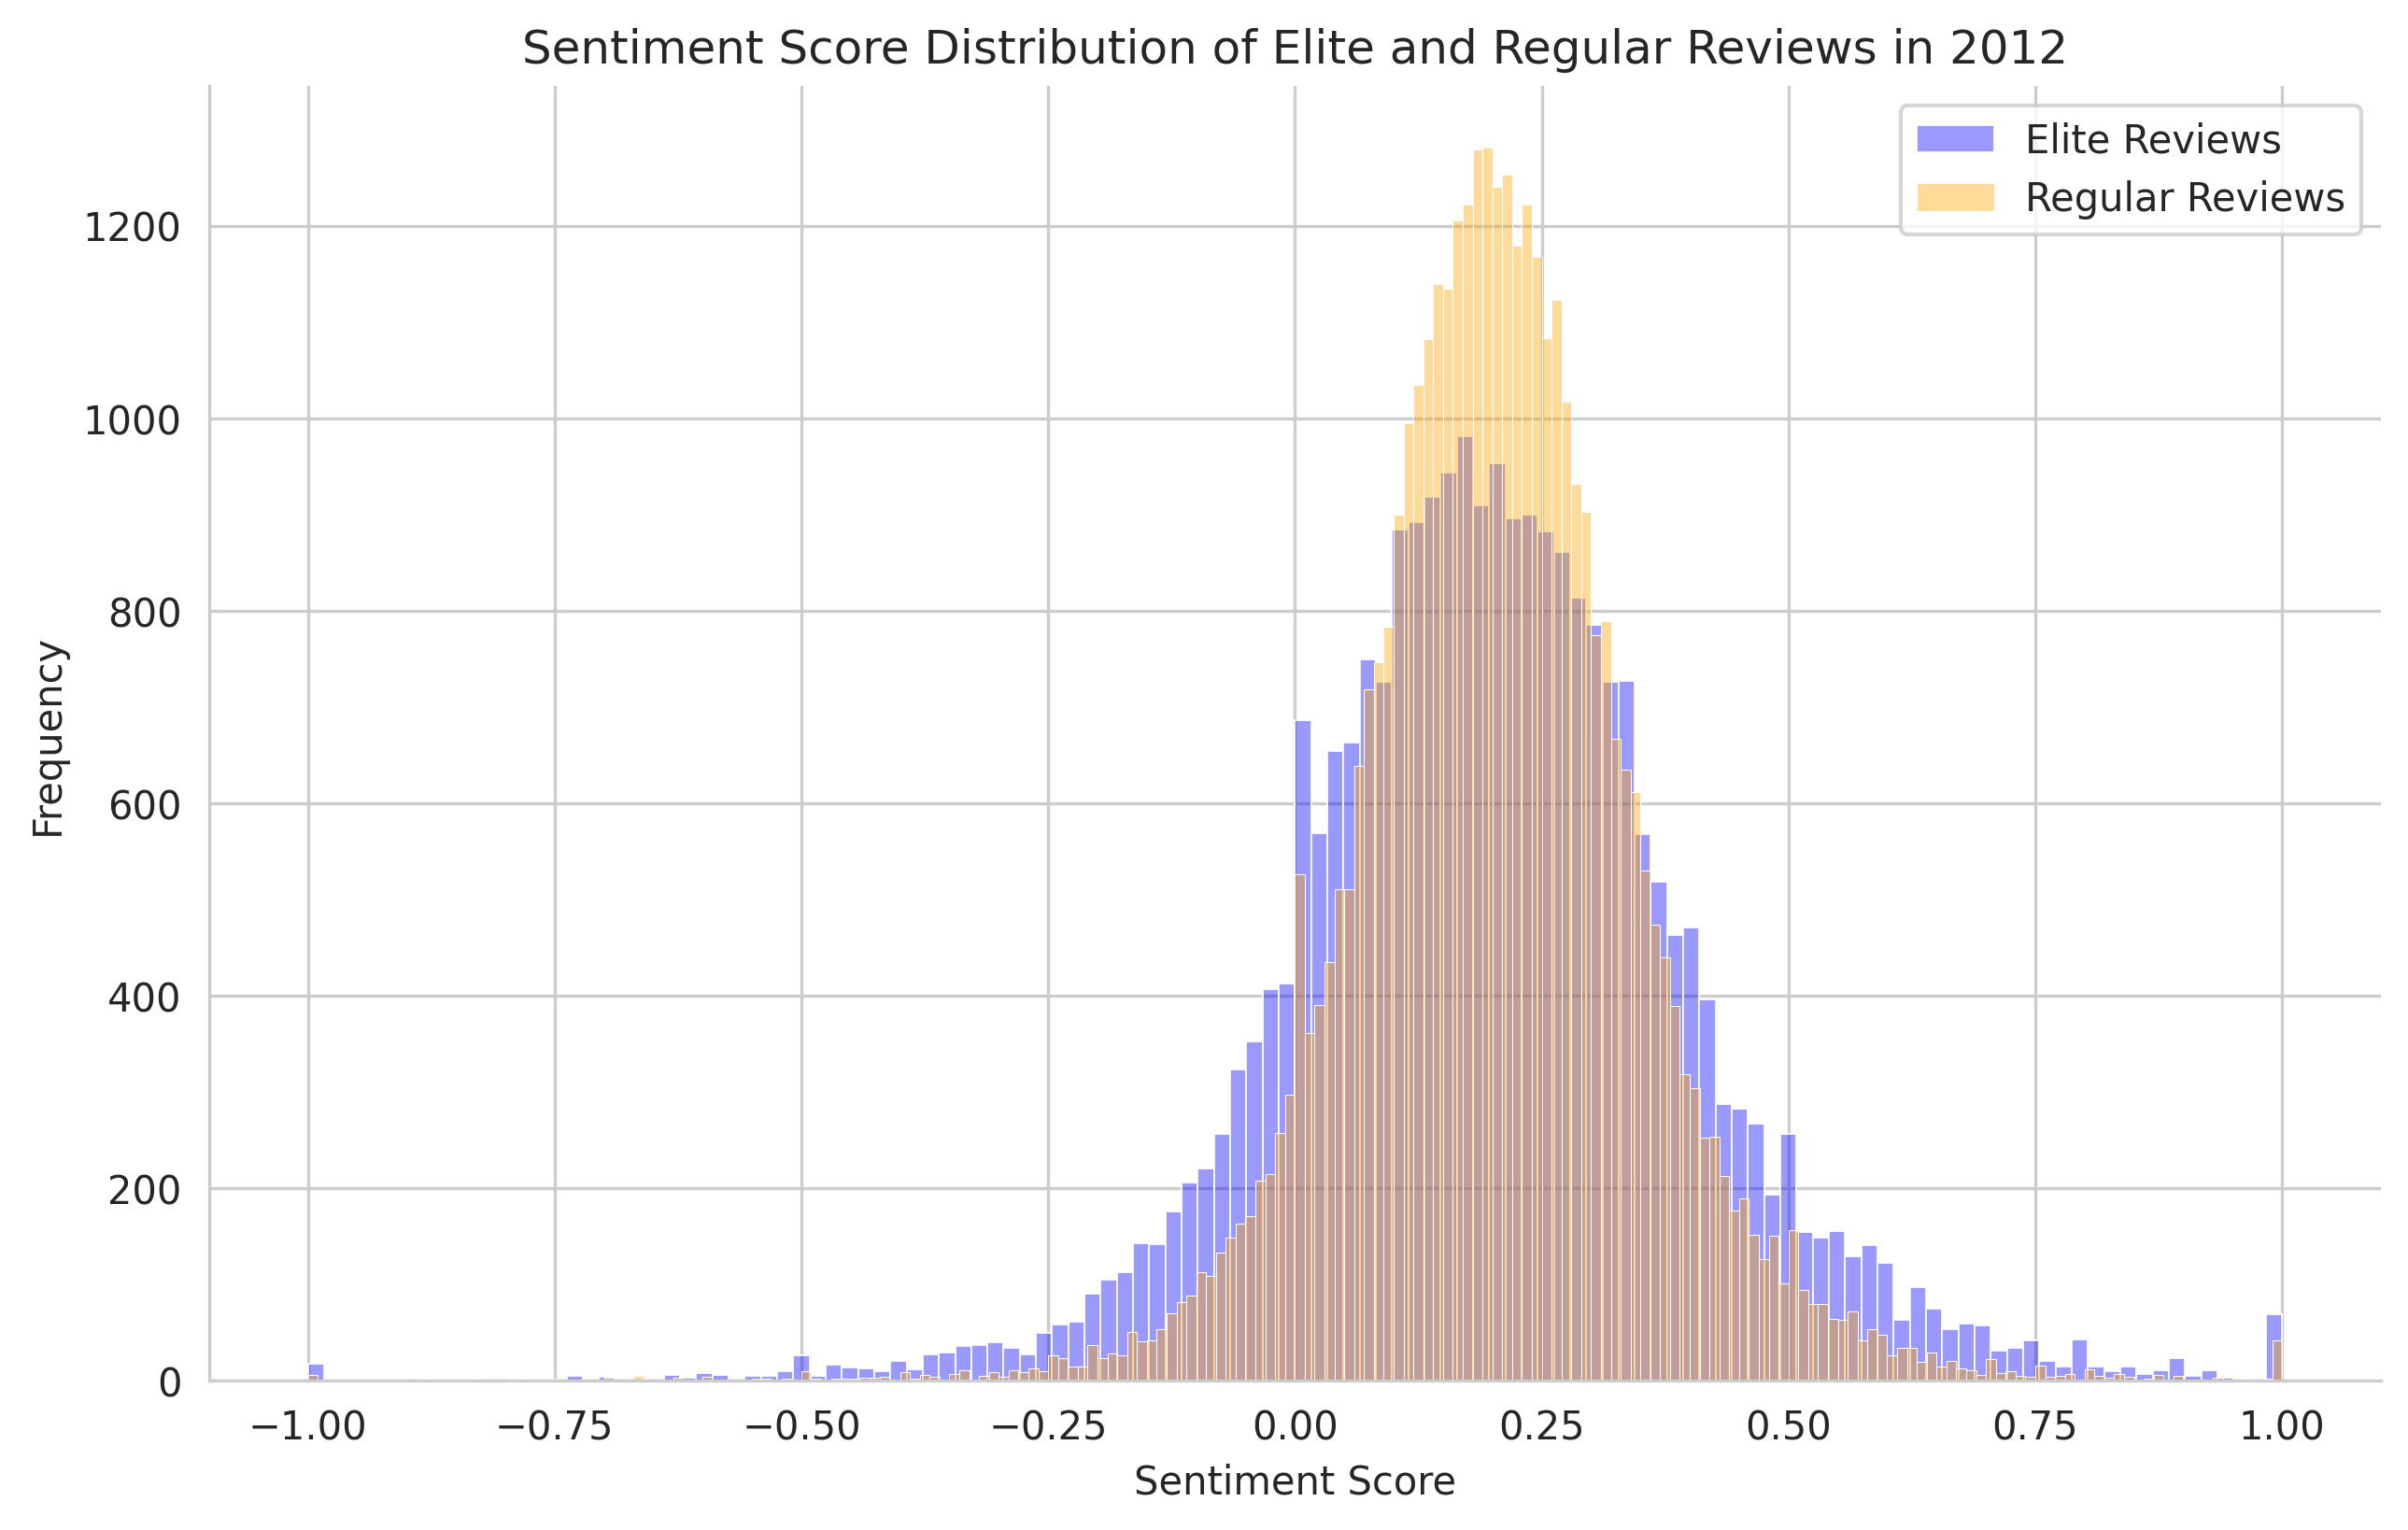

In [ ]:
# 设置图片清晰度
plt.rcParams['figure.dpi'] = 300

# 设置绘图风格
sns.set_style("whitegrid")

# 创建画布
plt.figure(figsize=(10, 6))

# 绘制精英评论情感得分的直方图，并设置颜色和透明度
sns.histplot(elite_review_sentiment_score_2012, alpha=0.4, color='blue', label='Elite Reviews')

# 绘制普通评论情感得分的直方图，并设置颜色和透明度
sns.histplot(regular_review_sentiment_score_2012, alpha=0.4, color='orange', label='Regular Reviews')

# 添加图标题
plt.title('Sentiment Score Distribution of Elite and Regular Reviews in 2012')

# 添加 x 轴标签
plt.xlabel('Sentiment Score')

# 添加 y 轴标签
plt.ylabel('Frequency')

# 显示图例
plt.legend()

# 去除边框
sns.despine()

# 显示图形
plt.show()

In [ ]:
def senti_word_cloud(s,max_words = 200):
    import matplotlib
    from wordcloud import WordCloud
    matplotlib.rcParams['figure.figsize'] = (20,10)
    # color_mask =imageio.imread("1.png")
    wc1 = WordCloud(background_color="black",  # 背景颜色
            max_words=max_words,  # 显示最大词数
            # font_path="msyh.ttf",
            width=1920, height=1080
            ) # 图幅宽度

    wc2 = WordCloud(background_color="white",  # 背景颜色
            max_words=max_words,  # 显示最大词数
            # font_path="msyh.ttf",
            width=1920, height=1080
            ) # 图幅宽度

    positivelist = []
    negativelist = []

    from textblob import TextBlob
    for each in s:
        each_word = TextBlob(each)
        feeling = each_word.sentiment.polarity
        if feeling > 0.5:
            positivelist.append(each)
        elif feeling < -0.5:
            negativelist.append(each)
        else:
            pass
    # 将积极和消极的两个列表各自合并成积极字符串和消极字符串，字符串中的词用空格分隔

    positive_string = " ".join(positivelist)
    negative_string = " ".join(negativelist)


    fig, axes = plt.subplots(1, 2, figsize=(20, 10))
    wc1.generate(negative_string)
    axes[0].imshow(wc1, interpolation='bilinear')
    axes[0].set_title('Negative')
    axes[0].axis('off')

    wc2.generate(positive_string)
    axes[1].imshow(wc2, interpolation='bilinear')
    axes[1].set_title('Positive')
    axes[1].axis('off')


    plt.show()

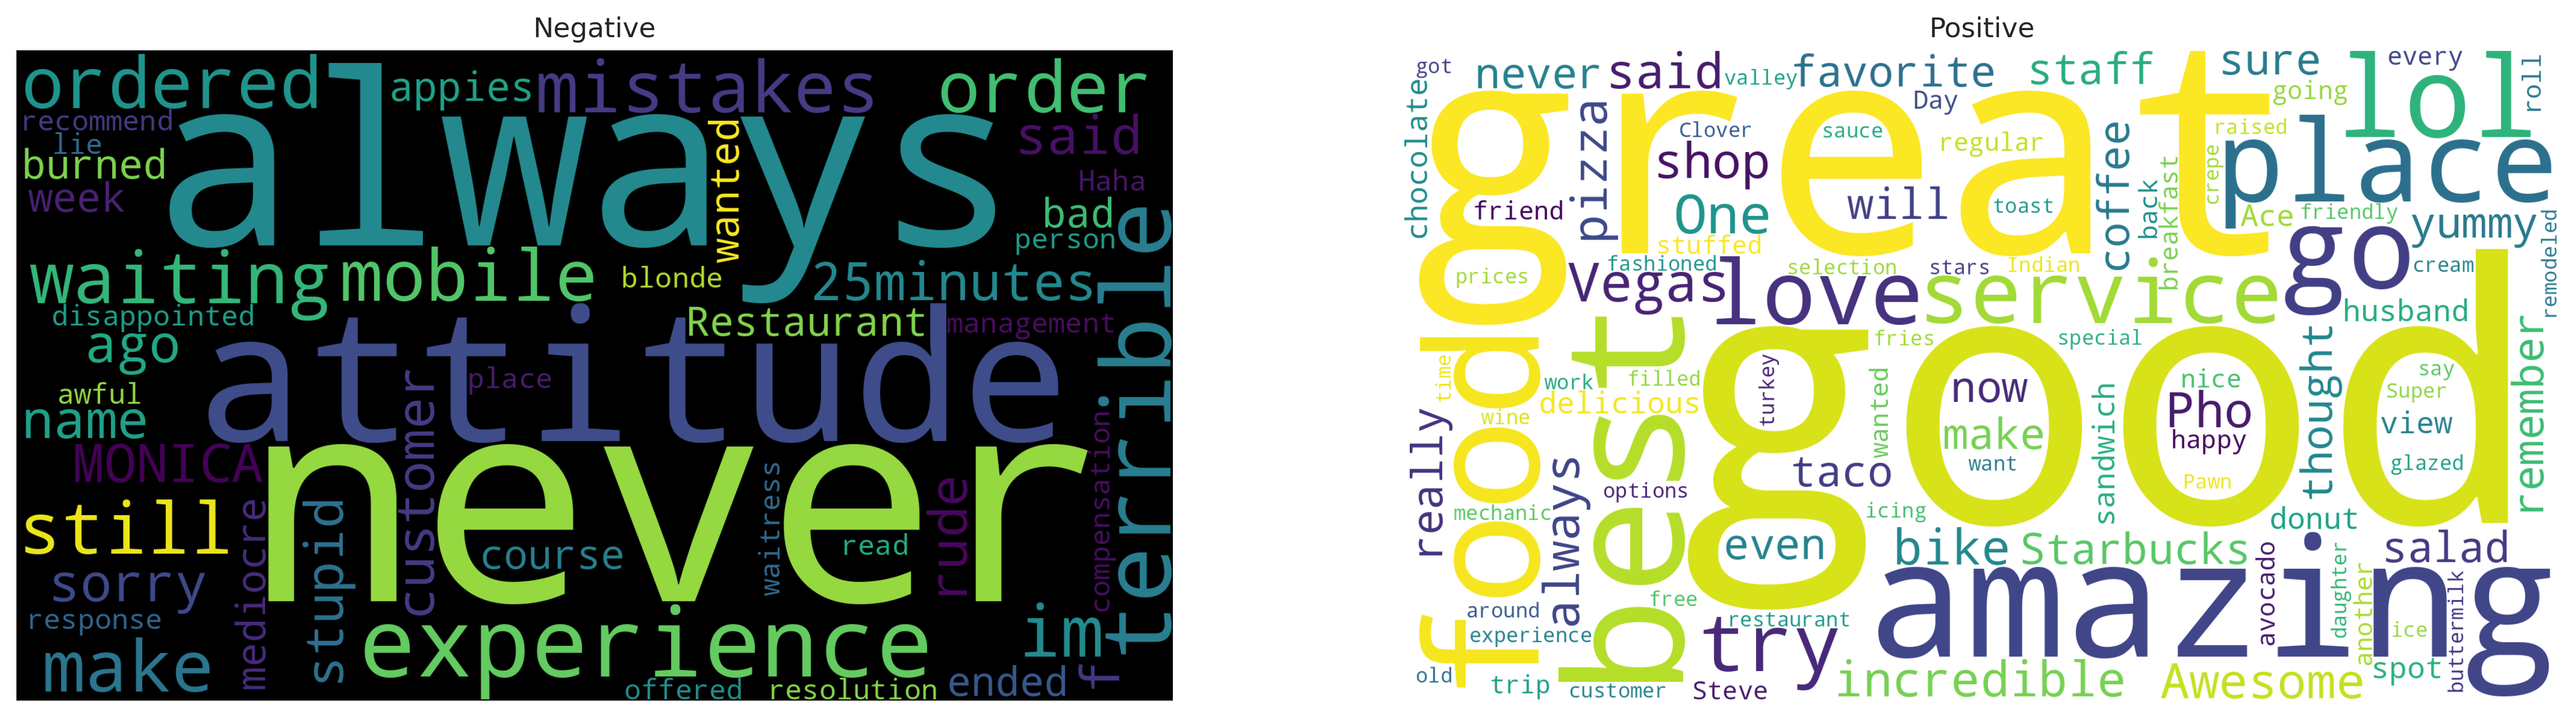

In [ ]:
senti_word_cloud(reviews['text'].sample(1000),max_words = 100)

分别对精英用户和普通用户的评论进性情感分析的极性打分，可以看出总体极性分布，精英用户更加集中在0.25左右，偏正向

然后我们分别看看极性超过0.25或者小于-0.25的关键词分布情况，构建词云



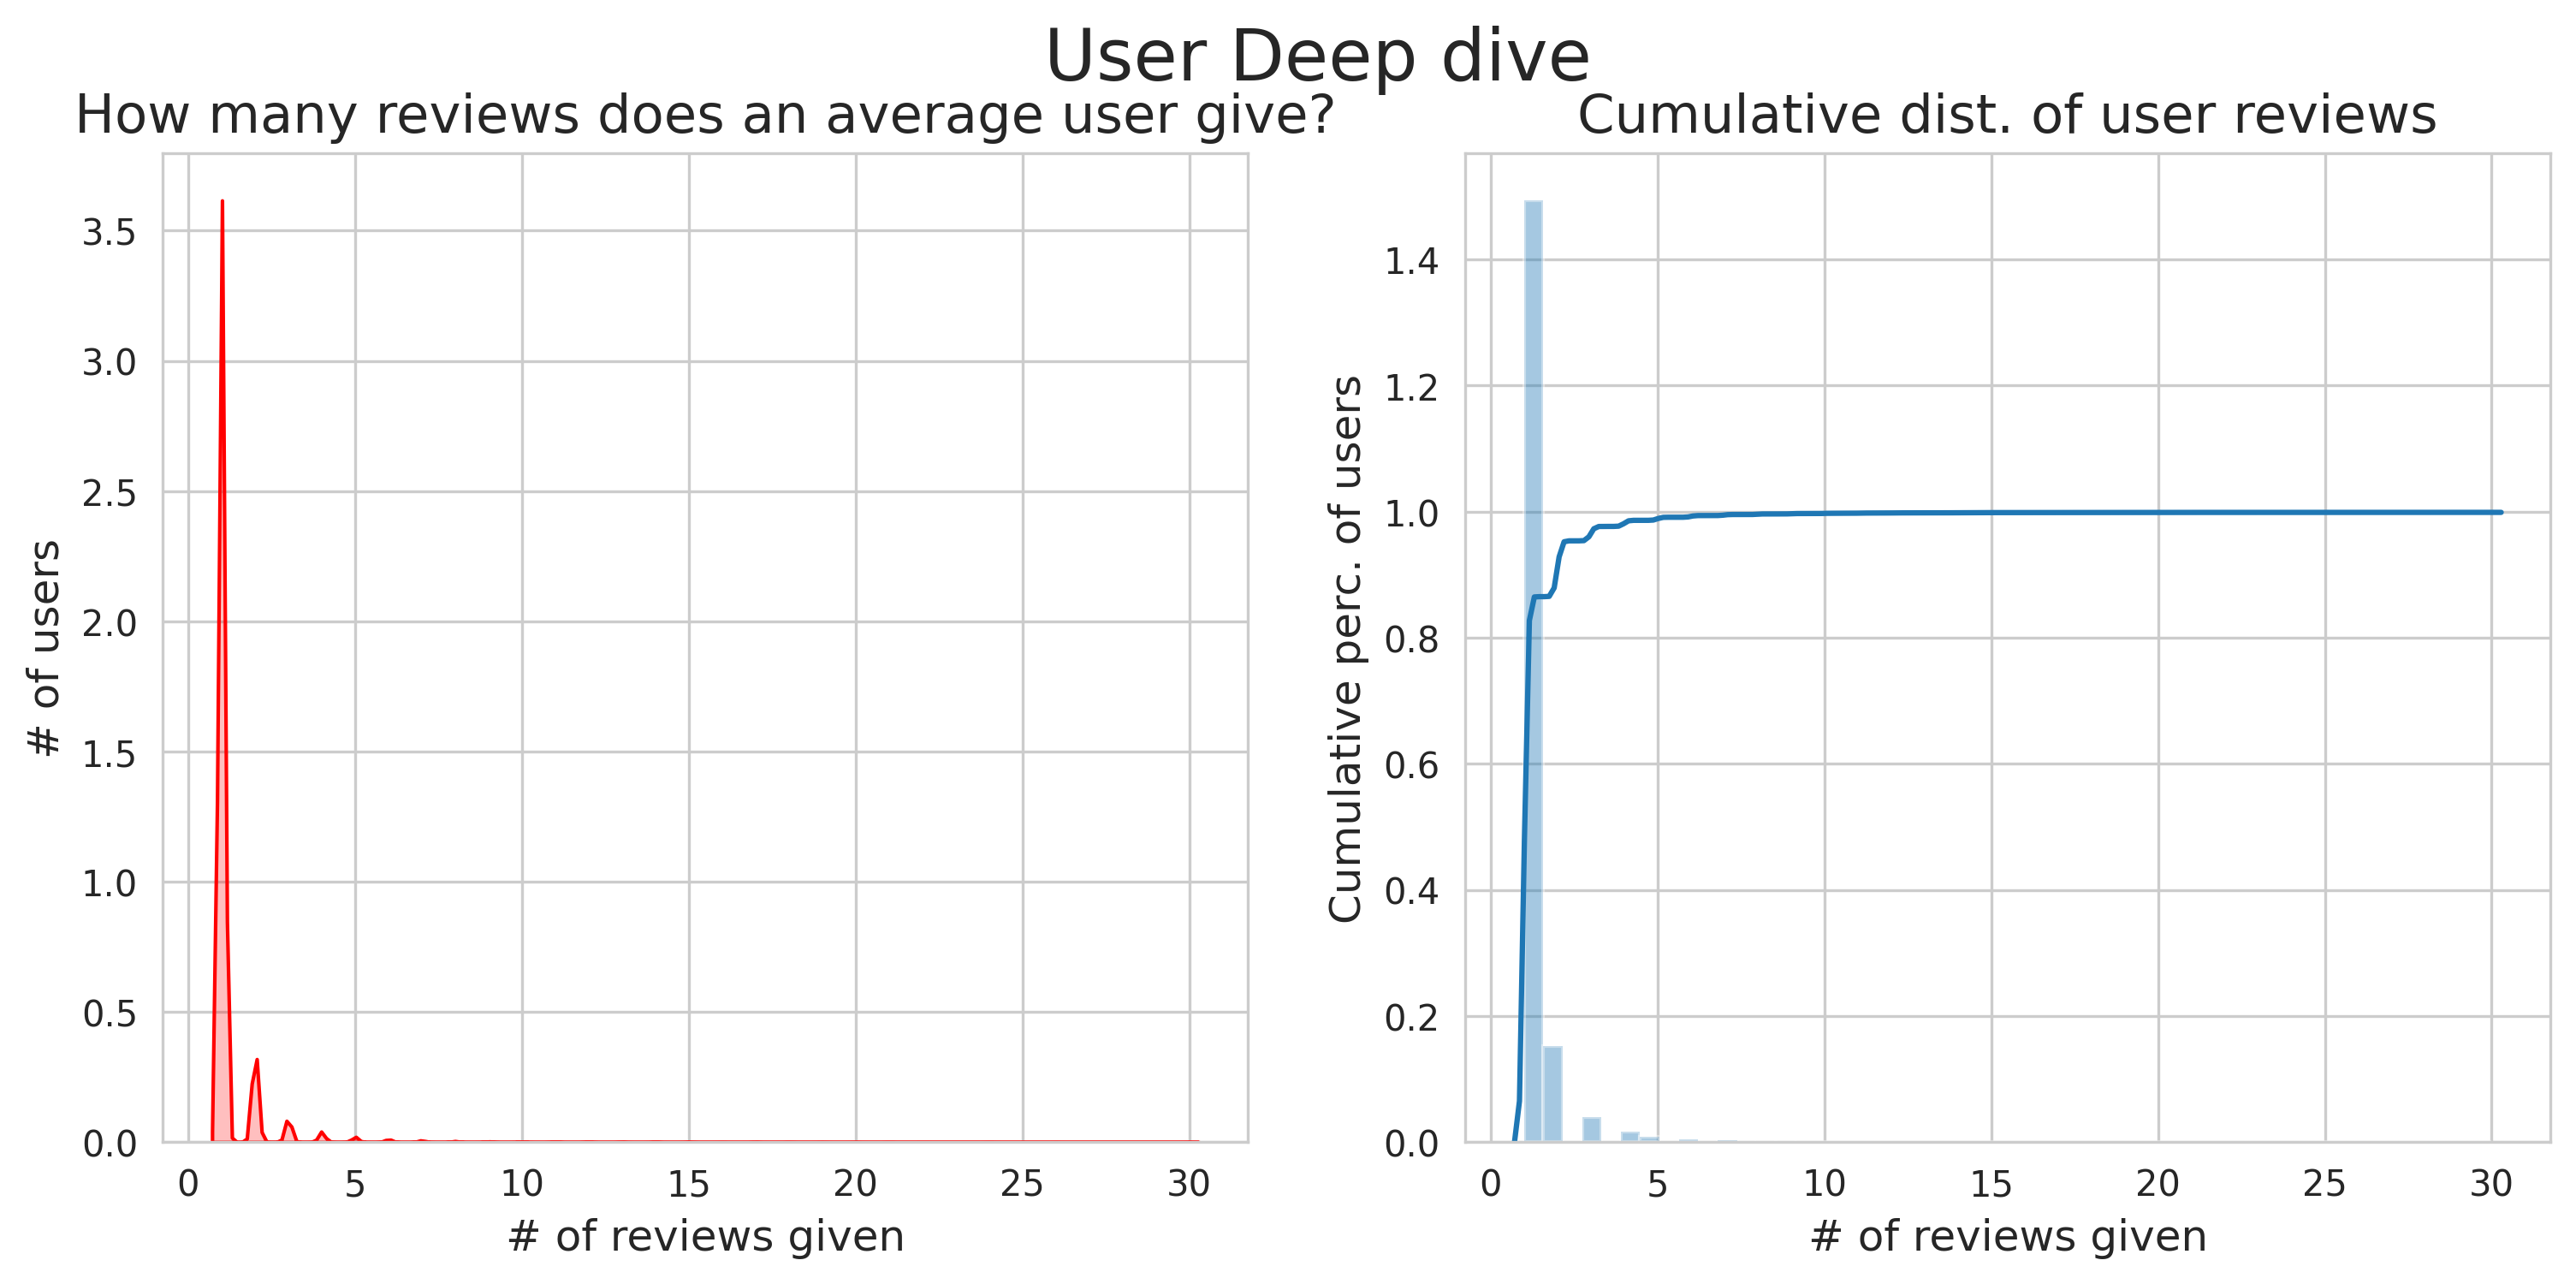

Took 389.0991747379303 s


In [ ]:
# Cap max reviews to 30 for better visuals
user_agg[('review_id','count')].loc[user_agg[('review_id','count')]>30] = 30
plt.figure(figsize=(12,5))
plt.suptitle("User Deep dive",fontsize=20)
gridspec.GridSpec(1,2)
plt.subplot2grid((1,2),(0,0))
#Cumulative Distribution
ax=sns.kdeplot(user_agg[('review_id','count')],shade=True,color='r')
plt.title("How many reviews does an average user give?",fontsize=15)
plt.xlabel('# of reviews given', fontsize=12)
plt.ylabel('# of users', fontsize=12)

#Cumulative Distribution
plt.subplot2grid((1,2),(0,1))
sns.distplot(user_agg[('review_id','count')],
             kde_kws=dict(cumulative=True))
plt.title("Cumulative dist. of user reviews",fontsize=15)
plt.ylabel('Cumulative perc. of users', fontsize=12)
plt.xlabel('# of reviews given', fontsize=12)

plt.show()
end_time=time.time()
print("Took",end_time-start_time,"s")

~80% of the users write only about 2 reviews!

这里只用了10000个数据样本

## 注册数据


-  `highlight_max`函数

`highlight_max`函数是一个用于在pandas的Series或DataFrame中突出显示最大值的Python函数。

-  参数

    - `data`：pandas的Series或DataFrame，需要突出显示最大值。
    - `color`：可选参数，用于指定用于突出显示最大值的颜色。默认为'yellow'。

- 工作原理

    1. 函数首先创建一个字符串`attr`，其中包含基于`color`参数设置背景颜色的CSS样式。

    2. 然后，它使用`data.ndim`属性检查输入数据的维度。如果维度为1，意味着`data`是一个Series，函数会继续使用`data == data.max()`将Series中的每个值与最大值进行比较。这将创建一个布尔Series `is_max`，其中在值等于最大值的位置处为`True`，其他位置为`False`。

    3. 接下来，函数使用列表推导式为`is_max`中的每个值创建一个CSS样式字符串的列表，其中值为'True'时为'attr'，值为'False'时为''。这个CSS样式字符串的列表作为输出返回。

    4. 如果`data`的维度大于1，说明`data`是一个DataFrame，函数使用`data.max().max()`来获取整个DataFrame中的最大值。然后，它创建一个布尔DataFrame `is_max`，其形状与`data`相同，其中每个元素等于最大值时为`True`，否则为`False`。

    5. 接下来，函数使用`np.where()`创建一个新的DataFrame，其中与`is_max`中的`True`对应的值被设置为'attr'（即CSS样式字符串），与`False`对应的值被设置为空字符串''。生成的DataFrame具有与`data`相同的索引和列，并作为输出返回。


In [ ]:
def highlight_max(data, color='yellow'):
    '''
    highlight the maximum in a Series or DataFrame
    '''
    attr = 'background-color: {}'.format(color)
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_max = data == data.max()
        return [attr if v else '' for v in is_max]
    else:  # from .apply(axis=None)
        is_max = data == data.max().max()
        return pd.DataFrame(np.where(is_max, attr, ''),
                            index=data.index, columns=data.columns)

In [ ]:
#checkins exploration

# 对check_in数据按照'weekday'和'hour'进行分组，计算每组中的'checkins'之和
df = check_in.groupby(['weekday', 'hour'])['checkins'].sum()

# 重置索引，将分组后的结果转换为DataFrame
df = df.reset_index()

# 使用'hour'作为行索引，'weekday'作为列索引，将'checkins'作为值的DataFrame
df = df.pivot(index='hour', columns='weekday')[['checkins']]

# 删除多余的列级别
df.columns = df.columns.droplevel()

# 重置行索引
df = df.reset_index()

# 对'hour'列进行处理，将其转换为整数类型
# 这里使用了lambda函数和split方法将时间字符串中的分钟部分去掉
df.hour = df.hour.apply(lambda x: str(x).split(':')[0])
df.hour = df.hour.astype(int)

# 按照'hour'列的值进行排序
df = df.sort_values('hour')

# 重新排列列的顺序，将'hour'列放在第一列
df = df[['hour', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']]

# 创建颜色映射
cm = sns.light_palette("orange", as_cmap=True)

# 使用自定义函数highlight_max，将每列中的最大值突出显示，颜色为蓝色
df.style.apply(highlight_max, color='#679bff', axis=0)


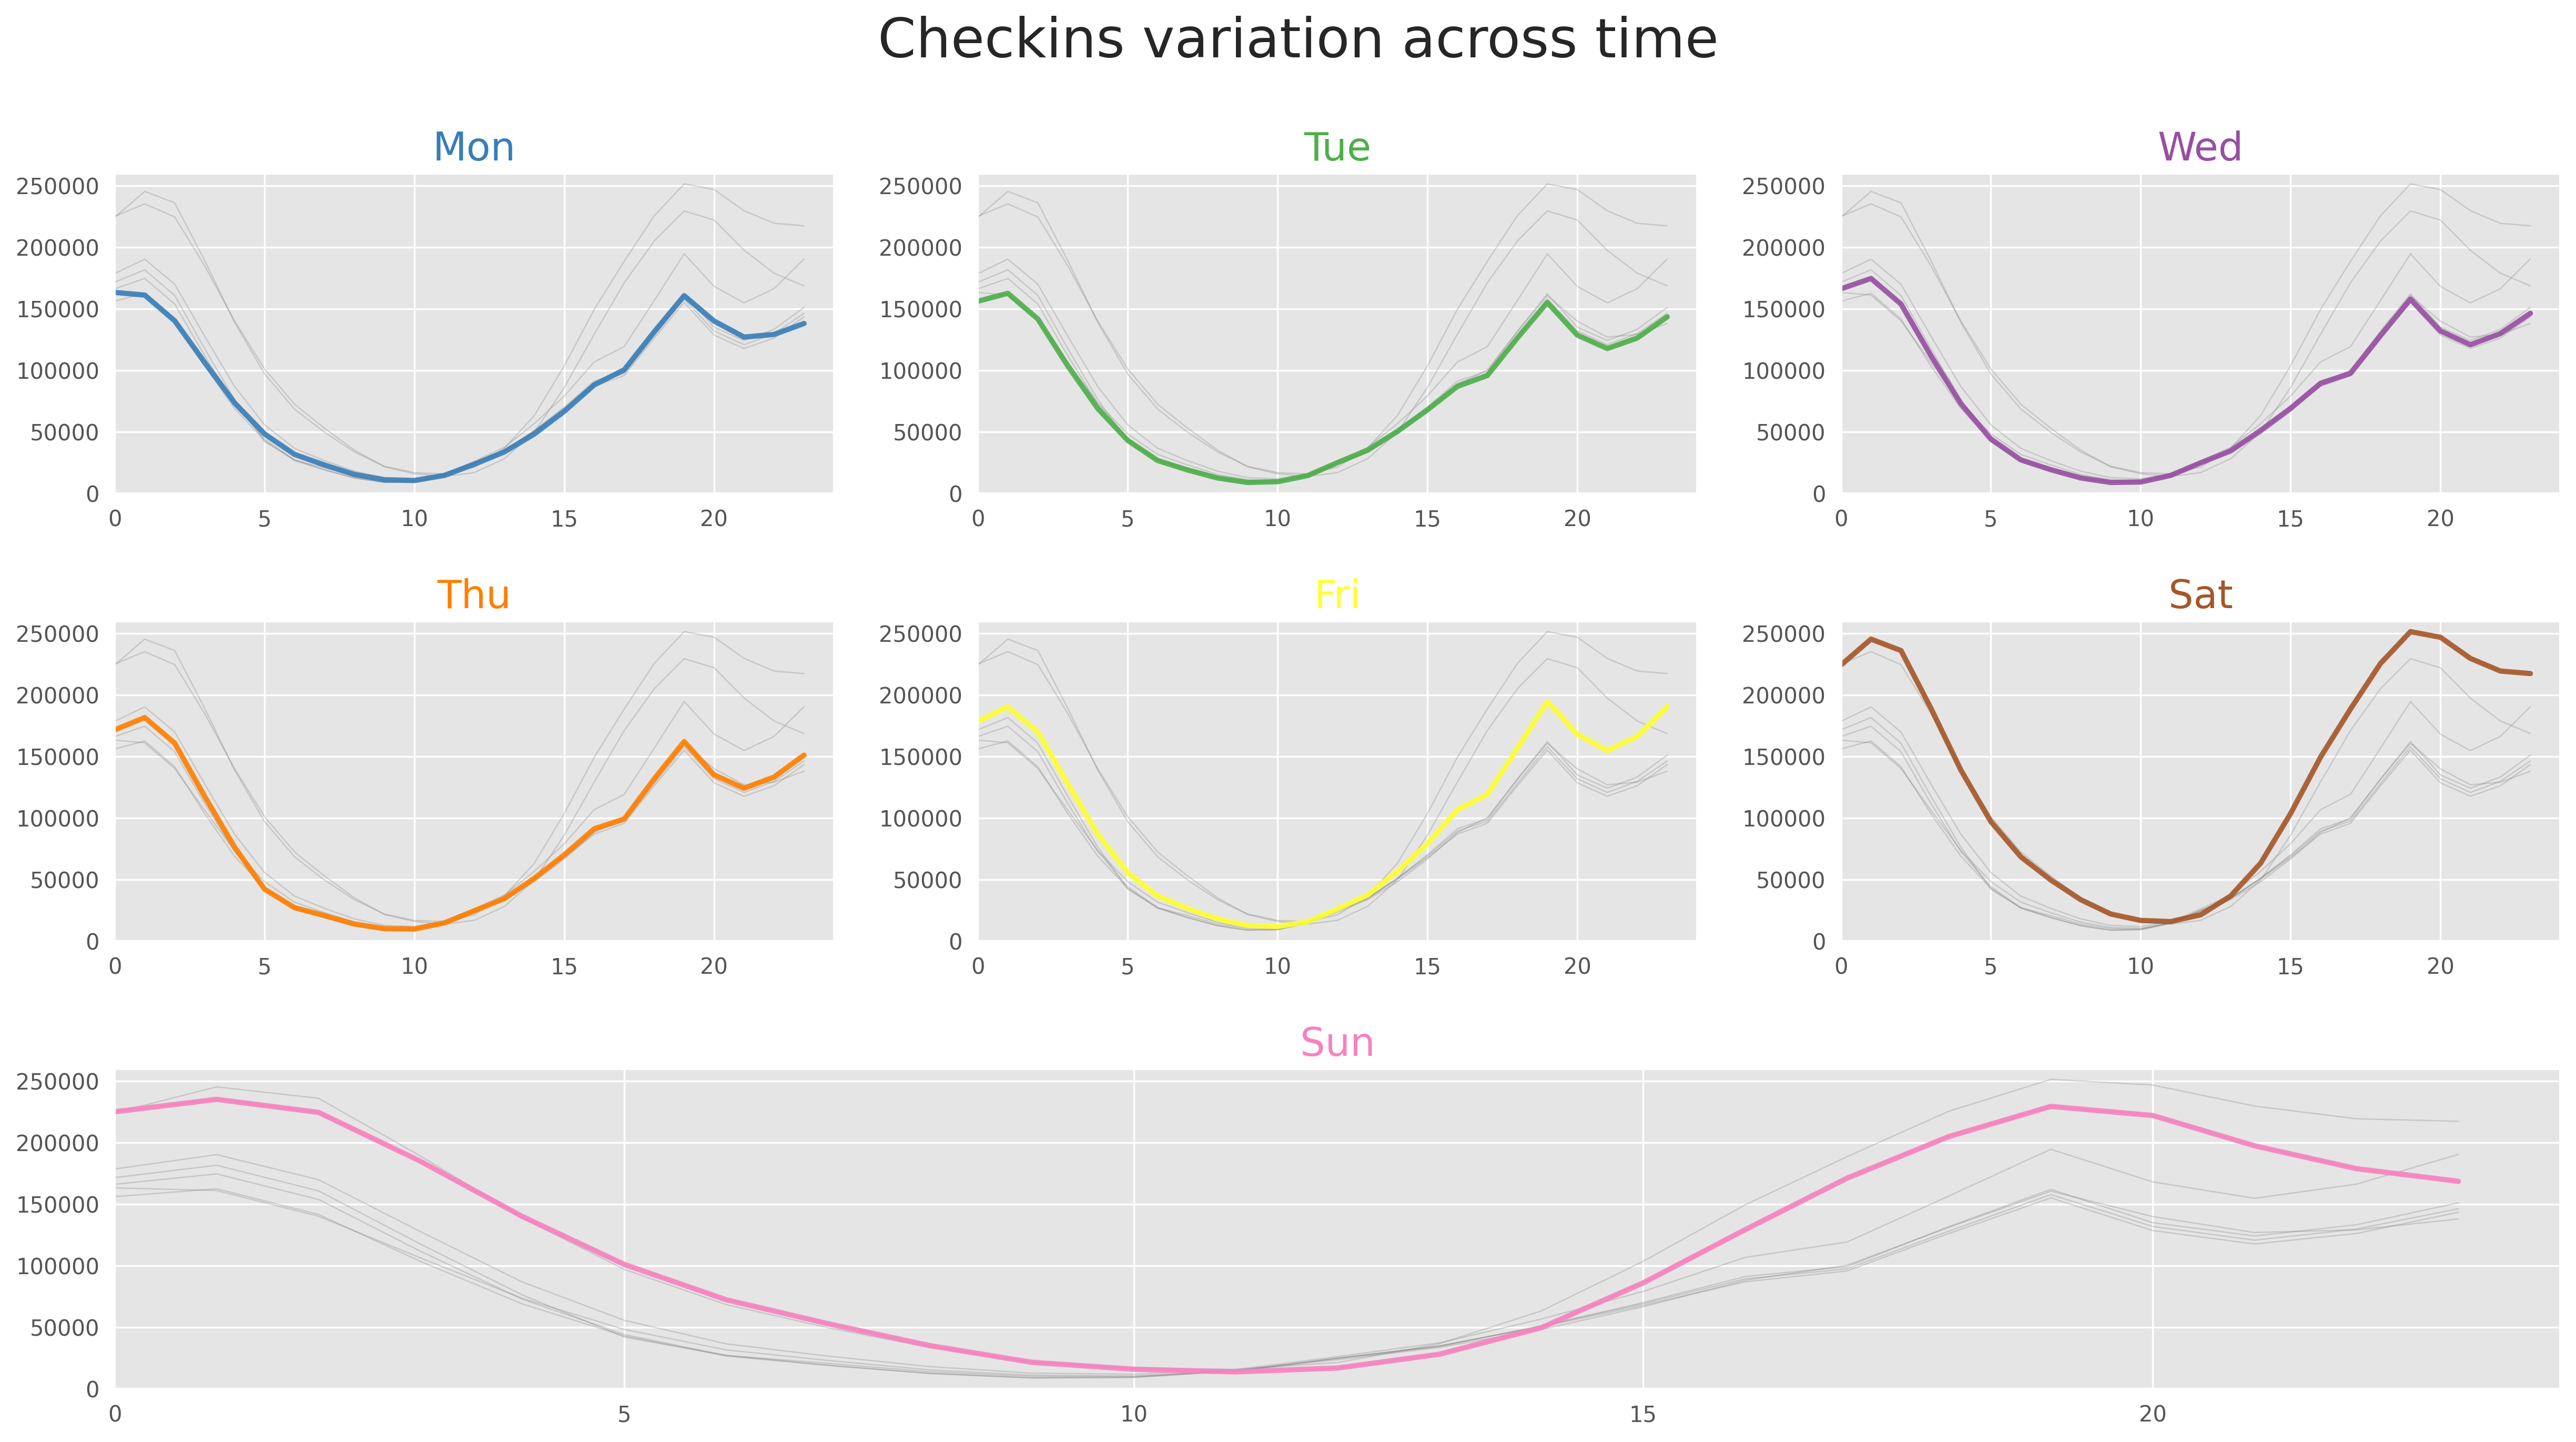

In [ ]:
plt.style.use('ggplot')

# 使用'seaborn-darkgrid'样式设置绘图风格

# 创建颜色调色板
palette = plt.get_cmap('Set1')

# 创建一个大小为(20,10)的图像
plt.figure(figsize=(20,10))

# 添加总标题
plt.suptitle("Checkins variation across time", fontsize=25)

# 创建3x3的网格布局
gridspec.GridSpec(3,3)

# 调整子图之间的垂直间距
plt.subplots_adjust(hspace=0.4)

# 循环绘制多个线图
num = 0
for column in df.drop('hour', axis=1):
    num += 1
    # 找到子图的位置

    if num == 7:  # 调整以适应星期日的位置
        plt.subplot2grid((3,3), (2,0), colspan=3)
    else:
        plt.subplot(3,3, num)

    # 绘制离散的灰色线图，表示所有组的趋势
    for v in df.drop('hour', axis=1):
        plt.plot(df['hour'], df[v], marker='', color='grey', linewidth=0.6, alpha=0.3)

    # 绘制带有标签的线图，表示特定组的趋势
    plt.plot(df['hour'], df[column], marker='', color=palette(num), linewidth=2.4, alpha=0.9, label=column)

    # 设置x轴的范围
    plt.xlim(0,24)

    # 设置y轴的范围
    plt.ylim(-2,260000)

    # 关闭部分子图的x轴刻度
    if num in range(4) :
        plt.tick_params(labelbottom='off')

    # 关闭部分子图的y轴刻度
    if num not in [1,4,7] :
        plt.tick_params(labelleft='off')

    # 添加子图标题
    plt.title(column, loc='center', fontsize=18, fontweight=0, color=palette(num))

# 商户维度

### Business with most Five Star Reviews from Users

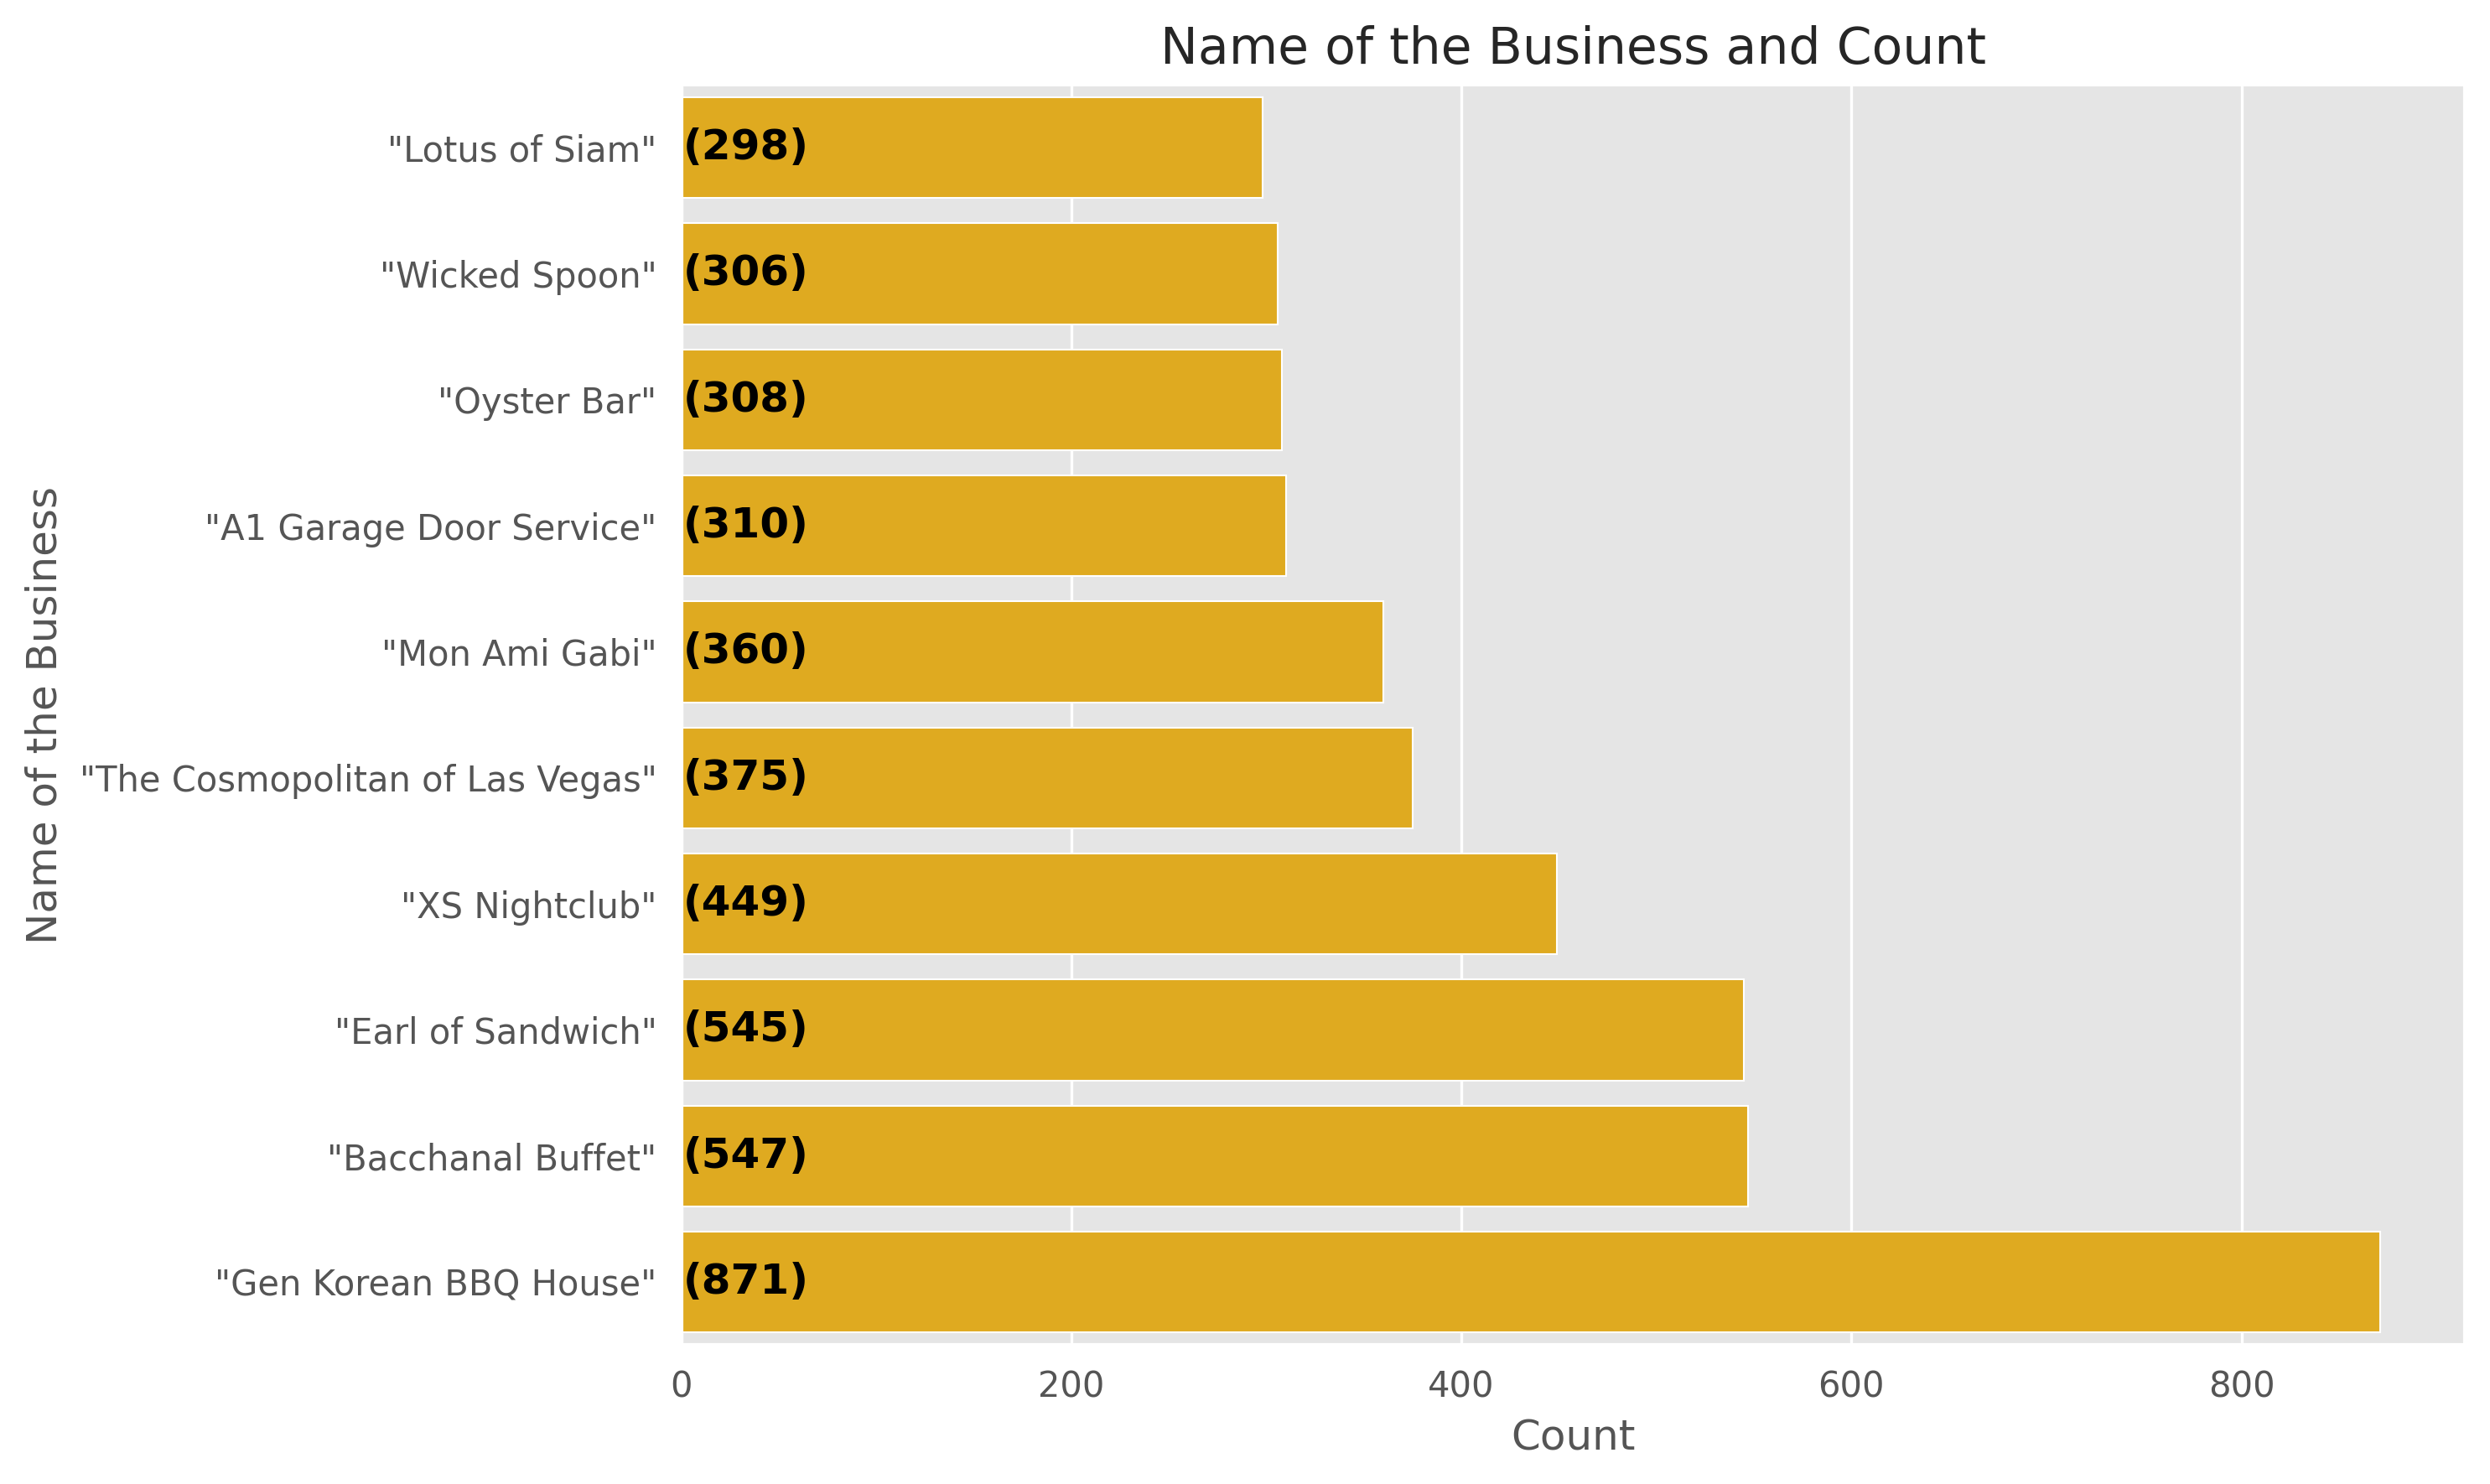

In [ ]:
# 第一步：筛选出评分为5星的评论，按business_id分组并统计数量，按数量降序排序，取前10条
most5StarsReviews = reviews[reviews['stars'] == 5].groupby('business_id').size().reset_index(name='Count')
most5StarsReviews = most5StarsReviews.sort_values(by='Count', ascending=False).head(10)

# 第二步：将most5StarsReviews与business进行内连接
most5StarsReviews = pd.merge(most5StarsReviews, business, on='business_id', how='inner')

# 第三步：按Count对name进行重排序
most5StarsReviews = most5StarsReviews.sort_values(by='Count')

# 设置填充颜色
fillColor = '#ffb800'

# 第四步：绘制条形图
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Count', y='name', data=most5StarsReviews, color=fillColor, edgecolor='white')

# 添加文本注释
for i, v in enumerate(most5StarsReviews['Count']):
    ax.text(1, i, f"({v})", ha='left', va='center', fontsize=12, fontweight='bold', color='black')

# 设置坐标轴标签和标题
plt.xlabel('Count')
plt.ylabel('Name of the Business')
plt.title('Name of the Business and Count')

# 设置图形样式
sns.set_style('whitegrid')

plt.tight_layout()
plt.show()

## Gen Korean BBQ House

In [ ]:
business[business['name'] == '"Gen Korean BBQ House"']

business_id                    name neighborhood  \
14969   eLFfWcdb7VkqNyTONksHiQ  "Gen Korean BBQ House"          NaN   
119598  EveFgxNoHkrs8ncSjkoINA  "Gen Korean BBQ House"          NaN   

                                   address       city state postal_code  \
14969         "1300 W Sunset Rd, Ste 2920"  Henderson    NV       89014   
119598  "2000 E Rio Salado Pkwy, Ste 1056"      Tempe    AZ       85281   

         latitude   longitude  stars  review_count  is_open  \
14969   36.066776 -115.042471    4.0          1652        1   
119598  33.432887 -111.905102    4.0           261        1   

                                 categories  
14969   Barbeque;Korean;Restaurants;Buffets  
119598          Korean;Restaurants;Barbeque

### Useful,funny,cool reviews

In [ ]:
target_business_id = 'eLFfWcdb7VkqNyTONksHiQ'

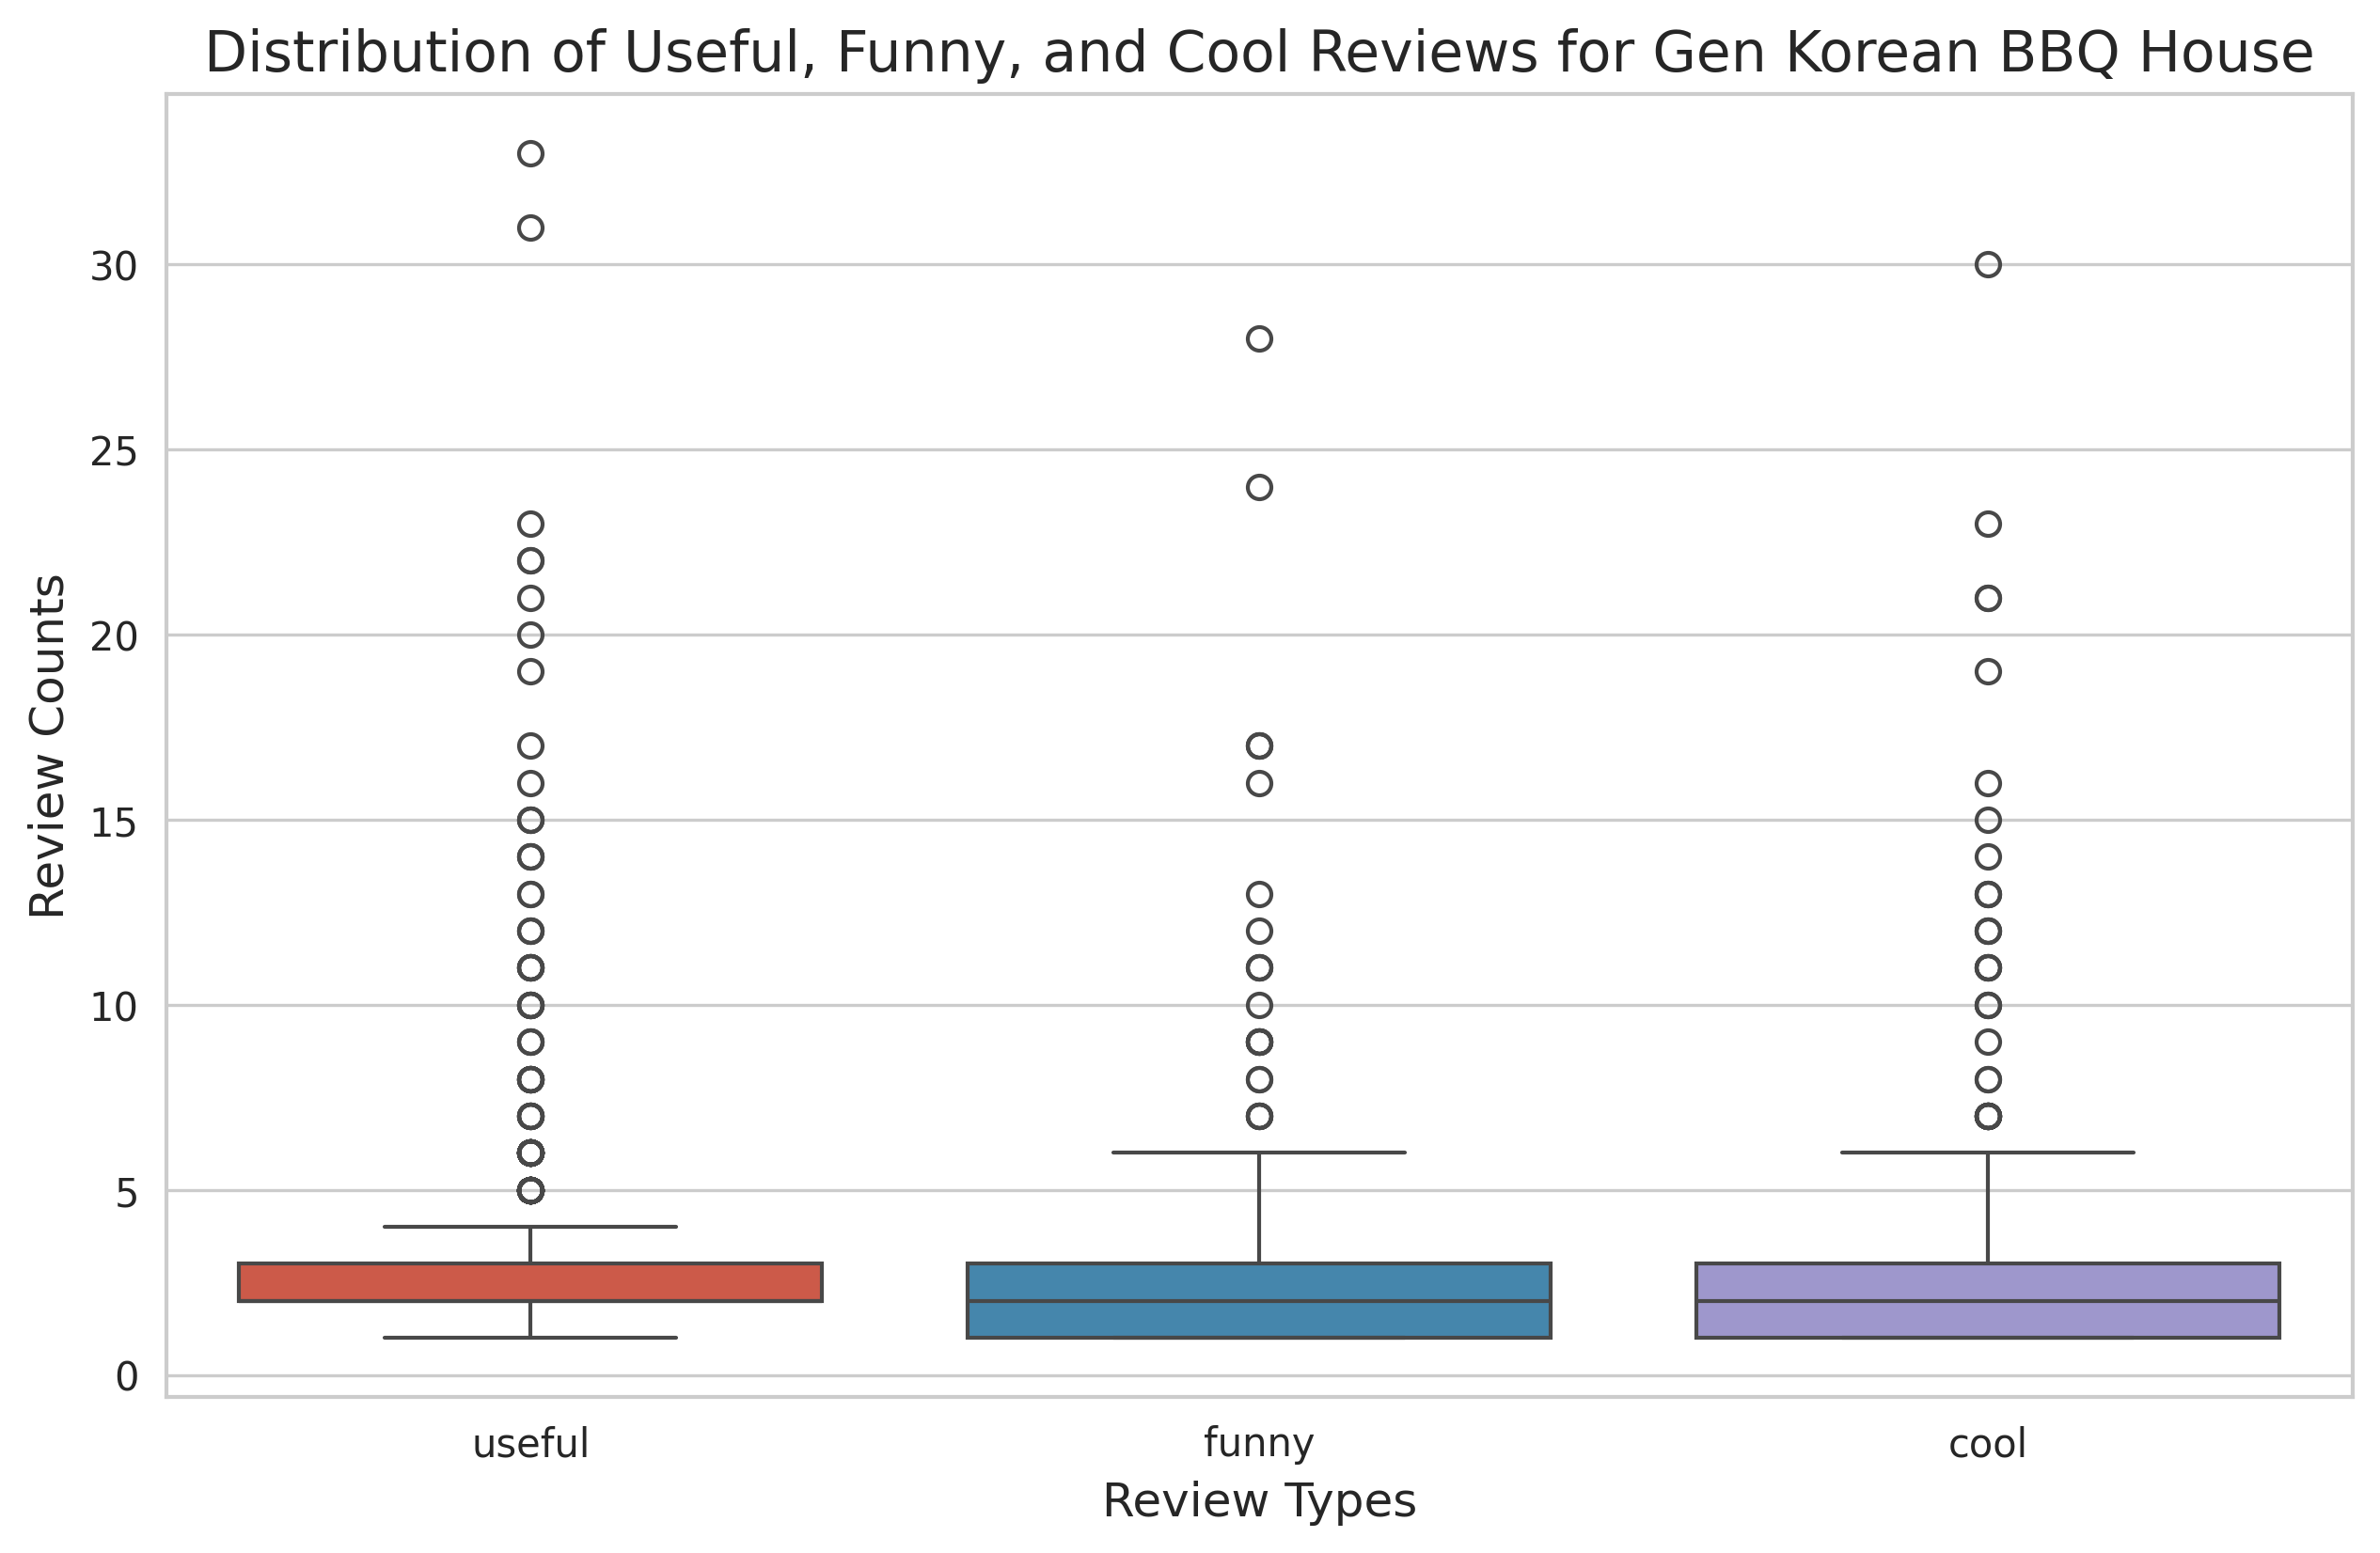

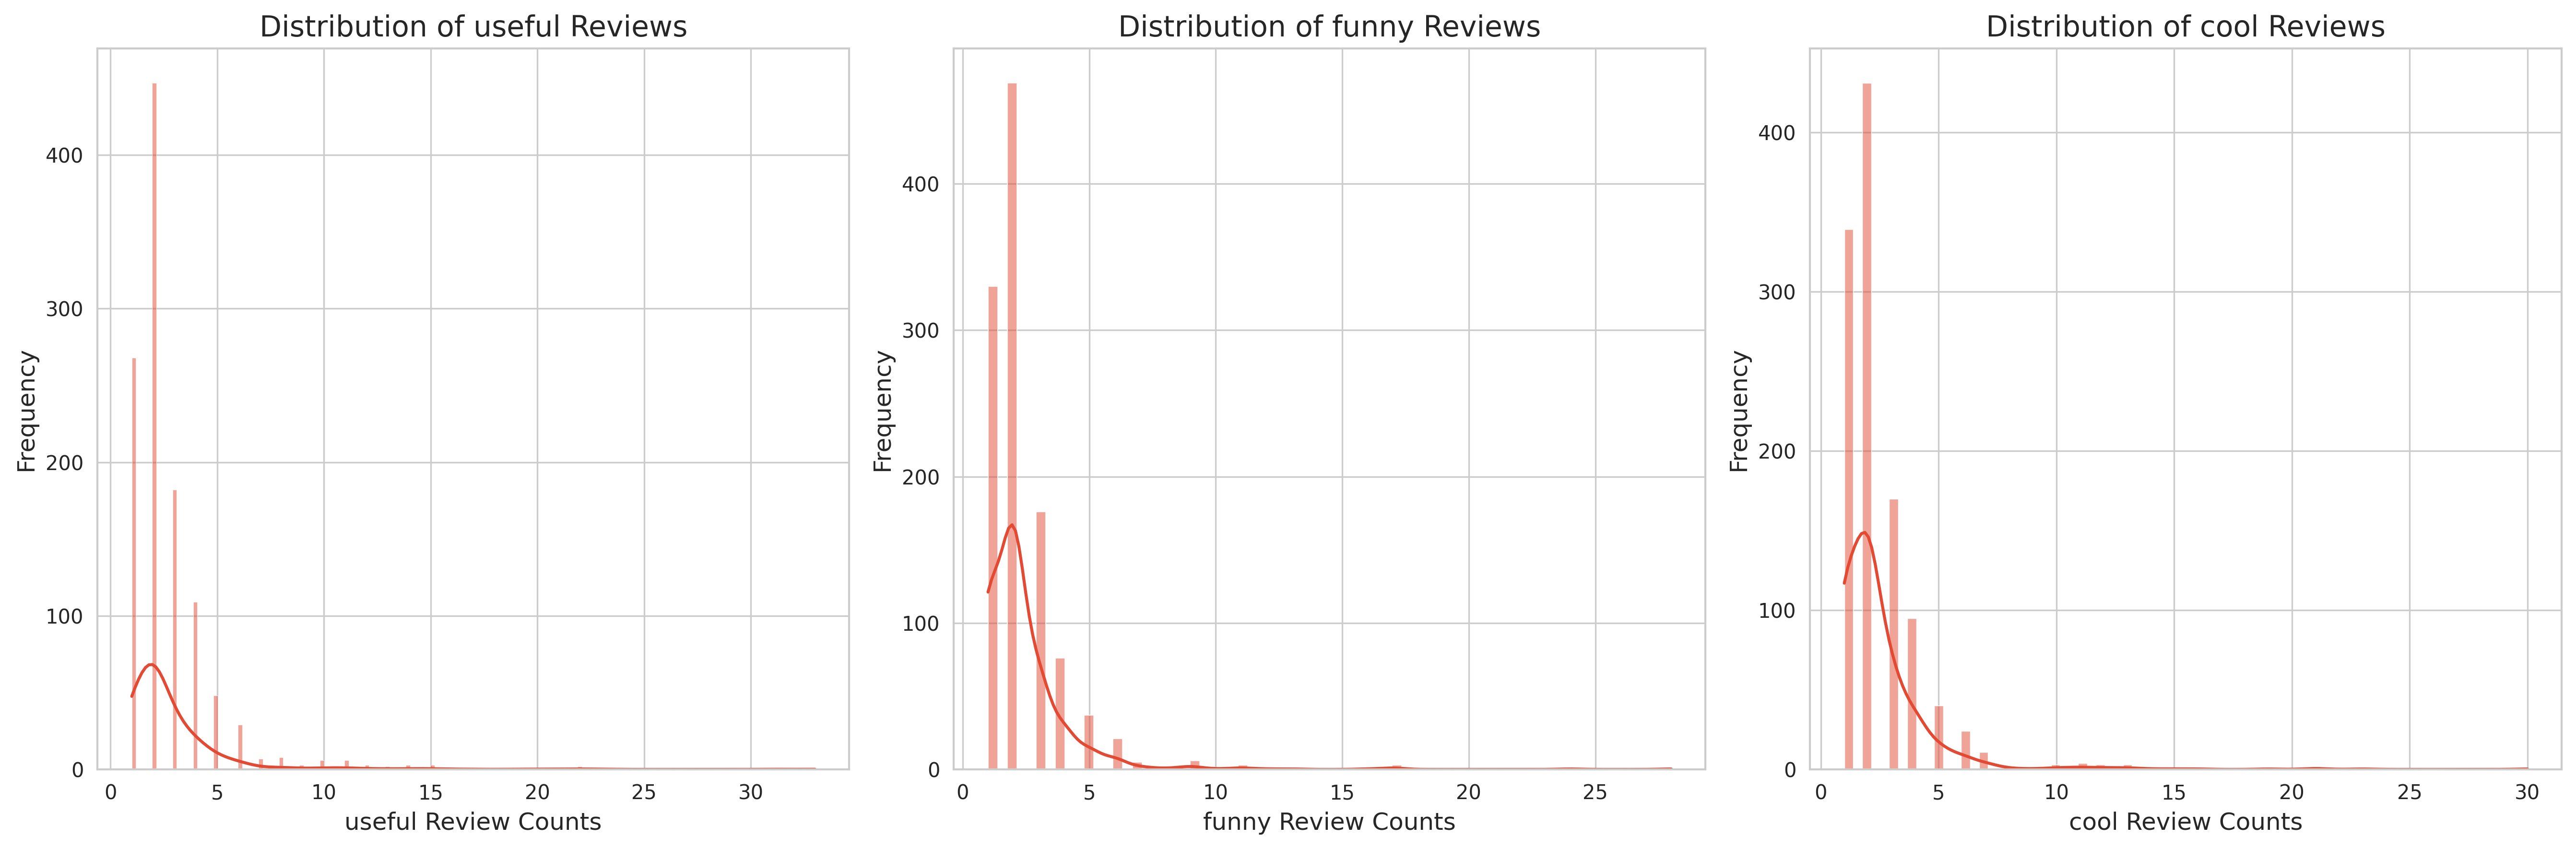

In [ ]:
selected_business = reviews[reviews['business_id'] == target_business_id]

# 提取 useful、funny 和 cool 列的数据
columns_to_plot = ['useful', 'funny', 'cool']
data_to_plot = selected_business[columns_to_plot]

# 绘制箱线图
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_to_plot)
plt.title('Distribution of Useful, Funny, and Cool Reviews for Gen Korean BBQ House')
plt.xlabel('Review Types')
plt.ylabel('Review Counts')
plt.show()

# 绘制直方图（可以更详细地展示分布）
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for i, col in enumerate(columns_to_plot):
    sns.histplot(selected_business[col], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {col} Reviews')
    axes[i].set_xlabel(f'{col} Review Counts')
    axes[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

### Word Cloud

In [ ]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# 下载停用词
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def createWordCloud(train, topk = 100, max_words=50):
    # 将文本拆分为单词
    words = train['text'].str.split(expand=True).stack().reset_index(drop=True)
    # 过滤停用词
    filtered_words = words[~words.isin(stop_words)]
    # 统计每个单词的出现次数
    word_counts = filtered_words.value_counts().reset_index(name='n').rename(columns={'index': 'word'})
    # 取前 30 个出现次数最多的单词
    topk_words = word_counts.head(topk)

    # 创建词云对象并优化参数
    wordcloud = WordCloud(
        max_words=max_words,
        colormap='Dark2',
        width=1200,  # 增加图片宽度
        height=600,  # 增加图片高度
        max_font_size=150,  # 调整最大字体大小
        min_font_size=10,  # 调整最小字体大小
        background_color='white',  # 设置背景颜色
        random_state=42,  # 固定随机状态以保证结果可复现
        collocations=False  # 不考虑词对
    ).generate_from_frequencies(dict(zip(topk_words['word'], topk_words['n'])))

    # 显示词云
    plt.figure(figsize=(15, 8))  # 调整图片显示大小
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.tight_layout()  # 紧凑布局
    plt.show()

# 筛选特定 business_id 的评论
selected_reviews = reviews[reviews['business_id'] == target_business_id]

# 调用函数创建词云
createWordCloud(selected_reviews)

Output hidden; open in https://colab.research.google.com to view.

### Top Ten most common Words of the business

实现思路

1. **筛选特定商家评论**：从 `DataFrame` 中筛选出指定商家的评论数据。
2. **分词处理**：把每条评论拆分成单个单词。
3. **停用词过滤**：去除像 “the”“and”“is” 这类无实际意义的停用词。
4. **词频统计**：统计每个单词的出现次数。
5. **排序与取前十个**：按照词频对单词进行降序排序，选取前十个出现频率最高的单词。

In [ ]:
import nltk
from nltk.corpus import stopwords
from collections import Counter

# 下载停用词
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def get_top_ten_words(reviews, target_business_id):
    # 筛选特定商家的评论
    selected_reviews = reviews[reviews['business_id'] == target_business_id]

    # 将评论内容拼接成一个大字符串
    all_text = ' '.join(selected_reviews['text'])

    # 分词
    words = all_text.lower().split()

    # 过滤停用词
    filtered_words = [word for word in words if word.isalpha() and word not in stop_words]

    # 统计词频
    word_counts = Counter(filtered_words)

    # 获取前十个最常见的单词
    top_ten_words = word_counts.most_common(10)

    return top_ten_words


top_ten = get_top_ten_words(reviews, target_business_id)
print(top_ten)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('food', 670), ('great', 623), ('service', 550), ('place', 549), ('korean', 446), ('server', 416), ('time', 407), ('good', 406), ('us', 385), ('like', 366)]


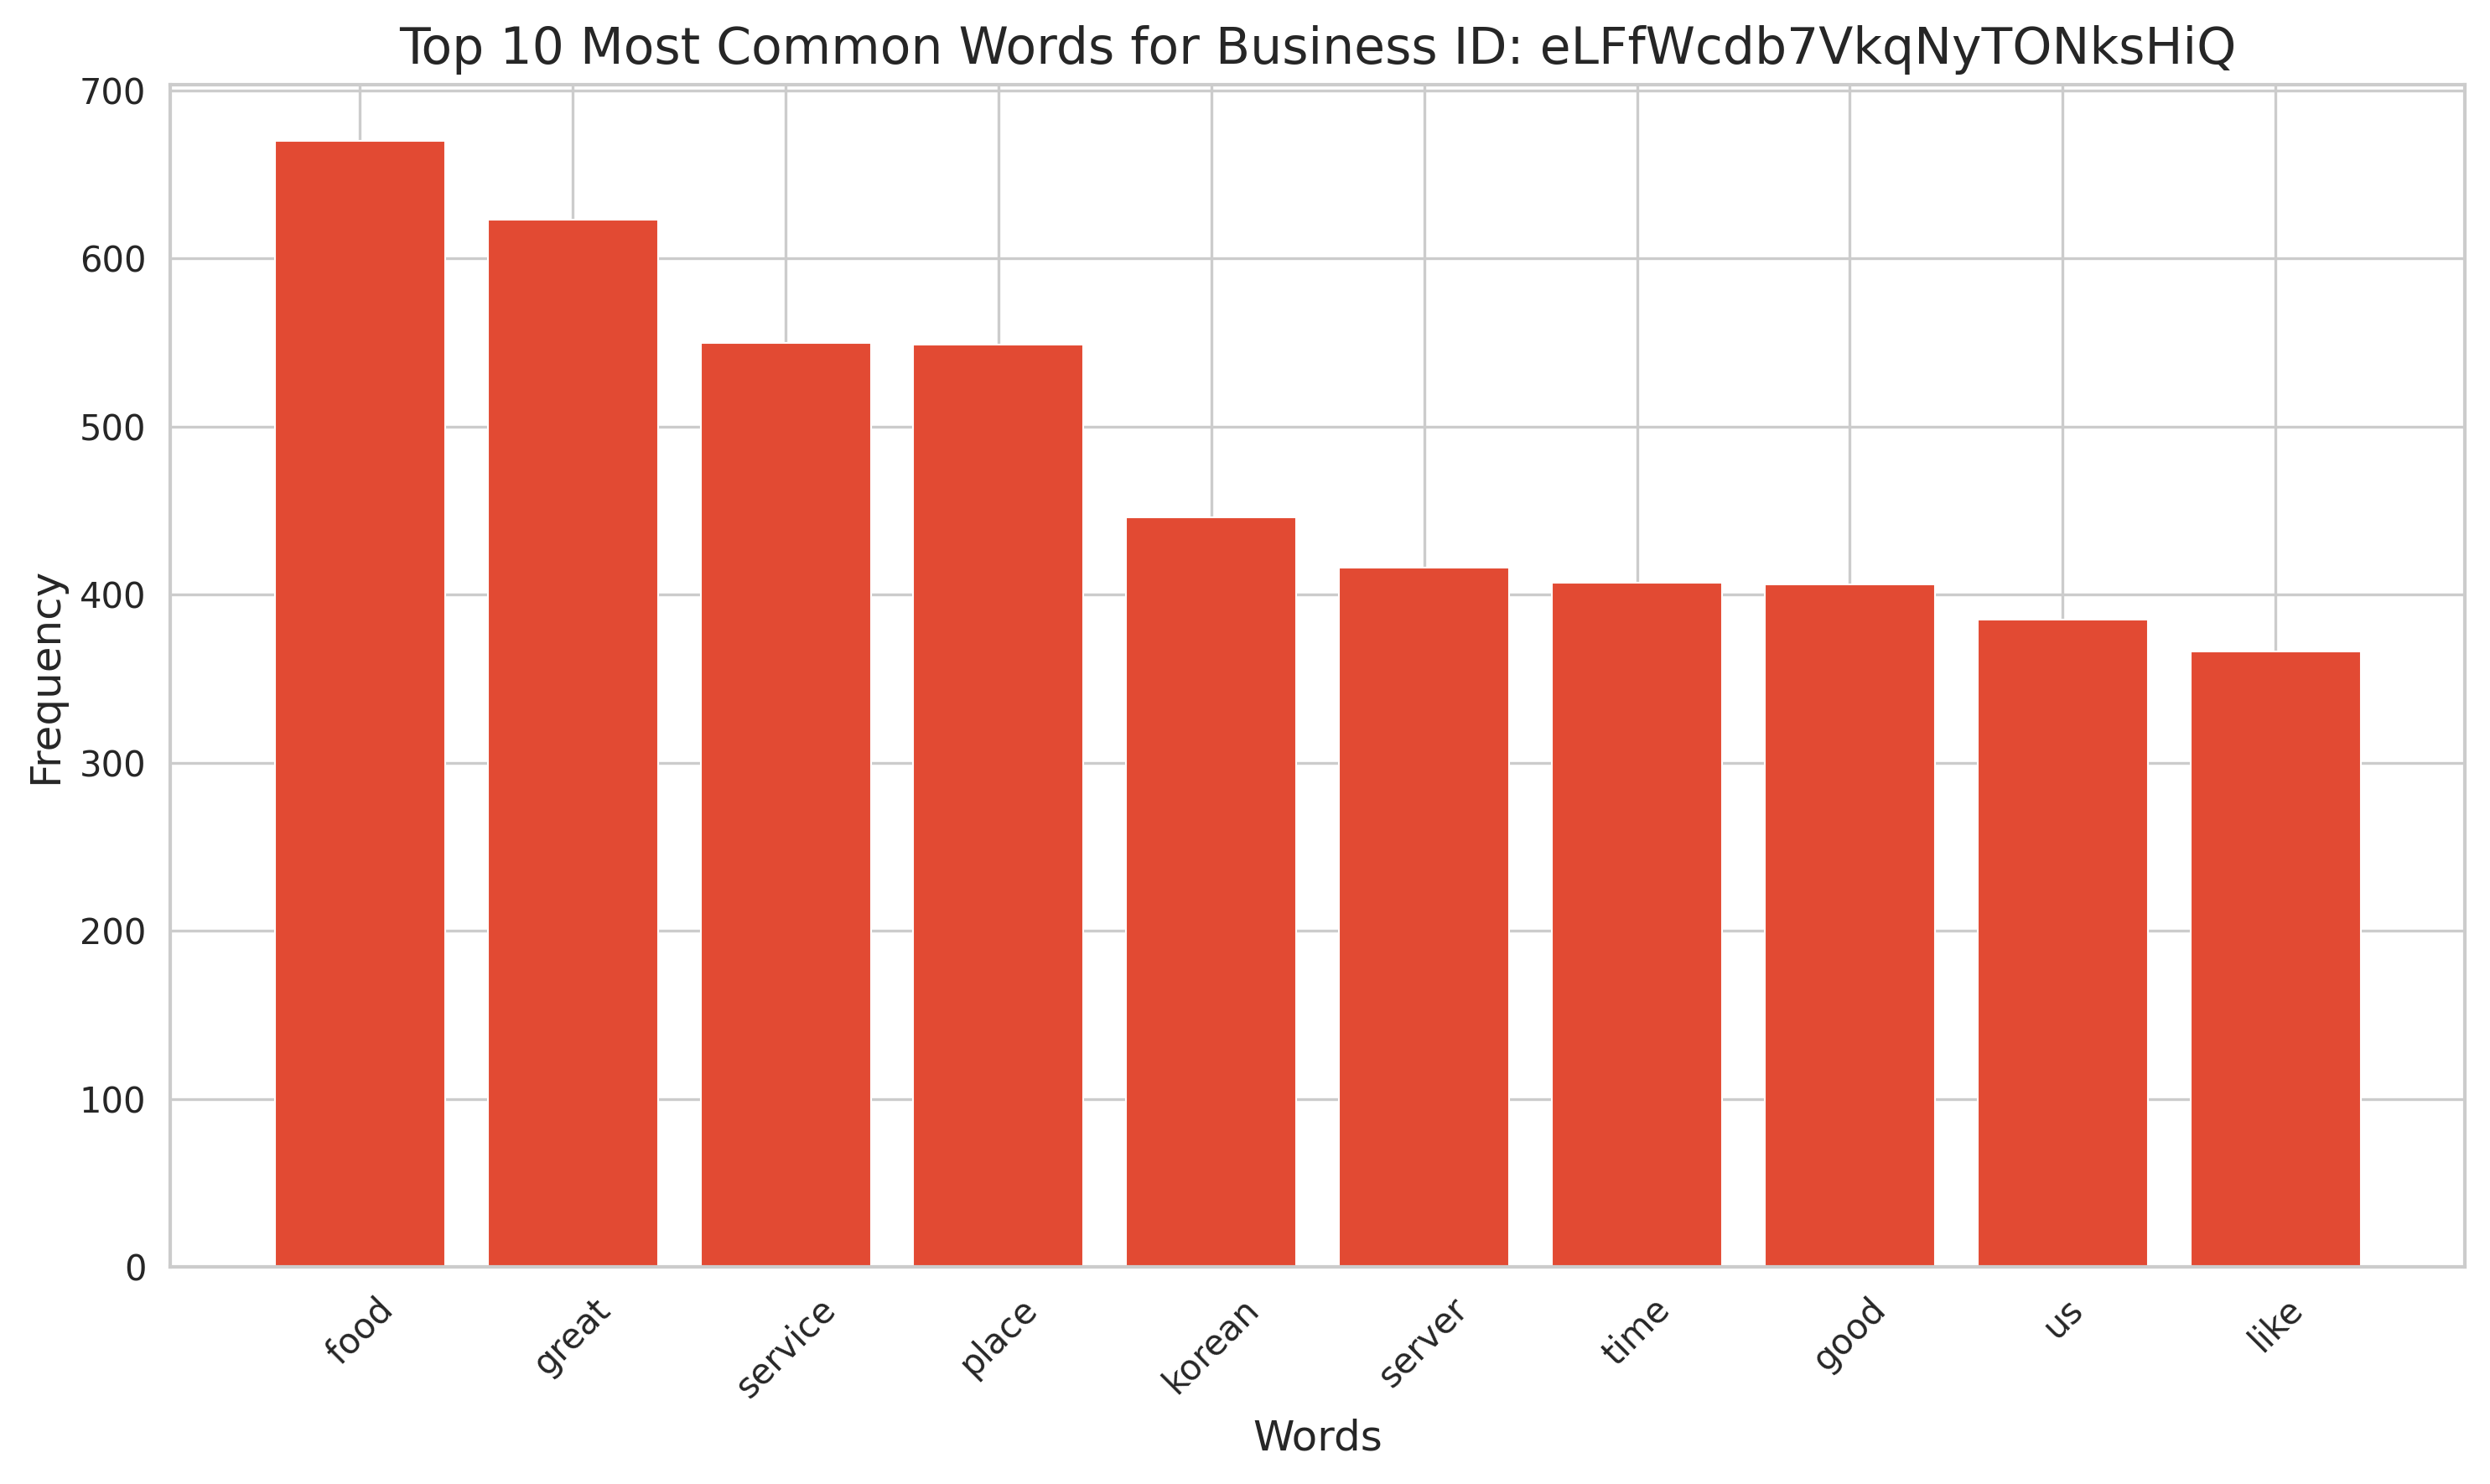

In [ ]:
# 提取单词和词频
words = [word for word, freq in top_ten]
frequencies = [freq for word, freq in top_ten]

# 设置图片清晰度
plt.rcParams['figure.dpi'] = 300

# 创建柱状图
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title(f'Top 10 Most Common Words for Business ID: {target_business_id}')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Sentiment Analysis - Postive and Not So Postive Words

我们会使用 Python 的 nltk 库中的 VADER（Valence Aware Dictionary and sEntiment Reasoner）情感分析工具。VADER 是一个专门用于社交媒体文本情感分析的工具，它可以对文本中的每个单词进行情感评分。

实现步骤

1. **数据准备**：筛选出特定商家的评论数据。
2. **分词处理**：将评论拆分成单个单词。
3. **停用词过滤**：去除无实际意义的停用词。
4. **情感分析**：使用 `VADER` 对每个单词进行情感评分。
5. **词汇分类**：根据情感评分将单词分为积极词汇和非积极词汇。

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# 下载必要的数据
nltk.download('stopwords')
nltk.download('vader_lexicon')

# 初始化停用词和情感分析器
stop_words = set(stopwords.words('english'))
sia = SentimentIntensityAnalyzer()

def analyze_sentiment_words(reviews, target_business_id):
    # 筛选特定商家的评论
    selected_reviews = reviews[reviews['business_id'] == target_business_id]

    # 将评论内容拼接成一个大字符串
    all_text = ' '.join(selected_reviews['text'])

    # 分词
    words = all_text.lower().split()

    # 过滤停用词
    filtered_words = [word for word in words if word.isalpha() and word not in stop_words]

    # 进行情感分析并分类
    positive_words = []
    non_positive_words = []
    for word in filtered_words:
        sentiment_score = sia.polarity_scores(word)['compound']
        if sentiment_score > 0.3:
            positive_words.append(word)
        elif sentiment_score < -0.3:
            non_positive_words.append(word)

    return positive_words, non_positive_words


positive, non_positive = analyze_sentiment_words(reviews, target_business_id)

print("Positive Words:", positive)
print("Non-Positive Words:", non_positive)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Positive Words: ['good', 'liked', 'party', 'friends', 'neatly', 'like', 'like', 'nice', 'fresh', 'delicious', 'definitely', 'favorite', 'love', 'like', 'super', 'great', 'romantic', 'kind', 'clear', 'sure', 'amazing', 'favorite', 'like', 'best', 'excited', 'party', 'innovative', 'ready', 'good', 'loved', 'like', 'applaud', 'definitely', 'great', 'enjoy', 'lively', 'friends', 'definitely', 'favorite', 'better', 'better', 'enjoy', 'wish', 'great', 'super', 'friendly', 'great', 'definitely', 'great', 'fresh', 'great', 'party', 'delicious', 'applause', 'good', 'happy', 'party', 'delicious', 'party', 'super', 'super', 'best', 'good', 'nice', 'free', 'like', 'good', 'wow', 'pleasure', 'best', 'loved', 'fun', 'thank', 'goodness', 'helpful', 'wish', 'love', 'truly', 'hope', 'thanks', 'great', 'amazing', 'satisfy', 'cool', 'help', 'great', 'definitely', 'recommend', 'love', 'loved', 'recommend', 'best', 'truly', 'like', 'perfect', 'like', 'favorites', 'like', 'like', 'like', 'recommend', 'great

In [ ]:
def generate_wordcloud(words, title, background_color='white'):
    # 将词汇列表转换为字符串
    text = ' '.join(words)

    # 创建词云对象
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color=background_color,
        max_words=100,
        colormap='viridis'
    ).generate(text)

    # 显示词云
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# 生成积极词汇词云
generate_wordcloud(positive, f'Positive Words for Business ID: {target_business_id}')

# 生成非积极词汇词云
generate_wordcloud(non_positive, f'Non-Positive Words for Business ID: {target_business_id}', background_color='black')

Output hidden; open in https://colab.research.google.com to view.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/sentiwordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


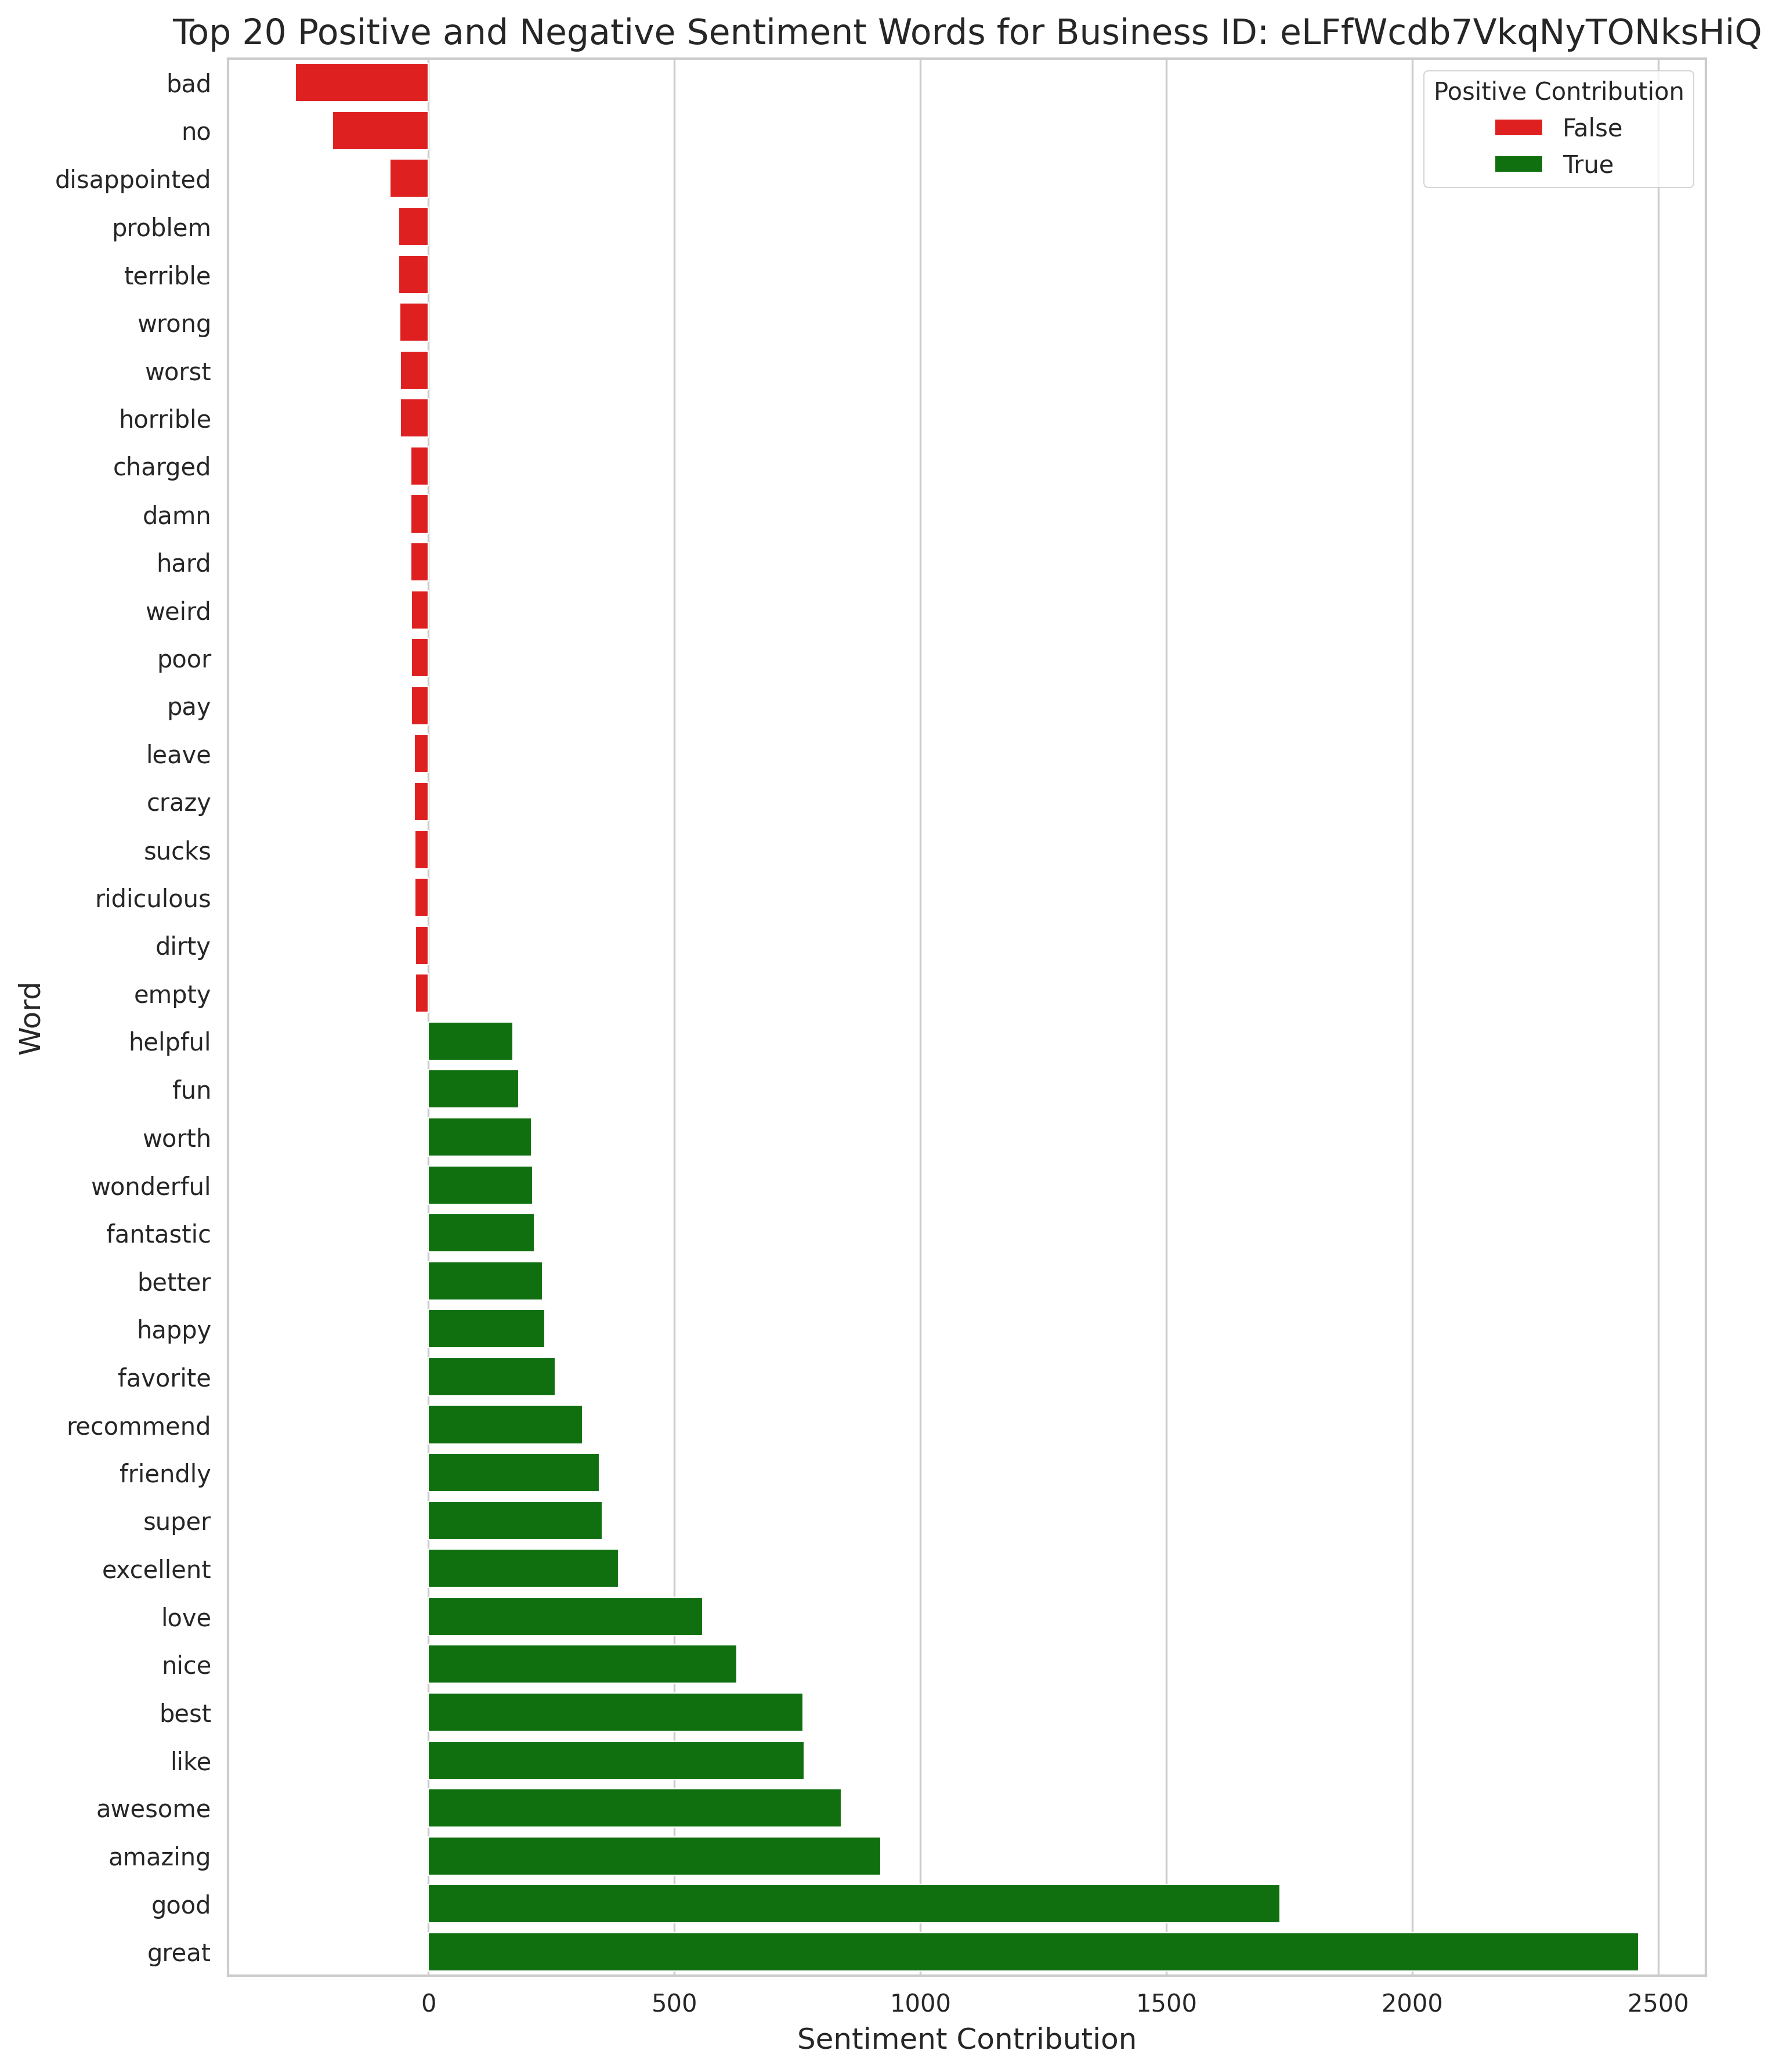

In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
import seaborn as sns
import matplotlib.pyplot as plt


# 下载必要的数据
# 下载 'punkt' 数据包。'punkt' 是 NLTK 中一个非常重要的数据包，它包含了预训练好的句子和单词分词器。
# 句子分词器可以将文本分割成一个个句子，而单词分词器可以将句子分割成一个个单词。
# 例如，在处理一段文本时，首先可以使用 'punkt' 的句子分词器将文本按句子划分，然后再对每个句子进行单词分割。
nltk.download('punkt')
nltk.download('punkt_tab')

# 下载 'stopwords' 数据包。停用词是指在自然语言处理中，那些对文本分析没有实际意义的常用词，
# 如英语中的 "the", "and", "is" 等。在文本处理过程中，通常会先去除这些停用词，
# 以减少数据的噪声，提高后续分析（如文本分类、信息检索等）的效率和准确性。
nltk.download('stopwords')

# 下载 'wordnet' 数据包。WordNet 是一个大型的英语词汇数据库，它将单词按照语义关系组织成同义词集（synsets）。
# 每个同义词集包含一组语义相近的单词，并且 WordNet 还记录了这些同义词集之间的各种语义关系，
# 如上下位关系、整体 - 部分关系等。在自然语言处理中，WordNet 可用于词义消歧、语义相似度计算等任务。
nltk.download('wordnet')

# 下载 'omw-1.4' 数据包。OMW（Open Multilingual WordNet）是一个多语言的 WordNet 扩展项目，
# 版本 1.4 提供了多种语言的词汇语义资源。它允许在不同语言之间进行语义关联和跨语言的自然语言处理任务，
# 例如跨语言的文本分类、机器翻译等。
nltk.download('omw-1.4')

# 下载 'sentiwordnet' 数据包。SentiWordNet 是基于 WordNet 构建的一个情感分析资源，
# 它为每个 WordNet 的同义词集标注了积极、消极和客观的情感得分。在情感分析任务中，
# 可以使用 SentiWordNet 来计算文本中每个单词的情感倾向，进而判断整个文本的情感极性（积极、消极或中性）。
nltk.download('sentiwordnet')

# 下载 'averaged_perceptron_tagger' 数据包。这是一个词性标注器，它使用平均感知机算法进行训练。
# 词性标注是将文本中的每个单词标注为其对应的词性（如名词、动词、形容词等）的过程。
# 在自然语言处理中，词性标注是许多高级任务（如句法分析、命名实体识别等）的基础。
nltk.download('averaged_perceptron_tagger')

# 加载 afinn 情感词典
afinn_url = "https://raw.githubusercontent.com/fnielsen/afinn/master/afinn/data/AFINN-111.txt"
afinn = pd.read_csv(afinn_url, sep='\t', header=None, names=['word','score'])

def WordsContribution(reviews, target_business_id):
    # 筛选特定 business_id 的评论
    selected_reviews = reviews[reviews['business_id'] == target_business_id]

    # 分词并统计单词出现次数
    all_words = []
    for text in selected_reviews['text']:
        words = word_tokenize(text.lower())
        all_words.extend(words)
    word_count = pd.Series(all_words).value_counts().reset_index(name='occurences').rename(columns={'index': 'word'})

    # 合并情感词典
    contributions = pd.merge(word_count, afinn, on='word', how='inner')
    contributions['contribution'] = contributions['score'] * contributions['occurences']

    # 找到正向贡献值最大的前 20 个单词
    top_positive = contributions[contributions['contribution'] > 0].nlargest(20, 'contribution')

    # 找到负向贡献值最大的前 20 个单词
    top_negative = contributions[contributions['contribution'] < 0].nsmallest(20, 'contribution')

    # 合并正向和负向的结果
    top_words = pd.concat([top_positive, top_negative])

    # 按贡献值排序
    top_words = top_words.sort_values(by='contribution')

    # 创建绘图
    plt.figure(figsize=(10, 12))
    sns.barplot(x='contribution', y='word', data=top_words, hue=top_words['contribution'] > 0,
                dodge=False, palette={True: 'green', False:'red'})
    plt.legend(title='Positive Contribution', loc='upper right')
    plt.xlabel('Sentiment Contribution')
    plt.ylabel('Word')
    plt.title(f'Top 20 Positive and Negative Sentiment Words for Business ID: {target_business_id}')
    plt.tight_layout()
    plt.show()

# 调用函数
WordsContribution(reviews, target_business_id)

### Calculate Sentiment for the reviews

实现思路

1. **加载 AFINN 情感词典**：从网络或本地加载 AFINN 词典，该词典包含了单词及其对应的情感得分。
2. **分词与得分计算**：对每条评论进行分词，然后根据词典中每个单词的情感得分，累加得到该评论的情感得分。
3. **排序与展示**：根据情感得分对所有评论进行排序，选取前六个评论展示其情感得分。

In [ ]:
# 加载 AFINN 情感词典
afinn_url = 'https://raw.githubusercontent.com/fnielsen/afinn/master/afinn/data/AFINN-111.txt'
afinn = pd.read_csv(afinn_url, sep='\t', header=None, names=['word', 'score'])
afinn_dict = afinn.set_index('word')['score'].to_dict()

def calculate_sentiment(review):
    """
    计算单条评论的情感得分
    :param review: 评论内容
    :return: 情感得分
    """
    # 分词
    words = word_tokenize(review.lower())
    # 计算得分
    score = 0
    for word in words:
        score += afinn_dict.get(word, 0)
    return score

def get_top_n_sentiments(reviews, topk = 6):
    """
    计算所有评论的情感得分，并返回前n个
    :param reviews: 评论数据 DataFrame，包含 'text' 列
    :return: 前六个评论及其情感得分
    """
    # 计算每条评论的情感得分
    reviews['sentiment_score'] = reviews['text'].apply(calculate_sentiment)
    # 按情感得分降序排序
    sorted_reviews = reviews.sort_values(by='sentiment_score', ascending=False)
    # 取前六个
    top_n = sorted_reviews.head(topk)
    return top_n

In [ ]:
# 计算并获取前六个情感得分
top_n = get_top_n_sentiments(reviews[reviews['business_id'] == target_business_id])

# 展示结果
print(top_n[['text','sentiment_score']])

                                                      text  sentiment_score
2886843  I came here after I seen that person below me ...               77
203303   Gen from outside the entrance looks like a rea...               74
1342861  I've waited a long time for a restaurant openi...               69
2790199  I'm being super generous with this review by g...               68
625787   There was a time I had given up on the KBBQ in...               61
3271872  Decided to try this place because my boyfriend...               56


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


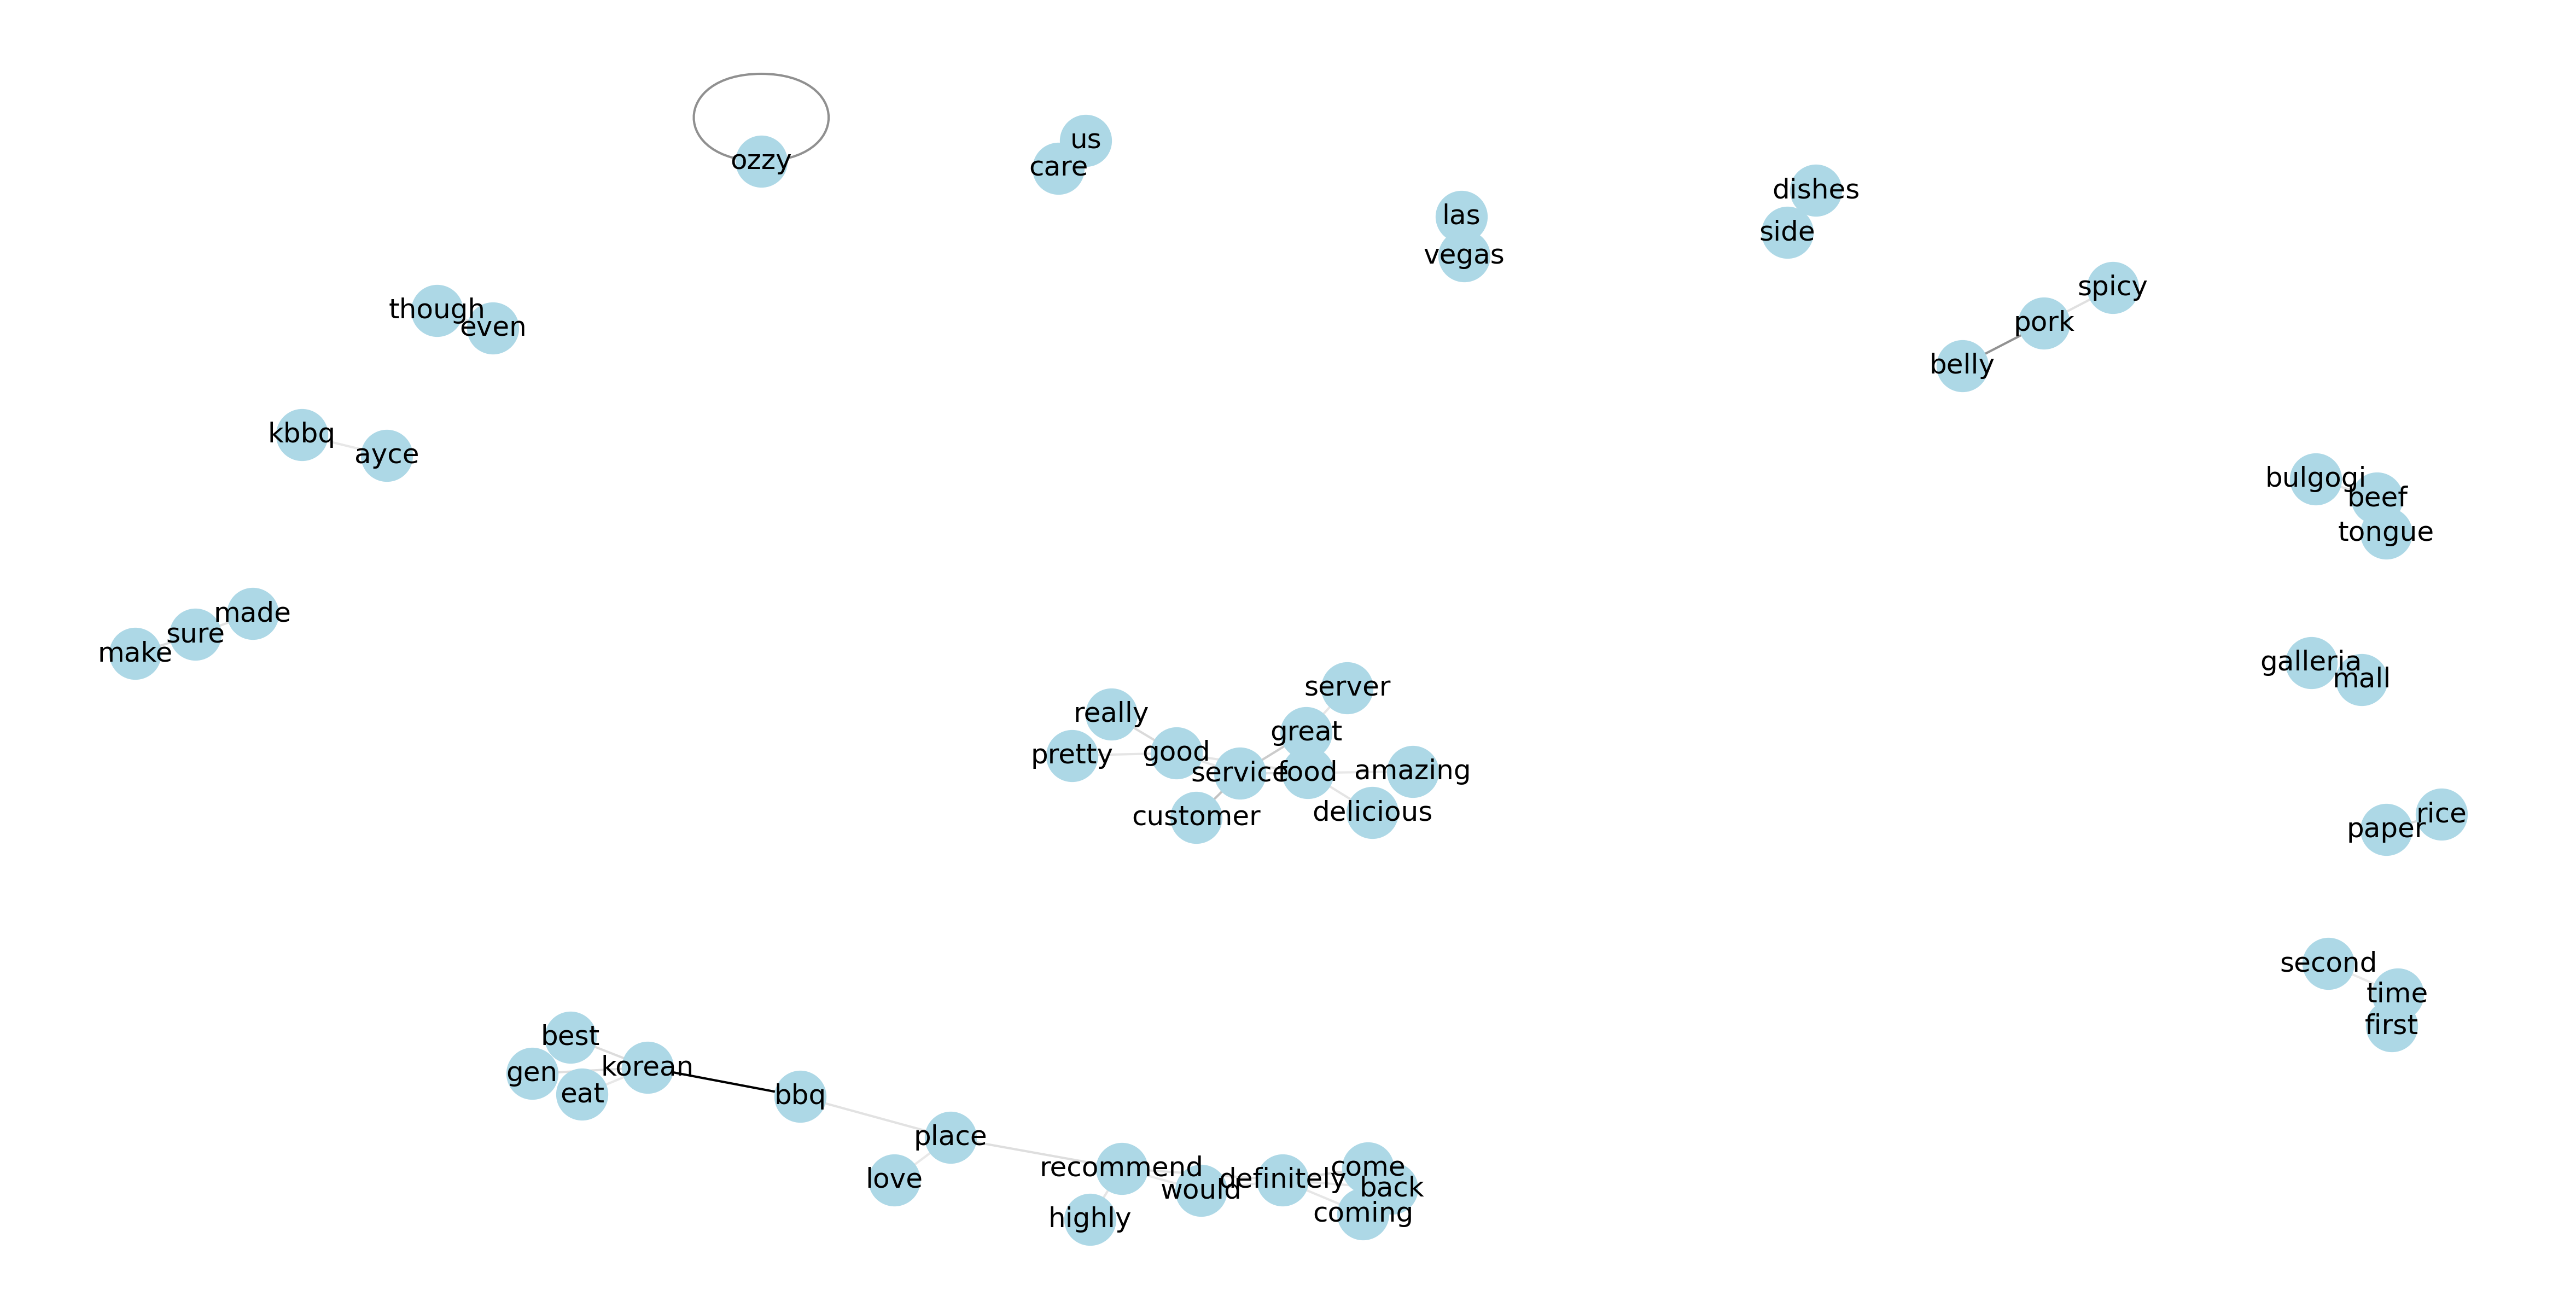

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import networkx as nx
import re

# 下载必要的数据
nltk.download('punkt')
nltk.download('stopwords')

# 加载停用词
stop_words = set(stopwords.words('english'))

def count_bigrams(dataset):
    """
    统计二元组的出现次数，同时去除符号和特殊词
    :param dataset: 包含评论的 DataFrame，应包含 'text' 列
    :return: 统计好的二元组 DataFrame
    """
    all_bigrams = []
    for text in dataset['text']:
        # 分词
        tokens = word_tokenize(text.lower())
        # 过滤停用词、符号和特殊词，只保留字母组成的单词
        filtered_tokens = [word for word in tokens if re.match(r'^[a-z]+$', word) and word not in stop_words]
        # 生成二元组
        current_bigrams = list(nltk.bigrams(filtered_tokens))
        all_bigrams.extend(current_bigrams)

    # 统计二元组频率
    bigram_count = pd.Series(all_bigrams).value_counts().reset_index(name='n')
    bigram_count.columns = ['bigram', 'n']
    bigram_count[['word1', 'word2']] = pd.DataFrame(bigram_count['bigram'].tolist())
    bigram_count = bigram_count.sort_values(by='n', ascending=False)
    return bigram_count

def visualize_bigrams(bigrams):
    """
    可视化二元组网络
    :param bigrams: 包含二元组统计信息的 DataFrame，应包含 'word1', 'word2', 'n' 列
    """
    # 创建图对象
    G = nx.from_pandas_edgelist(bigrams, 'word1', 'word2', edge_attr='n')

    # 设置布局
    pos = nx.spring_layout(G)

    # 绘制节点
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=500)

    # 绘制边
    for u, v, data in G.edges(data=True):
        nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], alpha=data['n'] / bigrams['n'].max())

    # 绘制节点标签
    nx.draw_networkx_labels(G, pos)

    # 去除坐标轴
    plt.axis('off')

    # 显示图形
    plt.show()


# 筛选特定 business_id 的评论并统计二元组
bigramsMonAmiGabi = count_bigrams(reviews[reviews['business_id'] == target_business_id])

# 筛选出出现次数大于 50 的二元组
bigrams_filtered = bigramsMonAmiGabi[bigramsMonAmiGabi['n'] > 30]

# 可视化筛选后的二元组
visualize_bigrams(bigrams_filtered)

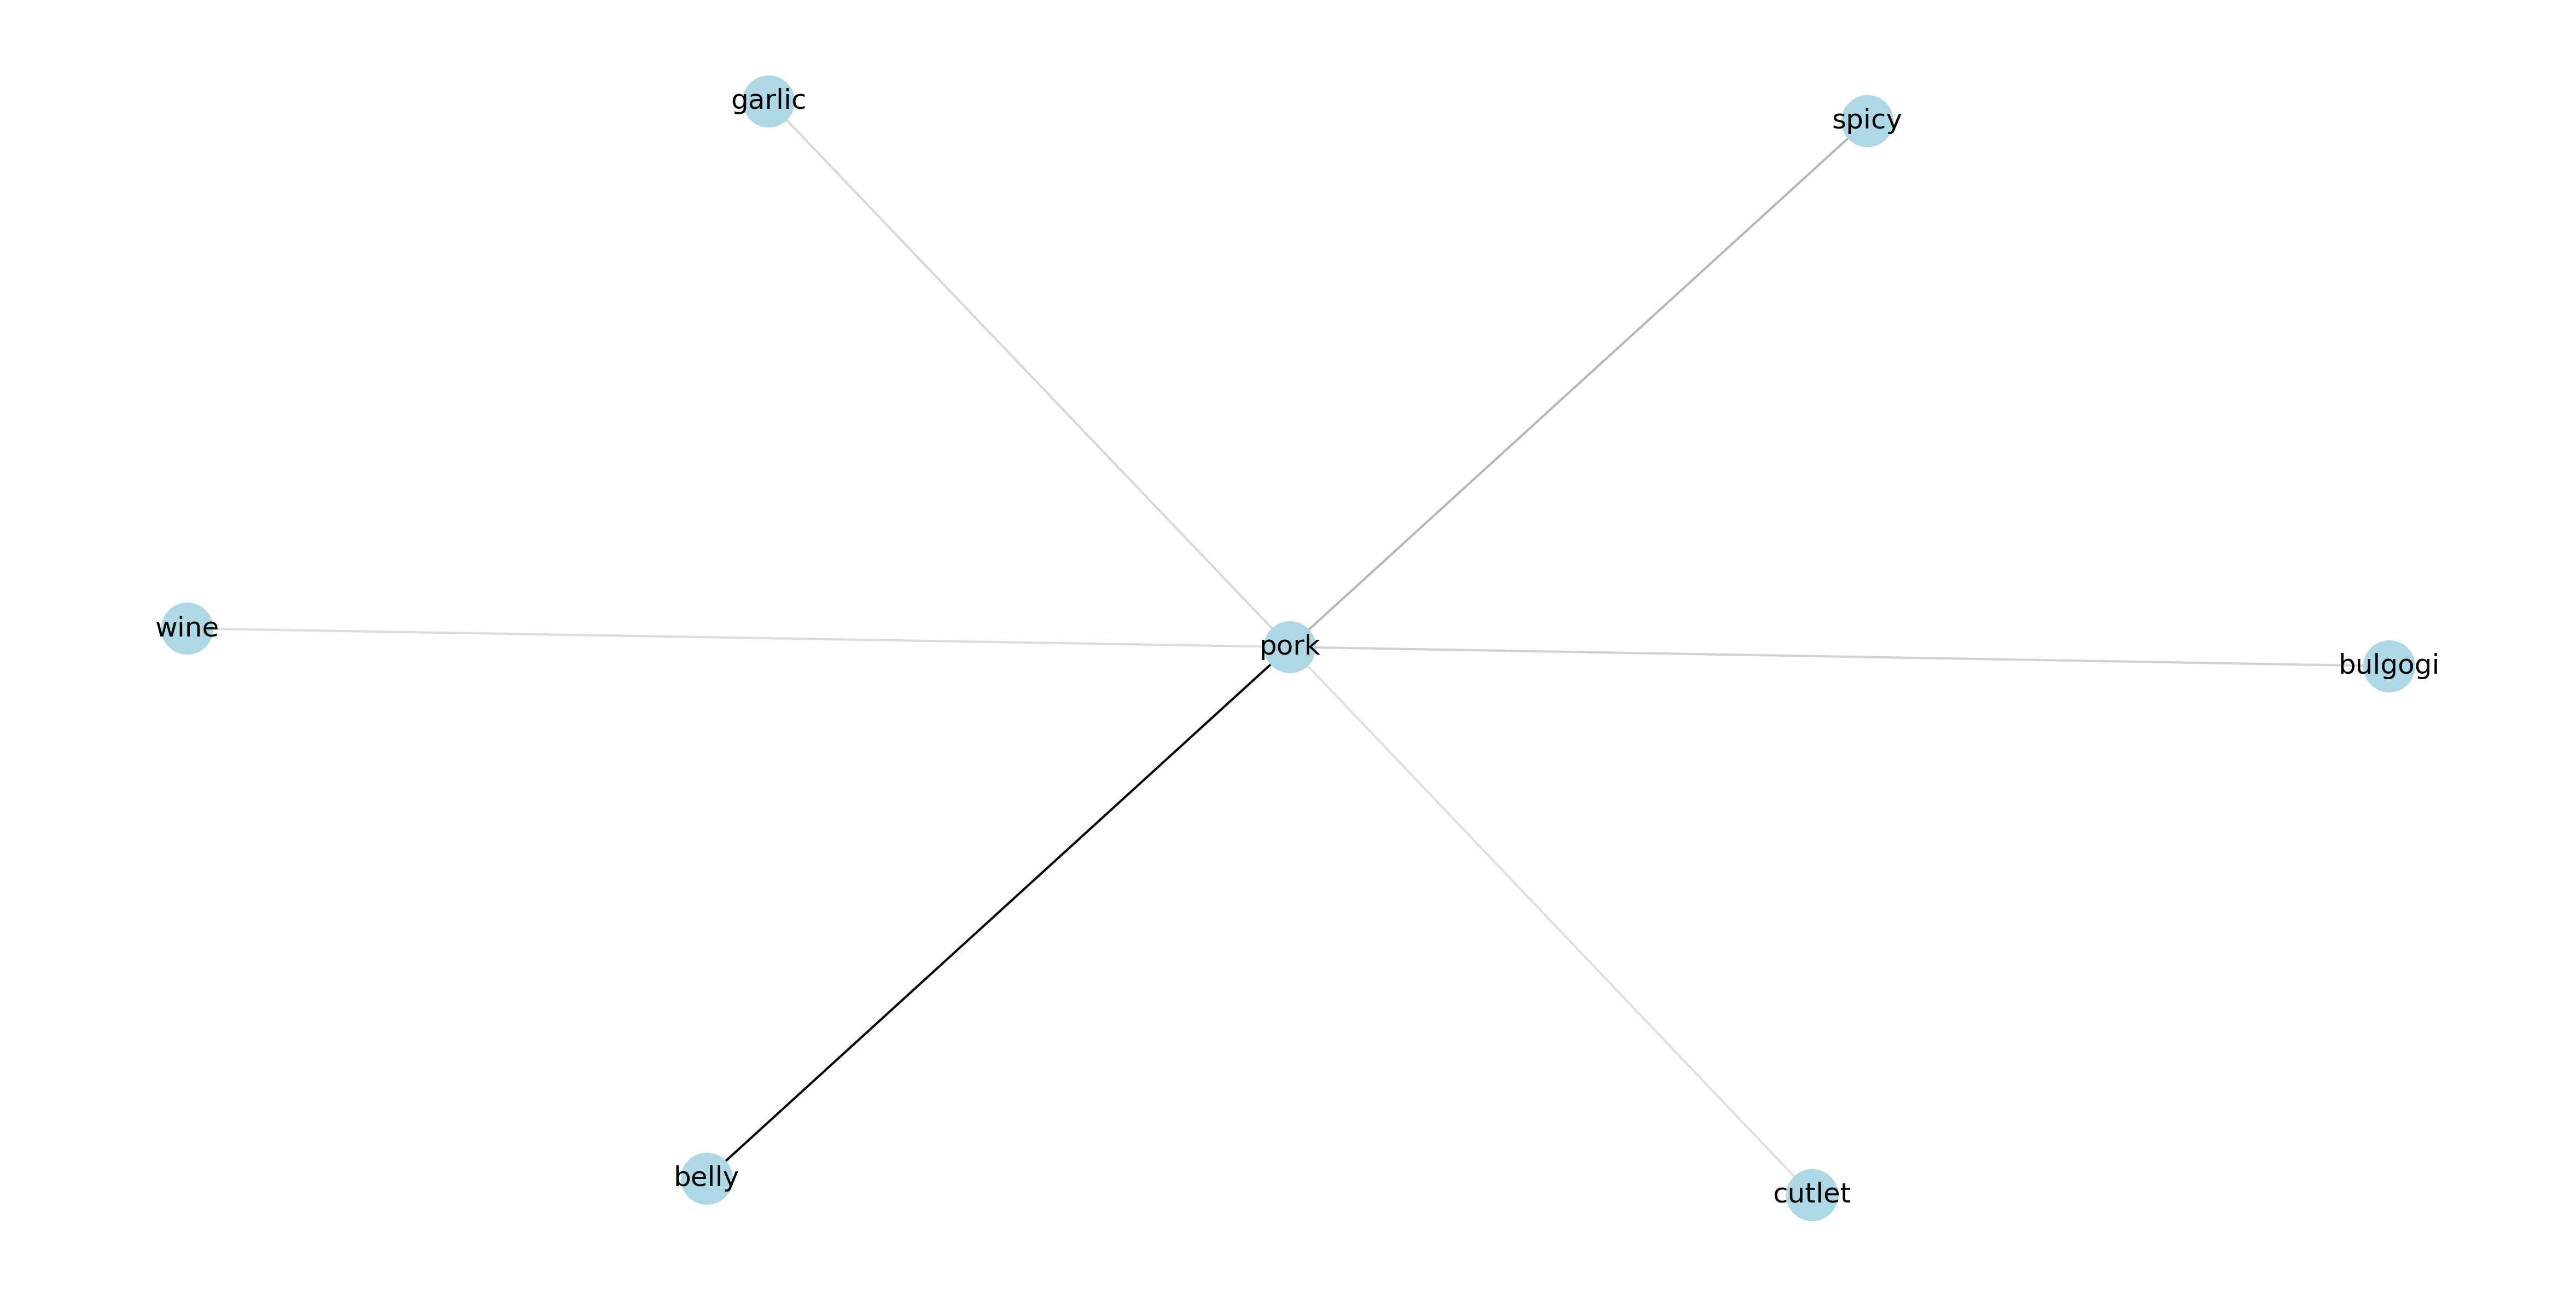

In [ ]:
# 筛选出包含 "pork" 且出现次数大于 30 的二元组
bigrams_filtered = bigramsMonAmiGabi[((bigramsMonAmiGabi['word1'] == "pork") | (bigramsMonAmiGabi['word2'] == "pork")) & (bigramsMonAmiGabi['n'] > 10)]

# 可视化筛选后的二元组
visualize_bigrams(bigrams_filtered)

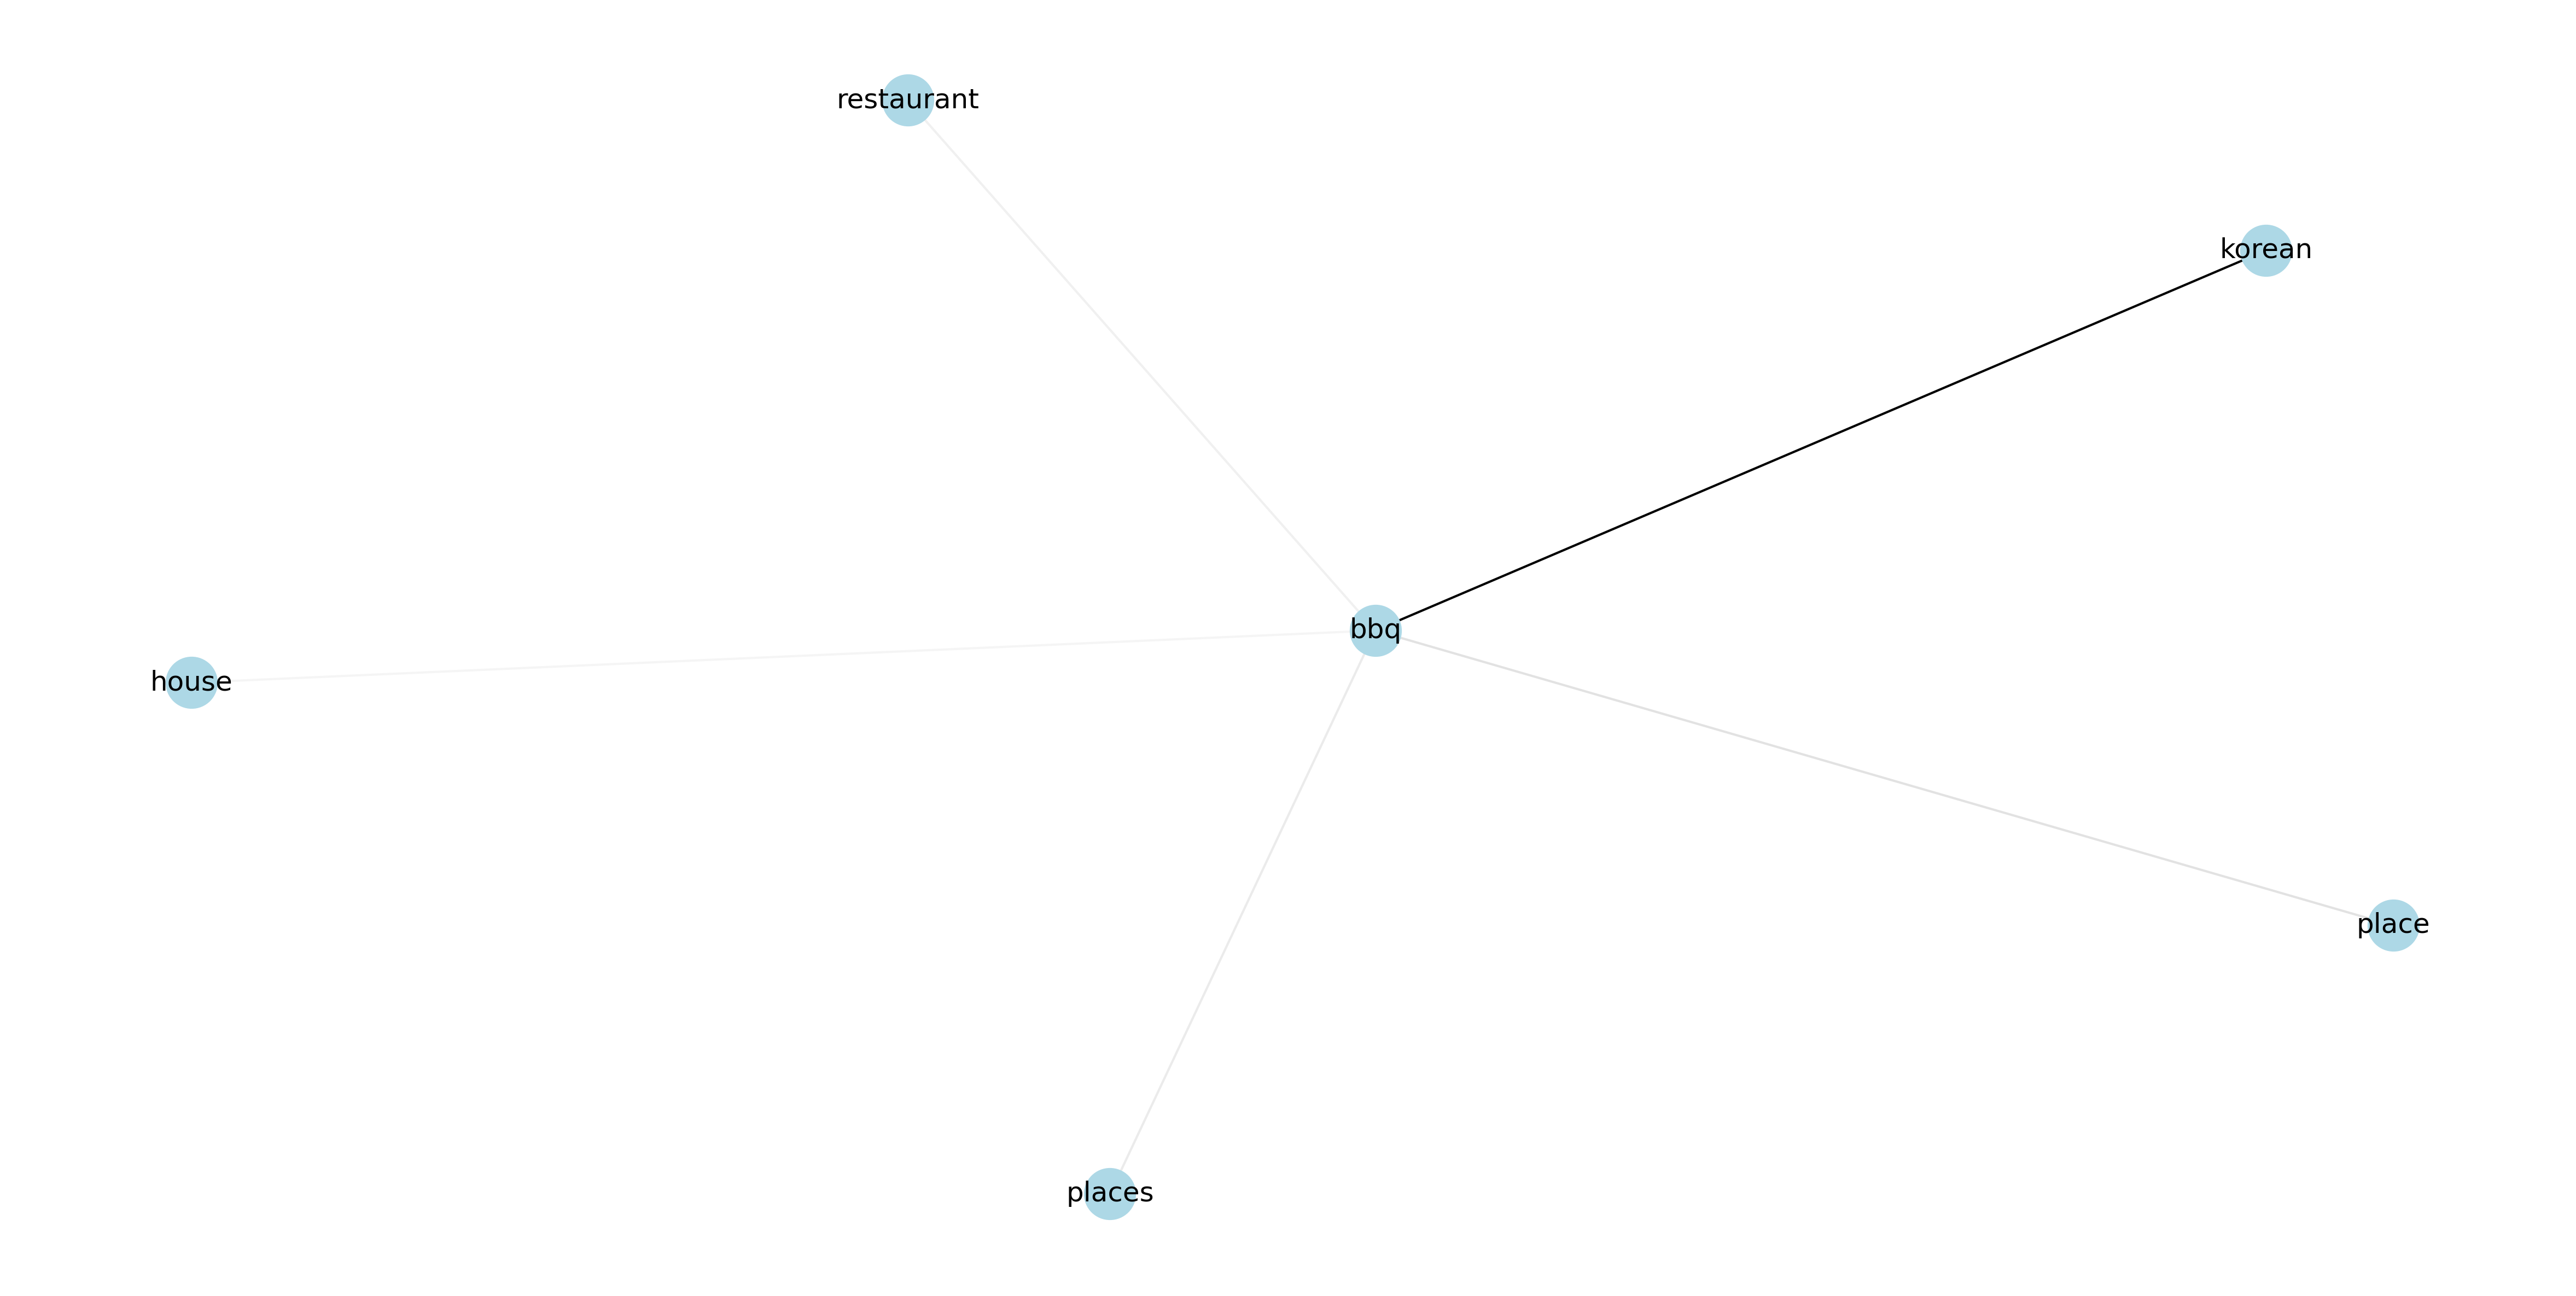

In [ ]:
# 筛选出包含 "bbq" 且出现次数大于 30 的二元组
bigrams_filtered = bigramsMonAmiGabi[((bigramsMonAmiGabi['word1'] == "bbq") | (bigramsMonAmiGabi['word2'] == "bbq")) & (bigramsMonAmiGabi['n'] > 10)]

# 可视化筛选后的二元组
visualize_bigrams(bigrams_filtered)

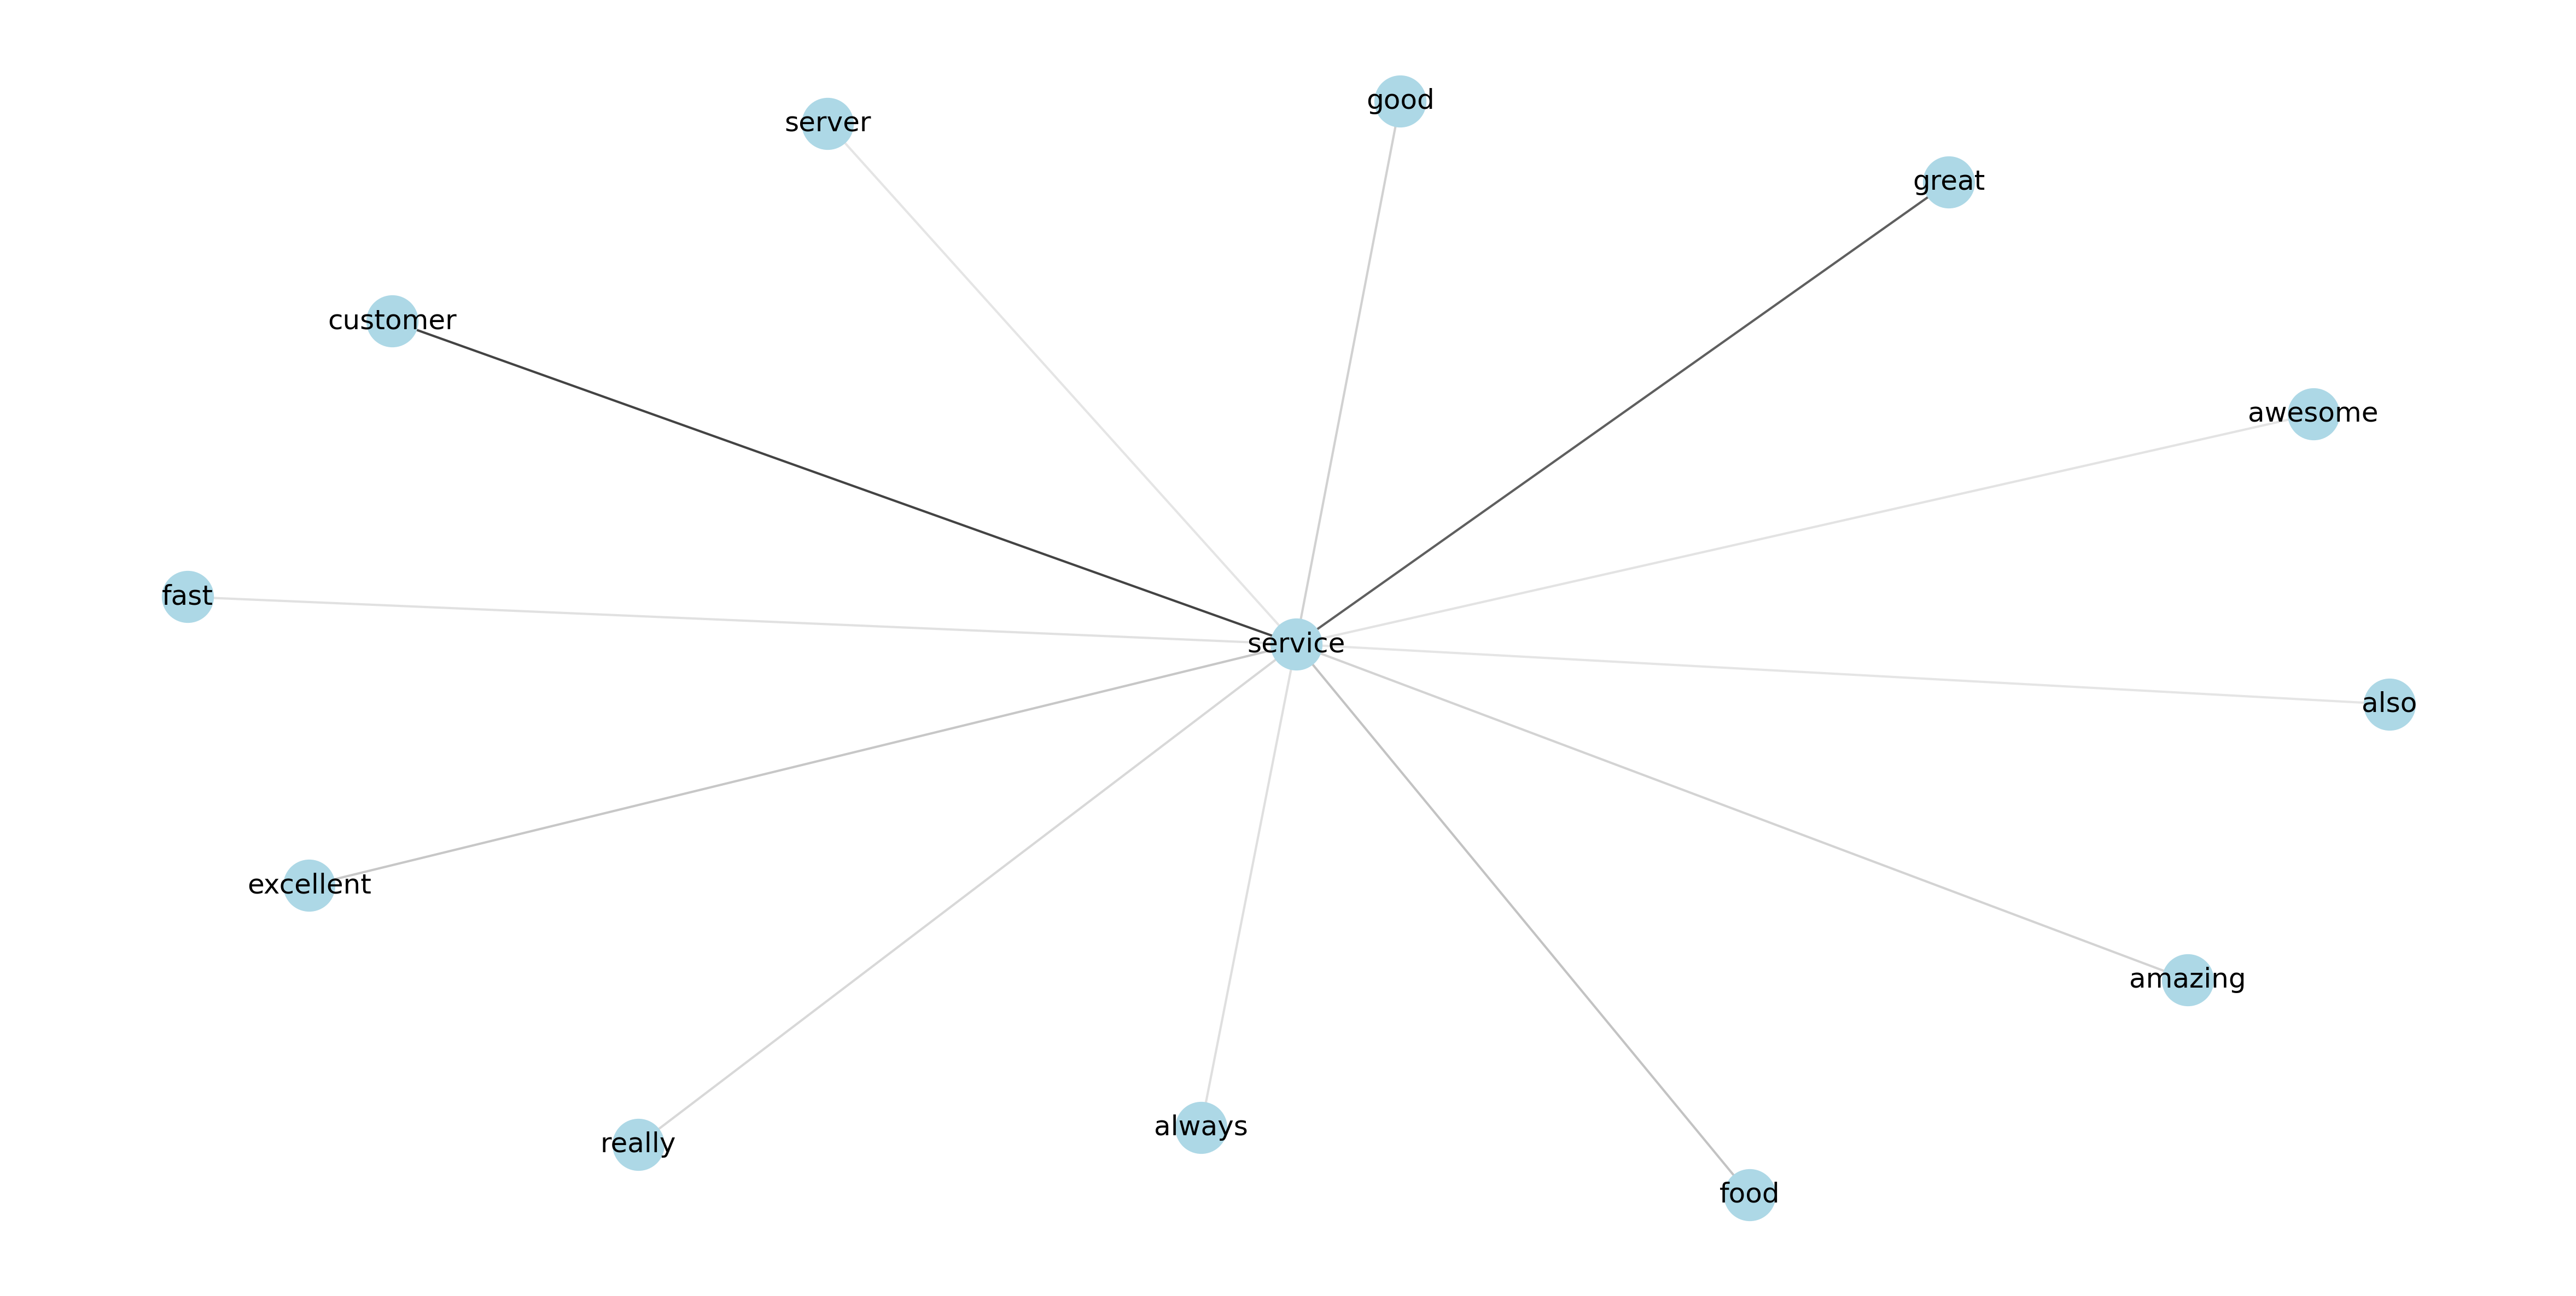

In [ ]:
# 筛选出包含 "bbq" 且出现次数大于 30 的二元组
bigrams_filtered = bigramsMonAmiGabi[((bigramsMonAmiGabi['word1'] == "service") | (bigramsMonAmiGabi['word2'] == "service")) & (bigramsMonAmiGabi['n'] > 10)]

# 可视化筛选后的二元组
visualize_bigrams(bigrams_filtered)